# Assignment 1-B: Regression

This project aims at building neural networks to predict the chances of approval of a student’s application for a Master’s Program, given a list of features like GRE Score, TOEFL Score etc.

The goals of this problem are :-
1.	Designing a simple feedforward neural network with some specified parameters, and stopping training automatically after convergence is reached
2.	Implementing Recursive feature elimination (RFE) to remove unnecessary features.
3.	Implementing multi-layered neural networks, introducing drop-out layers between the layers, and comparing the results. 


## Loading dependencies

In [1]:
import time
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

np.random.seed(10)
tf.random.set_seed(10)

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


## Pre-processing data

1. Load data from CSV file using genfromtxt
2. Remove nan row, and delete first input column
3. Split data using train_test_split
4. Scale data using min-max scaling
5. Subtract 1 from output for ease of computation

In [2]:
# Loading the data
data = np.genfromtxt('admission_predict.csv', delimiter= ',')
data = data[1:] # Remove nan row
X, y = data[:, 1:8], data[:,-1]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

# Scaling the data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Experiments



### Q1)

This question requires us to create a simple feedforward neural network with the following layers :- 
-	An input layer
-	One hidden layer of 10 neurons, with ReLU activation function 
-	An output linear layer


These layers have the following specifications for parameters :-
-	A learning rate (α) of 0.001
-	A weight decay parameter (β) of 10^(-3)
-	A batch size of 8


In [3]:
#Defining the model
tf.random.set_seed(1)
LEARNING_RATE = 0.001
L2_REGULARIZATION = 0.001
BATCH_SIZE = 8
EPOCHS = 5000

starter_model = Sequential([
    Dense(units=10, activation='relu', kernel_regularizer=l2(L2_REGULARIZATION)),
    Dense(units = 1, activation='linear')
    ])

In [4]:
#Training the model

OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
LOSS_TYPE = MeanSquaredError()
METRICS = ["mse"]

starter_model.compile(optimizer=OPTIMIZER, 
                   loss=LOSS_TYPE,
                   metrics=METRICS)

In [5]:
#Fitting the model

histories = {}

histories['starter'] =starter_model.fit(X_train, y_train,
                                        epochs=EPOCHS,
                                        batch_size=BATCH_SIZE,
                                        validation_data=(X_test, y_test),
                                        verbose = 2)

Train on 280 samples, validate on 120 samples
Epoch 1/5000
280/280 - 0s - loss: 0.2487 - mse: 0.2418 - val_loss: 0.1956 - val_mse: 0.1888
Epoch 2/5000
280/280 - 0s - loss: 0.1694 - mse: 0.1625 - val_loss: 0.1318 - val_mse: 0.1249
Epoch 3/5000
280/280 - 0s - loss: 0.1155 - mse: 0.1086 - val_loss: 0.0892 - val_mse: 0.0824
Epoch 4/5000
280/280 - 0s - loss: 0.0795 - mse: 0.0727 - val_loss: 0.0617 - val_mse: 0.0548
Epoch 5/5000
280/280 - 0s - loss: 0.0560 - mse: 0.0491 - val_loss: 0.0441 - val_mse: 0.0372
Epoch 6/5000
280/280 - 0s - loss: 0.0407 - mse: 0.0339 - val_loss: 0.0331 - val_mse: 0.0262
Epoch 7/5000
280/280 - 0s - loss: 0.0310 - mse: 0.0242 - val_loss: 0.0264 - val_mse: 0.0195
Epoch 8/5000
280/280 - 0s - loss: 0.0249 - mse: 0.0180 - val_loss: 0.0224 - val_mse: 0.0155
Epoch 9/5000
280/280 - 0s - loss: 0.0212 - mse: 0.0143 - val_loss: 0.0201 - val_mse: 0.0132
Epoch 10/5000
280/280 - 0s - loss: 0.0188 - mse: 0.0119 - val_loss: 0.0188 - val_mse: 0.0119
Epoch 11/5000
280/280 - 0s - loss

Epoch 89/5000
280/280 - 0s - loss: 0.0130 - mse: 0.0062 - val_loss: 0.0152 - val_mse: 0.0084
Epoch 90/5000
280/280 - 0s - loss: 0.0130 - mse: 0.0062 - val_loss: 0.0152 - val_mse: 0.0084
Epoch 91/5000
280/280 - 0s - loss: 0.0130 - mse: 0.0062 - val_loss: 0.0152 - val_mse: 0.0083
Epoch 92/5000
280/280 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0151 - val_mse: 0.0083
Epoch 93/5000
280/280 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0151 - val_mse: 0.0083
Epoch 94/5000
280/280 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0151 - val_mse: 0.0083
Epoch 95/5000
280/280 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0151 - val_mse: 0.0083
Epoch 96/5000
280/280 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0151 - val_mse: 0.0082
Epoch 97/5000
280/280 - 0s - loss: 0.0129 - mse: 0.0061 - val_loss: 0.0150 - val_mse: 0.0082
Epoch 98/5000
280/280 - 0s - loss: 0.0129 - mse: 0.0060 - val_loss: 0.0150 - val_mse: 0.0082
Epoch 99/5000
280/280 - 0s - loss: 0.0128 - mse: 0.0060 - val_loss: 0.

Epoch 177/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0138 - val_mse: 0.0071
Epoch 178/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0138 - val_mse: 0.0071
Epoch 179/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0138 - val_mse: 0.0071
Epoch 180/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0138 - val_mse: 0.0071
Epoch 181/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0138 - val_mse: 0.0070
Epoch 182/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0137 - val_mse: 0.0070
Epoch 183/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0137 - val_mse: 0.0070
Epoch 184/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0137 - val_mse: 0.0070
Epoch 185/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0137 - val_mse: 0.0070
Epoch 186/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0052 - val_loss: 0.0137 - val_mse: 0.0070
Epoch 187/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0052 - v

Epoch 265/5000
280/280 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0130 - val_mse: 0.0064
Epoch 266/5000
280/280 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0130 - val_mse: 0.0064
Epoch 267/5000
280/280 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0130 - val_mse: 0.0064
Epoch 268/5000
280/280 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0130 - val_mse: 0.0064
Epoch 269/5000
280/280 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0130 - val_mse: 0.0064
Epoch 270/5000
280/280 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0130 - val_mse: 0.0064
Epoch 271/5000
280/280 - 0s - loss: 0.0114 - mse: 0.0048 - val_loss: 0.0130 - val_mse: 0.0064
Epoch 272/5000
280/280 - 0s - loss: 0.0114 - mse: 0.0047 - val_loss: 0.0130 - val_mse: 0.0064
Epoch 273/5000
280/280 - 0s - loss: 0.0114 - mse: 0.0047 - val_loss: 0.0130 - val_mse: 0.0064
Epoch 274/5000
280/280 - 0s - loss: 0.0114 - mse: 0.0047 - val_loss: 0.0130 - val_mse: 0.0064
Epoch 275/5000
280/280 - 0s - loss: 0.0113 - mse: 0.0047 - v

Epoch 353/5000
280/280 - 0s - loss: 0.0111 - mse: 0.0045 - val_loss: 0.0126 - val_mse: 0.0060
Epoch 354/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0045 - val_loss: 0.0126 - val_mse: 0.0060
Epoch 355/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0045 - val_loss: 0.0126 - val_mse: 0.0060
Epoch 356/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0045 - val_loss: 0.0126 - val_mse: 0.0060
Epoch 357/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0045 - val_loss: 0.0125 - val_mse: 0.0060
Epoch 358/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0045 - val_loss: 0.0125 - val_mse: 0.0060
Epoch 359/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0045 - val_loss: 0.0125 - val_mse: 0.0060
Epoch 360/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0045 - val_loss: 0.0125 - val_mse: 0.0060
Epoch 361/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0045 - val_loss: 0.0125 - val_mse: 0.0060
Epoch 362/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0045 - val_loss: 0.0125 - val_mse: 0.0060
Epoch 363/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0045 - v

Epoch 441/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0044 - val_loss: 0.0123 - val_mse: 0.0058
Epoch 442/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0044 - val_loss: 0.0123 - val_mse: 0.0058
Epoch 443/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0044 - val_loss: 0.0123 - val_mse: 0.0058
Epoch 444/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0044 - val_loss: 0.0122 - val_mse: 0.0058
Epoch 445/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0044 - val_loss: 0.0122 - val_mse: 0.0058
Epoch 446/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0044 - val_loss: 0.0122 - val_mse: 0.0058
Epoch 447/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0044 - val_loss: 0.0122 - val_mse: 0.0058
Epoch 448/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0044 - val_loss: 0.0122 - val_mse: 0.0058
Epoch 449/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0044 - val_loss: 0.0122 - val_mse: 0.0058
Epoch 450/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0044 - val_loss: 0.0122 - val_mse: 0.0058
Epoch 451/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0044 - v

280/280 - 0s - loss: 0.0106 - mse: 0.0043 - val_loss: 0.0121 - val_mse: 0.0057
Epoch 529/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0043 - val_loss: 0.0121 - val_mse: 0.0057
Epoch 530/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0043 - val_loss: 0.0120 - val_mse: 0.0057
Epoch 531/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0043 - val_loss: 0.0120 - val_mse: 0.0057
Epoch 532/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0043 - val_loss: 0.0120 - val_mse: 0.0057
Epoch 533/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0043 - val_loss: 0.0120 - val_mse: 0.0057
Epoch 534/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0043 - val_loss: 0.0120 - val_mse: 0.0057
Epoch 535/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0043 - val_loss: 0.0120 - val_mse: 0.0057
Epoch 536/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0043 - val_loss: 0.0120 - val_mse: 0.0057
Epoch 537/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0043 - val_loss: 0.0120 - val_mse: 0.0057
Epoch 538/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0043 - val_loss: 0.0120

Epoch 616/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0042 - val_loss: 0.0119 - val_mse: 0.0056
Epoch 617/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0042 - val_loss: 0.0119 - val_mse: 0.0056
Epoch 618/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0042 - val_loss: 0.0119 - val_mse: 0.0056
Epoch 619/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0042 - val_loss: 0.0119 - val_mse: 0.0056
Epoch 620/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0042 - val_loss: 0.0119 - val_mse: 0.0056
Epoch 621/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0042 - val_loss: 0.0119 - val_mse: 0.0056
Epoch 622/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0042 - val_loss: 0.0119 - val_mse: 0.0056
Epoch 623/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0042 - val_loss: 0.0119 - val_mse: 0.0056
Epoch 624/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0042 - val_loss: 0.0119 - val_mse: 0.0056
Epoch 625/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0042 - val_loss: 0.0119 - val_mse: 0.0056
Epoch 626/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0042 - v

280/280 - 0s - loss: 0.0103 - mse: 0.0041 - val_loss: 0.0117 - val_mse: 0.0055
Epoch 704/5000
280/280 - 0s - loss: 0.0103 - mse: 0.0041 - val_loss: 0.0117 - val_mse: 0.0055
Epoch 705/5000
280/280 - 0s - loss: 0.0103 - mse: 0.0041 - val_loss: 0.0117 - val_mse: 0.0055
Epoch 706/5000
280/280 - 0s - loss: 0.0103 - mse: 0.0041 - val_loss: 0.0117 - val_mse: 0.0055
Epoch 707/5000
280/280 - 0s - loss: 0.0103 - mse: 0.0041 - val_loss: 0.0117 - val_mse: 0.0055
Epoch 708/5000
280/280 - 0s - loss: 0.0103 - mse: 0.0041 - val_loss: 0.0117 - val_mse: 0.0055
Epoch 709/5000
280/280 - 0s - loss: 0.0103 - mse: 0.0041 - val_loss: 0.0117 - val_mse: 0.0055
Epoch 710/5000
280/280 - 0s - loss: 0.0103 - mse: 0.0041 - val_loss: 0.0117 - val_mse: 0.0055
Epoch 711/5000
280/280 - 0s - loss: 0.0103 - mse: 0.0041 - val_loss: 0.0117 - val_mse: 0.0055
Epoch 712/5000
280/280 - 0s - loss: 0.0103 - mse: 0.0041 - val_loss: 0.0117 - val_mse: 0.0055
Epoch 713/5000
280/280 - 0s - loss: 0.0103 - mse: 0.0041 - val_loss: 0.0117

Epoch 791/5000
280/280 - 0s - loss: 0.0102 - mse: 0.0041 - val_loss: 0.0116 - val_mse: 0.0054
Epoch 792/5000
280/280 - 0s - loss: 0.0102 - mse: 0.0041 - val_loss: 0.0116 - val_mse: 0.0054
Epoch 793/5000
280/280 - 0s - loss: 0.0102 - mse: 0.0041 - val_loss: 0.0116 - val_mse: 0.0054
Epoch 794/5000
280/280 - 0s - loss: 0.0102 - mse: 0.0041 - val_loss: 0.0116 - val_mse: 0.0054
Epoch 795/5000
280/280 - 0s - loss: 0.0102 - mse: 0.0041 - val_loss: 0.0116 - val_mse: 0.0054
Epoch 796/5000
280/280 - 0s - loss: 0.0102 - mse: 0.0041 - val_loss: 0.0116 - val_mse: 0.0054
Epoch 797/5000
280/280 - 0s - loss: 0.0102 - mse: 0.0041 - val_loss: 0.0116 - val_mse: 0.0054
Epoch 798/5000
280/280 - 0s - loss: 0.0102 - mse: 0.0041 - val_loss: 0.0116 - val_mse: 0.0054
Epoch 799/5000
280/280 - 0s - loss: 0.0102 - mse: 0.0041 - val_loss: 0.0116 - val_mse: 0.0054
Epoch 800/5000
280/280 - 0s - loss: 0.0102 - mse: 0.0041 - val_loss: 0.0116 - val_mse: 0.0054
Epoch 801/5000
280/280 - 0s - loss: 0.0102 - mse: 0.0041 - v

280/280 - 0s - loss: 0.0101 - mse: 0.0040 - val_loss: 0.0115 - val_mse: 0.0054
Epoch 879/5000
280/280 - 0s - loss: 0.0101 - mse: 0.0040 - val_loss: 0.0115 - val_mse: 0.0054
Epoch 880/5000
280/280 - 0s - loss: 0.0101 - mse: 0.0040 - val_loss: 0.0115 - val_mse: 0.0054
Epoch 881/5000
280/280 - 0s - loss: 0.0101 - mse: 0.0040 - val_loss: 0.0115 - val_mse: 0.0054
Epoch 882/5000
280/280 - 0s - loss: 0.0101 - mse: 0.0040 - val_loss: 0.0115 - val_mse: 0.0054
Epoch 883/5000
280/280 - 0s - loss: 0.0101 - mse: 0.0040 - val_loss: 0.0115 - val_mse: 0.0054
Epoch 884/5000
280/280 - 0s - loss: 0.0101 - mse: 0.0040 - val_loss: 0.0115 - val_mse: 0.0054
Epoch 885/5000
280/280 - 0s - loss: 0.0101 - mse: 0.0040 - val_loss: 0.0115 - val_mse: 0.0054
Epoch 886/5000
280/280 - 0s - loss: 0.0101 - mse: 0.0040 - val_loss: 0.0115 - val_mse: 0.0054
Epoch 887/5000
280/280 - 0s - loss: 0.0101 - mse: 0.0040 - val_loss: 0.0115 - val_mse: 0.0054
Epoch 888/5000
280/280 - 0s - loss: 0.0101 - mse: 0.0040 - val_loss: 0.0115

Epoch 966/5000
280/280 - 0s - loss: 0.0100 - mse: 0.0040 - val_loss: 0.0114 - val_mse: 0.0054
Epoch 967/5000
280/280 - 0s - loss: 0.0099 - mse: 0.0040 - val_loss: 0.0114 - val_mse: 0.0054
Epoch 968/5000
280/280 - 0s - loss: 0.0099 - mse: 0.0039 - val_loss: 0.0114 - val_mse: 0.0054
Epoch 969/5000
280/280 - 0s - loss: 0.0099 - mse: 0.0039 - val_loss: 0.0113 - val_mse: 0.0054
Epoch 970/5000
280/280 - 0s - loss: 0.0099 - mse: 0.0039 - val_loss: 0.0113 - val_mse: 0.0054
Epoch 971/5000
280/280 - 0s - loss: 0.0099 - mse: 0.0039 - val_loss: 0.0113 - val_mse: 0.0053
Epoch 972/5000
280/280 - 0s - loss: 0.0099 - mse: 0.0039 - val_loss: 0.0113 - val_mse: 0.0053
Epoch 973/5000
280/280 - 0s - loss: 0.0099 - mse: 0.0039 - val_loss: 0.0113 - val_mse: 0.0054
Epoch 974/5000
280/280 - 0s - loss: 0.0099 - mse: 0.0039 - val_loss: 0.0113 - val_mse: 0.0054
Epoch 975/5000
280/280 - 0s - loss: 0.0099 - mse: 0.0039 - val_loss: 0.0113 - val_mse: 0.0054
Epoch 976/5000
280/280 - 0s - loss: 0.0099 - mse: 0.0039 - v

Epoch 1053/5000
280/280 - 0s - loss: 0.0098 - mse: 0.0039 - val_loss: 0.0113 - val_mse: 0.0053
Epoch 1054/5000
280/280 - 0s - loss: 0.0098 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1055/5000
280/280 - 0s - loss: 0.0098 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1056/5000
280/280 - 0s - loss: 0.0098 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1057/5000
280/280 - 0s - loss: 0.0098 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1058/5000
280/280 - 0s - loss: 0.0098 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1059/5000
280/280 - 0s - loss: 0.0098 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1060/5000
280/280 - 0s - loss: 0.0098 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1061/5000
280/280 - 0s - loss: 0.0098 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1062/5000
280/280 - 0s - loss: 0.0098 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1063/5000
280/280 - 0s - loss: 0.0098 - mse:

Epoch 1140/5000
280/280 - 0s - loss: 0.0097 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1141/5000
280/280 - 0s - loss: 0.0097 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1142/5000
280/280 - 0s - loss: 0.0097 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1143/5000
280/280 - 0s - loss: 0.0097 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1144/5000
280/280 - 0s - loss: 0.0097 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1145/5000
280/280 - 0s - loss: 0.0097 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1146/5000
280/280 - 0s - loss: 0.0097 - mse: 0.0039 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 1147/5000
280/280 - 0s - loss: 0.0097 - mse: 0.0039 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1148/5000
280/280 - 0s - loss: 0.0097 - mse: 0.0039 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1149/5000
280/280 - 0s - loss: 0.0097 - mse: 0.0039 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1150/5000
280/280 - 0s - loss: 0.0097 - mse:

Epoch 1227/5000
280/280 - 0s - loss: 0.0096 - mse: 0.0038 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1228/5000
280/280 - 0s - loss: 0.0096 - mse: 0.0038 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1229/5000
280/280 - 0s - loss: 0.0096 - mse: 0.0038 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1230/5000
280/280 - 0s - loss: 0.0096 - mse: 0.0038 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1231/5000
280/280 - 0s - loss: 0.0096 - mse: 0.0038 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1232/5000
280/280 - 0s - loss: 0.0096 - mse: 0.0038 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1233/5000
280/280 - 0s - loss: 0.0096 - mse: 0.0038 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1234/5000
280/280 - 0s - loss: 0.0096 - mse: 0.0038 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1235/5000
280/280 - 0s - loss: 0.0096 - mse: 0.0038 - val_loss: 0.0111 - val_mse: 0.0053
Epoch 1236/5000
280/280 - 0s - loss: 0.0096 - mse: 0.0038 - val_loss: 0.0110 - val_mse: 0.0053
Epoch 1237/5000
280/280 - 0s - loss: 0.0096 - mse:

Epoch 1314/5000
280/280 - 0s - loss: 0.0095 - mse: 0.0038 - val_loss: 0.0110 - val_mse: 0.0052
Epoch 1315/5000
280/280 - 0s - loss: 0.0095 - mse: 0.0038 - val_loss: 0.0110 - val_mse: 0.0052
Epoch 1316/5000
280/280 - 0s - loss: 0.0095 - mse: 0.0038 - val_loss: 0.0110 - val_mse: 0.0052
Epoch 1317/5000
280/280 - 0s - loss: 0.0095 - mse: 0.0038 - val_loss: 0.0110 - val_mse: 0.0052
Epoch 1318/5000
280/280 - 0s - loss: 0.0095 - mse: 0.0038 - val_loss: 0.0110 - val_mse: 0.0052
Epoch 1319/5000
280/280 - 0s - loss: 0.0095 - mse: 0.0038 - val_loss: 0.0110 - val_mse: 0.0052
Epoch 1320/5000
280/280 - 0s - loss: 0.0095 - mse: 0.0038 - val_loss: 0.0110 - val_mse: 0.0052
Epoch 1321/5000
280/280 - 0s - loss: 0.0095 - mse: 0.0038 - val_loss: 0.0110 - val_mse: 0.0052
Epoch 1322/5000
280/280 - 0s - loss: 0.0095 - mse: 0.0038 - val_loss: 0.0110 - val_mse: 0.0052
Epoch 1323/5000
280/280 - 0s - loss: 0.0095 - mse: 0.0038 - val_loss: 0.0110 - val_mse: 0.0052
Epoch 1324/5000
280/280 - 0s - loss: 0.0095 - mse:

Epoch 1401/5000
280/280 - 0s - loss: 0.0094 - mse: 0.0037 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 1402/5000
280/280 - 0s - loss: 0.0094 - mse: 0.0037 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 1403/5000
280/280 - 0s - loss: 0.0094 - mse: 0.0037 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 1404/5000
280/280 - 0s - loss: 0.0094 - mse: 0.0037 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 1405/5000
280/280 - 0s - loss: 0.0094 - mse: 0.0037 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 1406/5000
280/280 - 0s - loss: 0.0094 - mse: 0.0037 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 1407/5000
280/280 - 0s - loss: 0.0094 - mse: 0.0037 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 1408/5000
280/280 - 0s - loss: 0.0094 - mse: 0.0037 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 1409/5000
280/280 - 0s - loss: 0.0094 - mse: 0.0037 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 1410/5000
280/280 - 0s - loss: 0.0094 - mse: 0.0037 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 1411/5000
280/280 - 0s - loss: 0.0094 - mse:

Epoch 1488/5000
280/280 - 0s - loss: 0.0093 - mse: 0.0037 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 1489/5000
280/280 - 0s - loss: 0.0093 - mse: 0.0037 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 1490/5000
280/280 - 0s - loss: 0.0093 - mse: 0.0037 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 1491/5000
280/280 - 0s - loss: 0.0093 - mse: 0.0037 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 1492/5000
280/280 - 0s - loss: 0.0093 - mse: 0.0037 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 1493/5000
280/280 - 0s - loss: 0.0093 - mse: 0.0037 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 1494/5000
280/280 - 0s - loss: 0.0093 - mse: 0.0037 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 1495/5000
280/280 - 0s - loss: 0.0093 - mse: 0.0037 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 1496/5000
280/280 - 0s - loss: 0.0093 - mse: 0.0037 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 1497/5000
280/280 - 0s - loss: 0.0093 - mse: 0.0037 - val_loss: 0.0108 - val_mse: 0.0052
Epoch 1498/5000
280/280 - 0s - loss: 0.0093 - mse:

Epoch 1575/5000
280/280 - 0s - loss: 0.0092 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1576/5000
280/280 - 0s - loss: 0.0092 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1577/5000
280/280 - 0s - loss: 0.0092 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1578/5000
280/280 - 0s - loss: 0.0092 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1579/5000
280/280 - 0s - loss: 0.0092 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1580/5000
280/280 - 0s - loss: 0.0092 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1581/5000
280/280 - 0s - loss: 0.0092 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1582/5000
280/280 - 0s - loss: 0.0092 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1583/5000
280/280 - 0s - loss: 0.0092 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1584/5000
280/280 - 0s - loss: 0.0092 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1585/5000
280/280 - 0s - loss: 0.0092 - mse:

Epoch 1662/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1663/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1664/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1665/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1666/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1667/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1668/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1669/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 1670/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1671/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0107 - val_mse: 0.0052
Epoch 1672/5000
280/280 - 0s - loss: 0.0091 - mse:

Epoch 1749/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 1750/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 1751/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 1752/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 1753/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 1754/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 1755/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 1756/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 1757/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 1758/5000
280/280 - 0s - loss: 0.0091 - mse: 0.0037 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 1759/5000
280/280 - 0s - loss: 0.0091 - mse:

Epoch 1836/5000
280/280 - 0s - loss: 0.0090 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1837/5000
280/280 - 0s - loss: 0.0090 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1838/5000
280/280 - 0s - loss: 0.0090 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1839/5000
280/280 - 0s - loss: 0.0090 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1840/5000
280/280 - 0s - loss: 0.0090 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1841/5000
280/280 - 0s - loss: 0.0090 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1842/5000
280/280 - 0s - loss: 0.0090 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1843/5000
280/280 - 0s - loss: 0.0090 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1844/5000
280/280 - 0s - loss: 0.0090 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1845/5000
280/280 - 0s - loss: 0.0090 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1846/5000
280/280 - 0s - loss: 0.0090 - mse:

Epoch 1923/5000
280/280 - 0s - loss: 0.0089 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1924/5000
280/280 - 0s - loss: 0.0089 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1925/5000
280/280 - 0s - loss: 0.0089 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1926/5000
280/280 - 0s - loss: 0.0089 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1927/5000
280/280 - 0s - loss: 0.0089 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1928/5000
280/280 - 0s - loss: 0.0089 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1929/5000
280/280 - 0s - loss: 0.0089 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1930/5000
280/280 - 0s - loss: 0.0089 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1931/5000
280/280 - 0s - loss: 0.0089 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1932/5000
280/280 - 0s - loss: 0.0089 - mse: 0.0036 - val_loss: 0.0105 - val_mse: 0.0052
Epoch 1933/5000
280/280 - 0s - loss: 0.0089 - mse:

Epoch 2010/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 2011/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 2012/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 2013/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 2014/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 2015/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 2016/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 2017/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 2018/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 2019/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0104 - val_mse: 0.0052
Epoch 2020/5000
280/280 - 0s - loss: 0.0088 - mse:

Epoch 2097/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2098/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2099/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2100/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2101/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2102/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2103/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2104/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2105/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2106/5000
280/280 - 0s - loss: 0.0088 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2107/5000
280/280 - 0s - loss: 0.0088 - mse:

Epoch 2184/5000
280/280 - 0s - loss: 0.0087 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2185/5000
280/280 - 0s - loss: 0.0087 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2186/5000
280/280 - 0s - loss: 0.0087 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2187/5000
280/280 - 0s - loss: 0.0087 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2188/5000
280/280 - 0s - loss: 0.0087 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2189/5000
280/280 - 0s - loss: 0.0087 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2190/5000
280/280 - 0s - loss: 0.0087 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2191/5000
280/280 - 0s - loss: 0.0087 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2192/5000
280/280 - 0s - loss: 0.0087 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2193/5000
280/280 - 0s - loss: 0.0087 - mse: 0.0036 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 2194/5000
280/280 - 0s - loss: 0.0087 - mse:

Epoch 2271/5000
280/280 - 0s - loss: 0.0086 - mse: 0.0036 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 2272/5000
280/280 - 0s - loss: 0.0086 - mse: 0.0036 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 2273/5000
280/280 - 0s - loss: 0.0086 - mse: 0.0036 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 2274/5000
280/280 - 0s - loss: 0.0086 - mse: 0.0036 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 2275/5000
280/280 - 0s - loss: 0.0086 - mse: 0.0036 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 2276/5000
280/280 - 0s - loss: 0.0086 - mse: 0.0036 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 2277/5000
280/280 - 0s - loss: 0.0086 - mse: 0.0036 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 2278/5000
280/280 - 0s - loss: 0.0086 - mse: 0.0036 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 2279/5000
280/280 - 0s - loss: 0.0086 - mse: 0.0036 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 2280/5000
280/280 - 0s - loss: 0.0086 - mse: 0.0036 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 2281/5000
280/280 - 0s - loss: 0.0086 - mse:

Epoch 2358/5000
280/280 - 0s - loss: 0.0086 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2359/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2360/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 2361/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 2362/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 2363/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2364/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2365/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2366/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2367/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2368/5000
280/280 - 0s - loss: 0.0085 - mse:

Epoch 2445/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2446/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2447/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2448/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2449/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2450/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2451/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2452/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2453/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2454/5000
280/280 - 0s - loss: 0.0085 - mse: 0.0036 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 2455/5000
280/280 - 0s - loss: 0.0085 - mse:

Epoch 2532/5000
280/280 - 0s - loss: 0.0084 - mse: 0.0036 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2533/5000
280/280 - 0s - loss: 0.0084 - mse: 0.0036 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2534/5000
280/280 - 0s - loss: 0.0084 - mse: 0.0035 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2535/5000
280/280 - 0s - loss: 0.0084 - mse: 0.0036 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2536/5000
280/280 - 0s - loss: 0.0084 - mse: 0.0036 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2537/5000
280/280 - 0s - loss: 0.0084 - mse: 0.0036 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2538/5000
280/280 - 0s - loss: 0.0084 - mse: 0.0035 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2539/5000
280/280 - 0s - loss: 0.0084 - mse: 0.0036 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2540/5000
280/280 - 0s - loss: 0.0084 - mse: 0.0036 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2541/5000
280/280 - 0s - loss: 0.0084 - mse: 0.0036 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2542/5000
280/280 - 0s - loss: 0.0084 - mse:

Epoch 2619/5000
280/280 - 0s - loss: 0.0084 - mse: 0.0035 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2620/5000
280/280 - 0s - loss: 0.0084 - mse: 0.0035 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2621/5000
280/280 - 0s - loss: 0.0084 - mse: 0.0035 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2622/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2623/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2624/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2625/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2626/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2627/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2628/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0100 - val_mse: 0.0052
Epoch 2629/5000
280/280 - 0s - loss: 0.0083 - mse:

Epoch 2706/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2707/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2708/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2709/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2710/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2711/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2712/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2713/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2714/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2715/5000
280/280 - 0s - loss: 0.0083 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2716/5000
280/280 - 0s - loss: 0.0083 - mse:

Epoch 2793/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2794/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2795/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2796/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2797/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2798/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2799/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2800/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2801/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2802/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0099 - val_mse: 0.0052
Epoch 2803/5000
280/280 - 0s - loss: 0.0082 - mse:

Epoch 2880/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2881/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2882/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2883/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2884/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2885/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2886/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2887/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2888/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2889/5000
280/280 - 0s - loss: 0.0082 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2890/5000
280/280 - 0s - loss: 0.0082 - mse:

Epoch 2967/5000
280/280 - 0s - loss: 0.0081 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2968/5000
280/280 - 0s - loss: 0.0081 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2969/5000
280/280 - 0s - loss: 0.0081 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2970/5000
280/280 - 0s - loss: 0.0081 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2971/5000
280/280 - 0s - loss: 0.0081 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2972/5000
280/280 - 0s - loss: 0.0081 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2973/5000
280/280 - 0s - loss: 0.0081 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2974/5000
280/280 - 0s - loss: 0.0081 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2975/5000
280/280 - 0s - loss: 0.0081 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2976/5000
280/280 - 0s - loss: 0.0081 - mse: 0.0035 - val_loss: 0.0098 - val_mse: 0.0052
Epoch 2977/5000
280/280 - 0s - loss: 0.0081 - mse:

Epoch 3054/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3055/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3056/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3057/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3058/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3059/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3060/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3061/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3062/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3063/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3064/5000
280/280 - 0s - loss: 0.0080 - mse:

Epoch 3141/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3142/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3143/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3144/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3145/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3146/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3147/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3148/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3149/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3150/5000
280/280 - 0s - loss: 0.0080 - mse: 0.0035 - val_loss: 0.0097 - val_mse: 0.0052
Epoch 3151/5000
280/280 - 0s - loss: 0.0080 - mse:

Epoch 3228/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3229/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3230/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3231/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3232/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3233/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3234/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3235/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3236/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3237/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3238/5000
280/280 - 0s - loss: 0.0079 - mse:

Epoch 3315/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3316/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3317/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3318/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3319/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3320/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3321/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3322/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3323/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3324/5000
280/280 - 0s - loss: 0.0079 - mse: 0.0035 - val_loss: 0.0096 - val_mse: 0.0052
Epoch 3325/5000
280/280 - 0s - loss: 0.0079 - mse:

Epoch 3402/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3403/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3404/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3405/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3406/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3407/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3408/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3409/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3410/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3411/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3412/5000
280/280 - 0s - loss: 0.0078 - mse:

Epoch 3489/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3490/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3491/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3492/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3493/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3494/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3495/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3496/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3497/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3498/5000
280/280 - 0s - loss: 0.0078 - mse: 0.0035 - val_loss: 0.0095 - val_mse: 0.0052
Epoch 3499/5000
280/280 - 0s - loss: 0.0078 - mse:

Epoch 3576/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3577/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3578/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3579/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3580/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3581/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3582/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3583/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3584/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3585/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3586/5000
280/280 - 0s - loss: 0.0077 - mse:

Epoch 3663/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3664/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3665/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3666/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3667/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3668/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3669/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3670/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3671/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3672/5000
280/280 - 0s - loss: 0.0077 - mse: 0.0035 - val_loss: 0.0094 - val_mse: 0.0052
Epoch 3673/5000
280/280 - 0s - loss: 0.0077 - mse:

Epoch 3750/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3751/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3752/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3753/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3754/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3755/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3756/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3757/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3758/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3759/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3760/5000
280/280 - 0s - loss: 0.0076 - mse:

Epoch 3837/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3838/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3839/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3840/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3841/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3842/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3843/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3844/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3845/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3846/5000
280/280 - 0s - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3847/5000
280/280 - 0s - loss: 0.0075 - mse:

Epoch 3924/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 3925/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 3926/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 3927/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0093 - val_mse: 0.0052
Epoch 3928/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 3929/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 3930/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 3931/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 3932/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 3933/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 3934/5000
280/280 - 0s - loss: 0.0075 - mse:

Epoch 4011/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4012/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4013/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4014/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4015/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4016/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4017/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4018/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4019/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4020/5000
280/280 - 0s - loss: 0.0075 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4021/5000
280/280 - 0s - loss: 0.0075 - mse:

Epoch 4098/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4099/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4100/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4101/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4102/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4103/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4104/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4105/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4106/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4107/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0092 - val_mse: 0.0052
Epoch 4108/5000
280/280 - 0s - loss: 0.0074 - mse:

Epoch 4185/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4186/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4187/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0034 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4188/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4189/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4190/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0034 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4191/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4192/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0034 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4193/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4194/5000
280/280 - 0s - loss: 0.0074 - mse: 0.0035 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4195/5000
280/280 - 0s - loss: 0.0074 - mse:

Epoch 4272/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4273/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4274/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4275/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4276/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4277/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4278/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4279/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4280/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4281/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0091 - val_mse: 0.0052
Epoch 4282/5000
280/280 - 0s - loss: 0.0073 - mse:

Epoch 4359/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4360/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4361/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4362/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4363/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4364/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4365/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4366/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4367/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4368/5000
280/280 - 0s - loss: 0.0073 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4369/5000
280/280 - 0s - loss: 0.0073 - mse:

Epoch 4446/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4447/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4448/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4449/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4450/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4451/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4452/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4453/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4454/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4455/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4456/5000
280/280 - 0s - loss: 0.0072 - mse:

Epoch 4533/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4534/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4535/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4536/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0090 - val_mse: 0.0052
Epoch 4537/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4538/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4539/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4540/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4541/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4542/5000
280/280 - 0s - loss: 0.0072 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4543/5000
280/280 - 0s - loss: 0.0072 - mse:

Epoch 4620/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4621/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4622/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4623/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4624/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4625/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4626/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4627/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4628/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4629/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4630/5000
280/280 - 0s - loss: 0.0071 - mse:

Epoch 4707/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4708/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4709/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4710/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4711/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4712/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4713/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4714/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4715/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4716/5000
280/280 - 0s - loss: 0.0071 - mse: 0.0034 - val_loss: 0.0089 - val_mse: 0.0052
Epoch 4717/5000
280/280 - 0s - loss: 0.0071 - mse:

Epoch 4794/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4795/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4796/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4797/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4798/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4799/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4800/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4801/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4802/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4803/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4804/5000
280/280 - 0s - loss: 0.0070 - mse:

Epoch 4881/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4882/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4883/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4884/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4885/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4886/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4887/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4888/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4889/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4890/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4891/5000
280/280 - 0s - loss: 0.0070 - mse:

Epoch 4968/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4969/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4970/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4971/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4972/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4973/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4974/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4975/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4976/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4977/5000
280/280 - 0s - loss: 0.0070 - mse: 0.0034 - val_loss: 0.0088 - val_mse: 0.0052
Epoch 4978/5000
280/280 - 0s - loss: 0.0070 - mse:

## 1(a) - Plotting of MSEs of training and test data

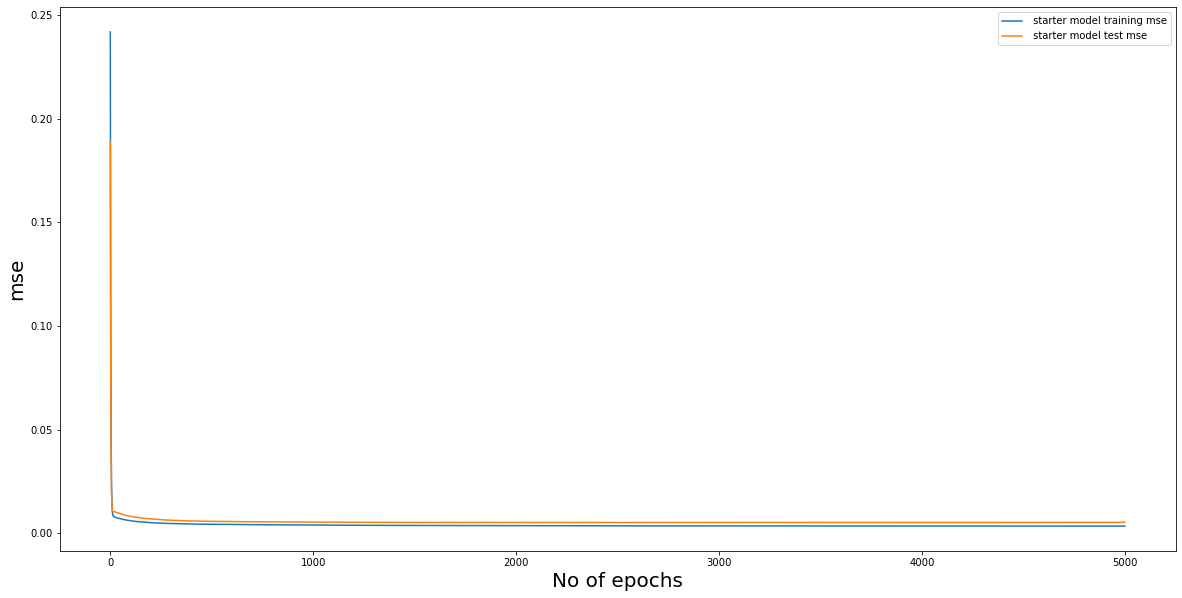

Lowest train MSE: 0.0034271995536983013
Lowest test MSE: 0.005164883565157652


In [6]:
plt.figure(figsize=(20,10))

plt.plot(histories['starter'].history['mse'], label=' starter model training mse')
plt.plot(histories['starter'].history['val_mse'], label=' starter model test mse')
plt.ylabel('mse', fontsize=20)
plt.xlabel('No of epochs', fontsize=20)
plt.legend(loc="upper right")
plt.show()

print(f"Lowest train MSE: {min(histories['starter'].history['mse'])}")
print(f"Lowest test MSE: {min(histories['starter'].history['val_mse'])}")

## Creating the main function for model creation

### train_model function

In [7]:
#PASS IN MODEL AFTER CREATING IT USING THE starter_model2 = Sequential([]) THING, COMPILATION AND FITTING DONE HERE

def train_model(currentModel, currentX = X, currenty = y, SEED_VALUE = 10, LEARNING_RATE = 0.001, BATCH_SIZE = 8, EPOCHS = 100, CALLBACK= [] ):
    tf.random.set_seed(SEED_VALUE)

    X_train, X_test, y_train, y_test = train_test_split(currentX, currenty, test_size=0.30, shuffle=True)
    
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
    LOSS_TYPE = MeanSquaredError()
    METRICS = ["mse"]

    currentModel.compile(optimizer=OPTIMIZER, 
                       loss=LOSS_TYPE,
                       metrics=METRICS)

    start_time = time.time()
    history = currentModel.fit(X_train, y_train,
                                 epochs=EPOCHS,
                                 batch_size=BATCH_SIZE,
                                 validation_data=(X_test, y_test),
                                 verbose = 2,
                                 callbacks=CALLBACK)
    training_time = time.time() - start_time
    
    print("\n---TRAINING COMPLETE---\n")
    return history, training_time
    

### plot_model function

In [20]:
def plot_model(X, LABELX='model training mse', LABELY='model test mse'):
    plt.figure(figsize=(20,10))
    plt.plot(X.history['mse'], label=LABELX)
    plt.plot(X.history['val_mse'], label=LABELY)
    plt.ylabel('mse')
    plt.xlabel('No. of epochs', fontsize = 20)
    plt.legend(loc="upper right", fontsize = 20)
    plt.show()

## 1(b) - Early Stopping

A major challenge in training neural networks is how long to train them.

Too little training will mean that the model will underfit the train and the test sets. Too much training will mean that the model will overfit the training dataset and have poor performance on the test set.

A compromise is simply stopping training when the loss seems to stagnate in order to prevent over-fitting and avoid redundant resource utilization due to running of these extra epochs.

We implement this thorugh a Keras callback method called "EarlyStopping". We will monitor the Mean Square Error (MSE), and choose a "Patience level" of x. Patience level adds a delay to the trigger in terms of the number of epochs on which we would like to see no improvement.

In order to find the optimal value of x, we plot the frequency graph of MSE. As the number of epochs increase, the MSE decreases and slowly stagnates. From the frequency graph, we can intuitively find the frequency (and thus the epoch #) at which the MSE starts to stagnate.

<AxesSubplot:xlabel='freq'>

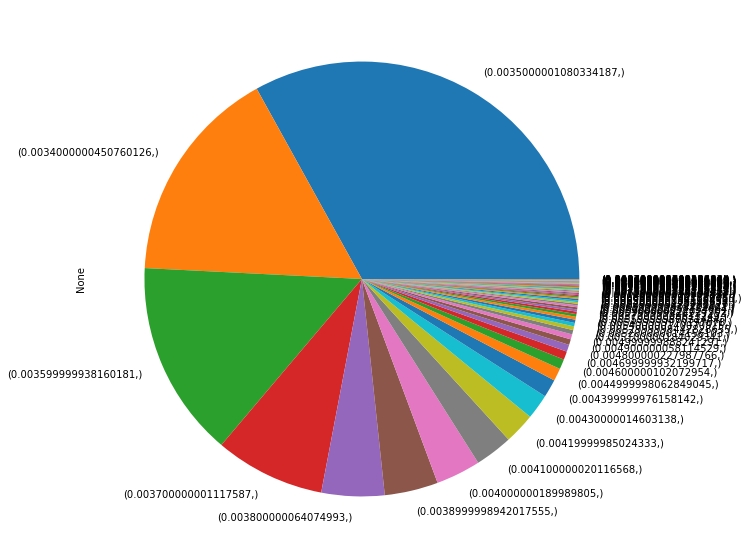

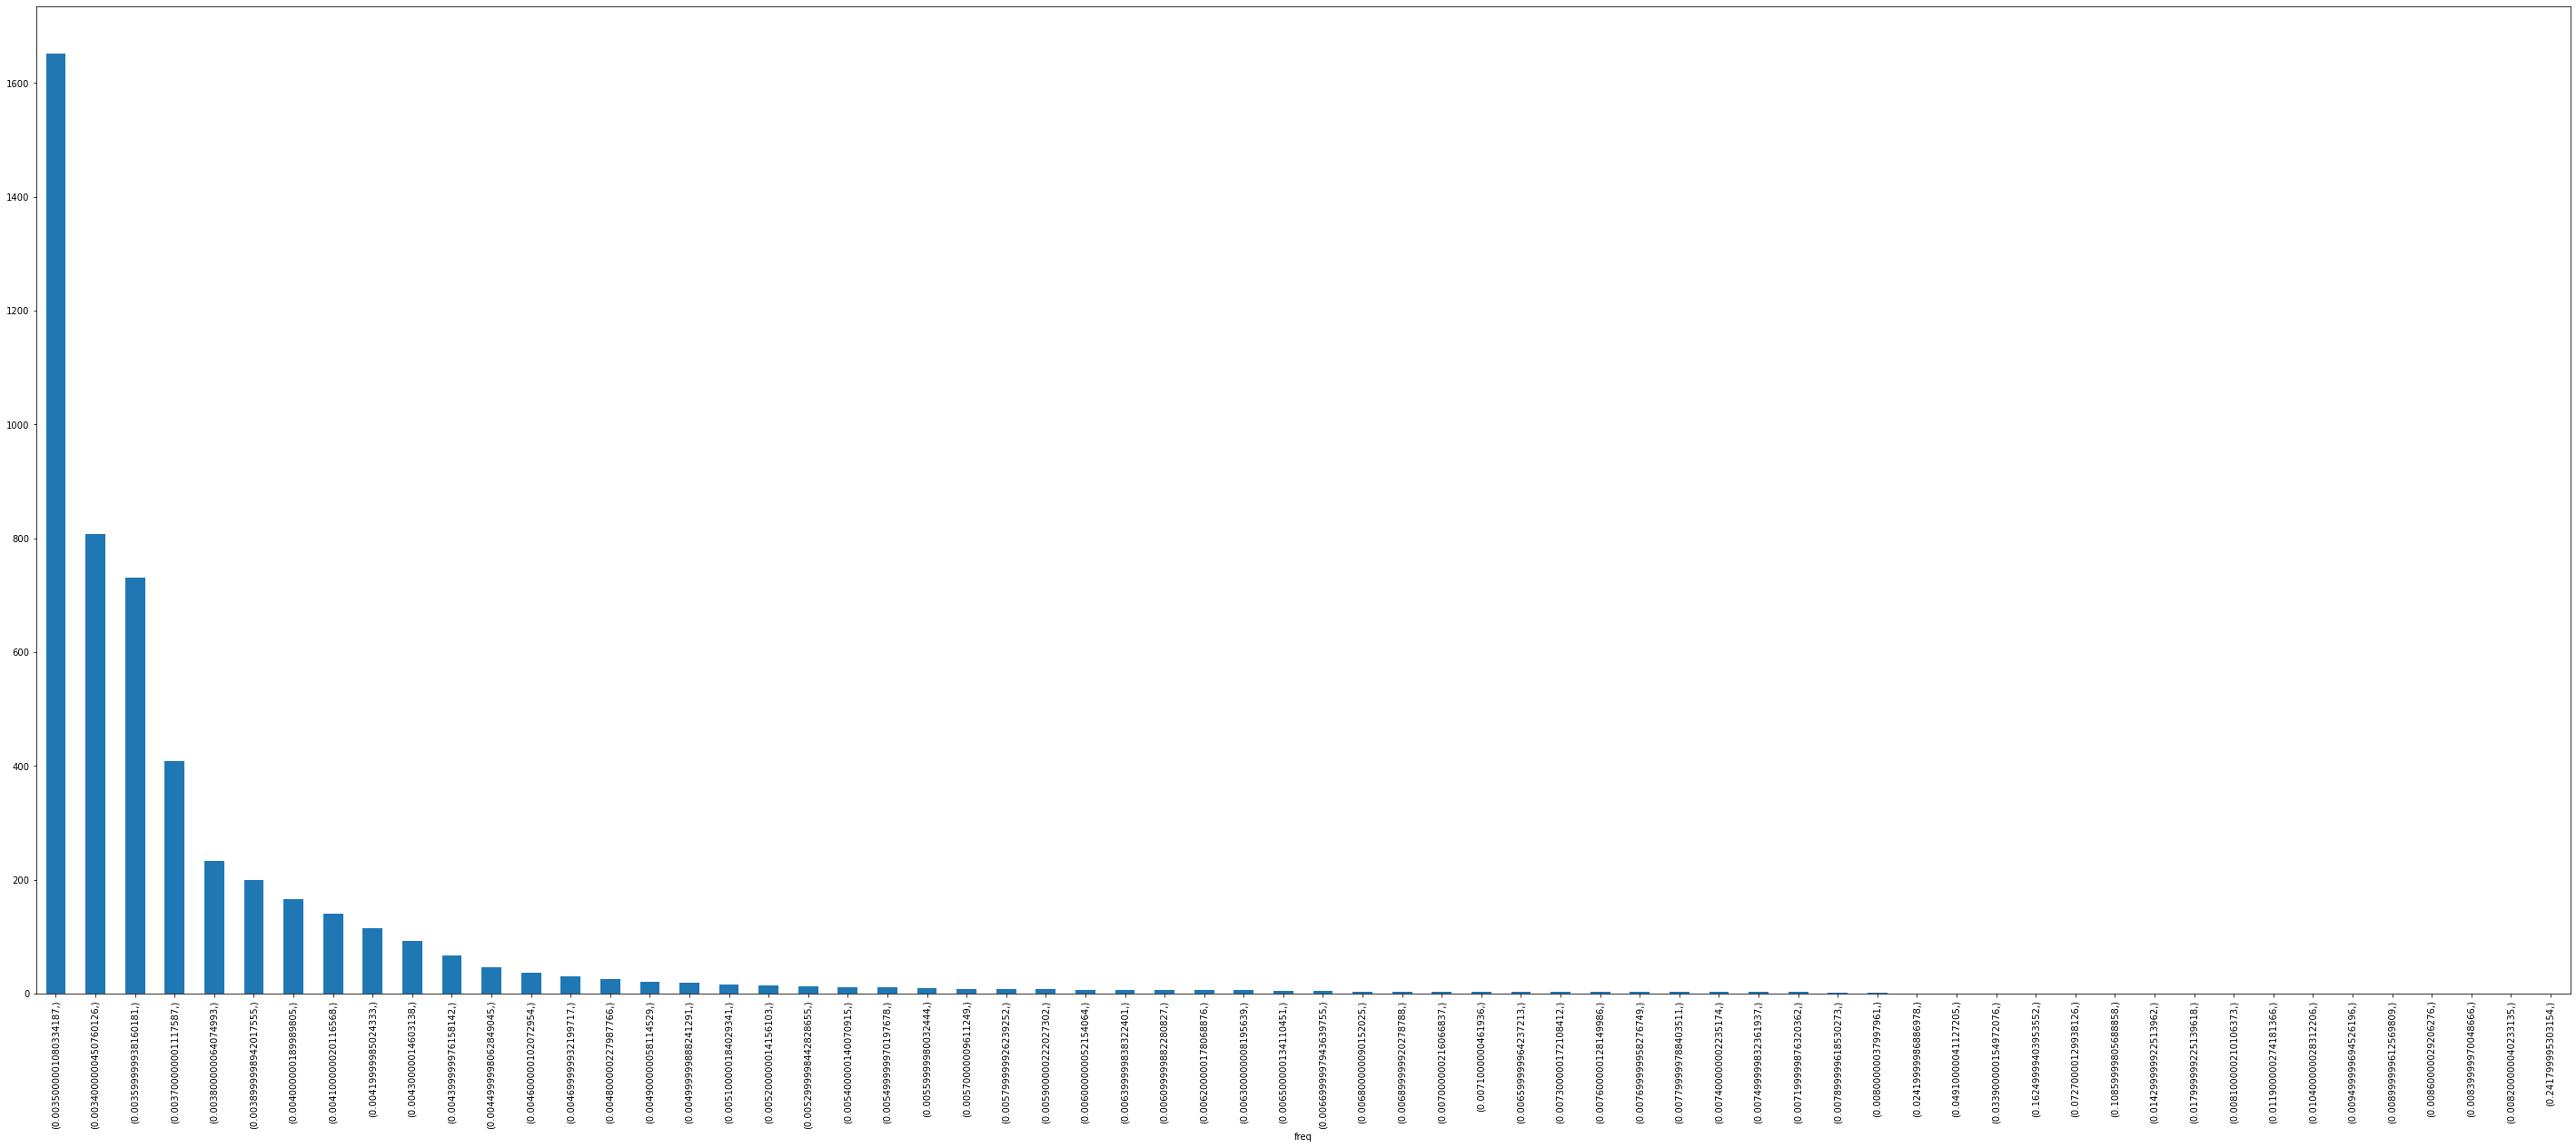

In [9]:
MSE = histories['starter'].history['mse']
roundedMSE = [round(num, 4) for num in MSE]

df = pd.DataFrame({'freq': roundedMSE})
fig, ax = plt.subplots()
df.value_counts().plot(ax=ax, kind='pie', figsize=(25,10))

fig, ax = plt.subplots()
df.value_counts().plot(ax=ax, kind='bar', figsize=(50,20))

From these graphs, it can be seen that from a MSE of 0.003700000001117587 (0.0037 approx.), it starts to stagnate. After 0.0037, the MSE reduces very slowly.
From the training history of the model, we can find the epoch at which the MSE is 0.0037.

In [10]:
roundedMSE.index(0.003700000001117587)

1400

Thus, we can either force stop at epoch 1400, or we can find the frequency of 0.0037, and set the patience level such that the execution stops before reaching that point. We have found that the frequency of 0.038 is 200. In order to stop the execution slightly before 0.037,  the patience level is set to 200.

Train on 280 samples, validate on 120 samples
Epoch 1/5000
280/280 - 0s - loss: 0.2605 - mse: 0.2537 - val_loss: 0.2168 - val_mse: 0.2100
Epoch 2/5000
280/280 - 0s - loss: 0.1783 - mse: 0.1715 - val_loss: 0.1485 - val_mse: 0.1417
Epoch 3/5000
280/280 - 0s - loss: 0.1223 - mse: 0.1155 - val_loss: 0.1024 - val_mse: 0.0955
Epoch 4/5000
280/280 - 0s - loss: 0.0849 - mse: 0.0780 - val_loss: 0.0718 - val_mse: 0.0649
Epoch 5/5000
280/280 - 0s - loss: 0.0602 - mse: 0.0534 - val_loss: 0.0518 - val_mse: 0.0449
Epoch 6/5000
280/280 - 0s - loss: 0.0442 - mse: 0.0374 - val_loss: 0.0388 - val_mse: 0.0319
Epoch 7/5000
280/280 - 0s - loss: 0.0340 - mse: 0.0271 - val_loss: 0.0306 - val_mse: 0.0237
Epoch 8/5000
280/280 - 0s - loss: 0.0275 - mse: 0.0206 - val_loss: 0.0253 - val_mse: 0.0184
Epoch 9/5000
280/280 - 0s - loss: 0.0234 - mse: 0.0165 - val_loss: 0.0221 - val_mse: 0.0152
Epoch 10/5000
280/280 - 0s - loss: 0.0209 - mse: 0.0140 - val_loss: 0.0200 - val_mse: 0.0131
Epoch 11/5000
280/280 - 0s - loss

Epoch 89/5000
280/280 - 0s - loss: 0.0139 - mse: 0.0071 - val_loss: 0.0135 - val_mse: 0.0067
Epoch 90/5000
280/280 - 0s - loss: 0.0139 - mse: 0.0071 - val_loss: 0.0135 - val_mse: 0.0067
Epoch 91/5000
280/280 - 0s - loss: 0.0139 - mse: 0.0071 - val_loss: 0.0135 - val_mse: 0.0067
Epoch 92/5000
280/280 - 0s - loss: 0.0138 - mse: 0.0070 - val_loss: 0.0134 - val_mse: 0.0066
Epoch 93/5000
280/280 - 0s - loss: 0.0138 - mse: 0.0070 - val_loss: 0.0134 - val_mse: 0.0066
Epoch 94/5000
280/280 - 0s - loss: 0.0138 - mse: 0.0070 - val_loss: 0.0134 - val_mse: 0.0066
Epoch 95/5000
280/280 - 0s - loss: 0.0138 - mse: 0.0070 - val_loss: 0.0134 - val_mse: 0.0066
Epoch 96/5000
280/280 - 0s - loss: 0.0137 - mse: 0.0070 - val_loss: 0.0133 - val_mse: 0.0065
Epoch 97/5000
280/280 - 0s - loss: 0.0137 - mse: 0.0069 - val_loss: 0.0133 - val_mse: 0.0065
Epoch 98/5000
280/280 - 0s - loss: 0.0137 - mse: 0.0069 - val_loss: 0.0133 - val_mse: 0.0065
Epoch 99/5000
280/280 - 0s - loss: 0.0137 - mse: 0.0069 - val_loss: 0.

Epoch 177/5000
280/280 - 0s - loss: 0.0126 - mse: 0.0059 - val_loss: 0.0121 - val_mse: 0.0054
Epoch 178/5000
280/280 - 0s - loss: 0.0126 - mse: 0.0059 - val_loss: 0.0120 - val_mse: 0.0053
Epoch 179/5000
280/280 - 0s - loss: 0.0126 - mse: 0.0059 - val_loss: 0.0120 - val_mse: 0.0053
Epoch 180/5000
280/280 - 0s - loss: 0.0126 - mse: 0.0059 - val_loss: 0.0120 - val_mse: 0.0053
Epoch 181/5000
280/280 - 0s - loss: 0.0125 - mse: 0.0059 - val_loss: 0.0120 - val_mse: 0.0053
Epoch 182/5000
280/280 - 0s - loss: 0.0125 - mse: 0.0058 - val_loss: 0.0120 - val_mse: 0.0053
Epoch 183/5000
280/280 - 0s - loss: 0.0125 - mse: 0.0058 - val_loss: 0.0120 - val_mse: 0.0053
Epoch 184/5000
280/280 - 0s - loss: 0.0125 - mse: 0.0058 - val_loss: 0.0120 - val_mse: 0.0053
Epoch 185/5000
280/280 - 0s - loss: 0.0125 - mse: 0.0058 - val_loss: 0.0120 - val_mse: 0.0053
Epoch 186/5000
280/280 - 0s - loss: 0.0125 - mse: 0.0058 - val_loss: 0.0120 - val_mse: 0.0053
Epoch 187/5000
280/280 - 0s - loss: 0.0125 - mse: 0.0058 - v

Epoch 265/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0053 - val_loss: 0.0114 - val_mse: 0.0048
Epoch 266/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0053 - val_loss: 0.0114 - val_mse: 0.0048
Epoch 267/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0053 - val_loss: 0.0114 - val_mse: 0.0048
Epoch 268/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0053 - val_loss: 0.0114 - val_mse: 0.0048
Epoch 269/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0053 - val_loss: 0.0114 - val_mse: 0.0048
Epoch 270/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0053 - val_loss: 0.0114 - val_mse: 0.0048
Epoch 271/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0053 - val_loss: 0.0114 - val_mse: 0.0048
Epoch 272/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0053 - val_loss: 0.0113 - val_mse: 0.0048
Epoch 273/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0053 - val_loss: 0.0113 - val_mse: 0.0048
Epoch 274/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0053 - val_loss: 0.0113 - val_mse: 0.0047
Epoch 275/5000
280/280 - 0s - loss: 0.0119 - mse: 0.0053 - v

280/280 - 0s - loss: 0.0116 - mse: 0.0051 - val_loss: 0.0110 - val_mse: 0.0045
Epoch 353/5000
280/280 - 0s - loss: 0.0116 - mse: 0.0051 - val_loss: 0.0110 - val_mse: 0.0045
Epoch 354/5000
280/280 - 0s - loss: 0.0116 - mse: 0.0051 - val_loss: 0.0110 - val_mse: 0.0045
Epoch 355/5000
280/280 - 0s - loss: 0.0116 - mse: 0.0051 - val_loss: 0.0110 - val_mse: 0.0045
Epoch 356/5000
280/280 - 0s - loss: 0.0116 - mse: 0.0051 - val_loss: 0.0110 - val_mse: 0.0045
Epoch 357/5000
280/280 - 0s - loss: 0.0116 - mse: 0.0051 - val_loss: 0.0110 - val_mse: 0.0045
Epoch 358/5000
280/280 - 0s - loss: 0.0116 - mse: 0.0051 - val_loss: 0.0110 - val_mse: 0.0045
Epoch 359/5000
280/280 - 0s - loss: 0.0116 - mse: 0.0050 - val_loss: 0.0110 - val_mse: 0.0045
Epoch 360/5000
280/280 - 0s - loss: 0.0116 - mse: 0.0050 - val_loss: 0.0110 - val_mse: 0.0045
Epoch 361/5000
280/280 - 0s - loss: 0.0115 - mse: 0.0050 - val_loss: 0.0110 - val_mse: 0.0045
Epoch 362/5000
280/280 - 0s - loss: 0.0115 - mse: 0.0050 - val_loss: 0.0110

Epoch 440/5000
280/280 - 0s - loss: 0.0113 - mse: 0.0049 - val_loss: 0.0108 - val_mse: 0.0043
Epoch 441/5000
280/280 - 0s - loss: 0.0113 - mse: 0.0049 - val_loss: 0.0108 - val_mse: 0.0043
Epoch 442/5000
280/280 - 0s - loss: 0.0113 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0043
Epoch 443/5000
280/280 - 0s - loss: 0.0113 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0043
Epoch 444/5000
280/280 - 0s - loss: 0.0113 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0043
Epoch 445/5000
280/280 - 0s - loss: 0.0113 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0043
Epoch 446/5000
280/280 - 0s - loss: 0.0113 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0043
Epoch 447/5000
280/280 - 0s - loss: 0.0113 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0043
Epoch 448/5000
280/280 - 0s - loss: 0.0113 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0043
Epoch 449/5000
280/280 - 0s - loss: 0.0113 - mse: 0.0049 - val_loss: 0.0107 - val_mse: 0.0043
Epoch 450/5000
280/280 - 0s - loss: 0.0113 - mse: 0.0049 - v

Epoch 528/5000
280/280 - 0s - loss: 0.0111 - mse: 0.0048 - val_loss: 0.0106 - val_mse: 0.0042
Epoch 529/5000
280/280 - 0s - loss: 0.0111 - mse: 0.0048 - val_loss: 0.0106 - val_mse: 0.0042
Epoch 530/5000
280/280 - 0s - loss: 0.0111 - mse: 0.0048 - val_loss: 0.0106 - val_mse: 0.0042
Epoch 531/5000
280/280 - 0s - loss: 0.0111 - mse: 0.0048 - val_loss: 0.0105 - val_mse: 0.0042
Epoch 532/5000
280/280 - 0s - loss: 0.0111 - mse: 0.0048 - val_loss: 0.0105 - val_mse: 0.0042
Epoch 533/5000
280/280 - 0s - loss: 0.0111 - mse: 0.0048 - val_loss: 0.0105 - val_mse: 0.0042
Epoch 534/5000
280/280 - 0s - loss: 0.0111 - mse: 0.0048 - val_loss: 0.0105 - val_mse: 0.0042
Epoch 535/5000
280/280 - 0s - loss: 0.0111 - mse: 0.0048 - val_loss: 0.0105 - val_mse: 0.0042
Epoch 536/5000
280/280 - 0s - loss: 0.0111 - mse: 0.0048 - val_loss: 0.0105 - val_mse: 0.0042
Epoch 537/5000
280/280 - 0s - loss: 0.0111 - mse: 0.0048 - val_loss: 0.0105 - val_mse: 0.0042
Epoch 538/5000
280/280 - 0s - loss: 0.0111 - mse: 0.0048 - v

Epoch 616/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 617/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 618/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 619/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 620/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 621/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 622/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 623/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 624/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 625/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0047 - val_loss: 0.0104 - val_mse: 0.0041
Epoch 626/5000
280/280 - 0s - loss: 0.0110 - mse: 0.0047 - v

280/280 - 0s - loss: 0.0109 - mse: 0.0047 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 704/5000
280/280 - 0s - loss: 0.0109 - mse: 0.0047 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 705/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0047 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 706/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0047 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 707/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0047 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 708/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0047 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 709/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0047 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 710/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0047 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 711/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0047 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 712/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0047 - val_loss: 0.0103 - val_mse: 0.0041
Epoch 713/5000
280/280 - 0s - loss: 0.0108 - mse: 0.0047 - val_loss: 0.0102

Epoch 791/5000
280/280 - 0s - loss: 0.0107 - mse: 0.0046 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 792/5000
280/280 - 0s - loss: 0.0107 - mse: 0.0046 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 793/5000
280/280 - 0s - loss: 0.0107 - mse: 0.0046 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 794/5000
280/280 - 0s - loss: 0.0107 - mse: 0.0046 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 795/5000
280/280 - 0s - loss: 0.0107 - mse: 0.0046 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 796/5000
280/280 - 0s - loss: 0.0107 - mse: 0.0046 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 797/5000
280/280 - 0s - loss: 0.0107 - mse: 0.0046 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 798/5000
280/280 - 0s - loss: 0.0107 - mse: 0.0046 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 799/5000
280/280 - 0s - loss: 0.0107 - mse: 0.0046 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 800/5000
280/280 - 0s - loss: 0.0107 - mse: 0.0046 - val_loss: 0.0101 - val_mse: 0.0040
Epoch 801/5000
280/280 - 0s - loss: 0.0107 - mse: 0.0046 - v

280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 879/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 880/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 881/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 882/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 883/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 884/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 885/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 886/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 887/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0100 - val_mse: 0.0040
Epoch 888/5000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0100

Epoch 966/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0045 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 967/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0045 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 968/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0045 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 969/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0045 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 970/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0045 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 971/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0045 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 972/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0045 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 973/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0045 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 974/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0045 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 975/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0045 - val_loss: 0.0099 - val_mse: 0.0039
Epoch 976/5000
280/280 - 0s - loss: 0.0105 - mse: 0.0045 - v

Epoch 1053/5000
280/280 - 0s - loss: 0.0104 - mse: 0.0045 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1054/5000
280/280 - 0s - loss: 0.0104 - mse: 0.0045 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1055/5000
280/280 - 0s - loss: 0.0104 - mse: 0.0045 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1056/5000
280/280 - 0s - loss: 0.0104 - mse: 0.0045 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1057/5000
280/280 - 0s - loss: 0.0104 - mse: 0.0045 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1058/5000
280/280 - 0s - loss: 0.0104 - mse: 0.0045 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1059/5000
280/280 - 0s - loss: 0.0104 - mse: 0.0045 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1060/5000
280/280 - 0s - loss: 0.0104 - mse: 0.0045 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1061/5000
280/280 - 0s - loss: 0.0104 - mse: 0.0045 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1062/5000
280/280 - 0s - loss: 0.0104 - mse: 0.0045 - val_loss: 0.0098 - val_mse: 0.0039
Epoch 1063/5000
280/280 - 0s - loss: 0.0104 - mse:

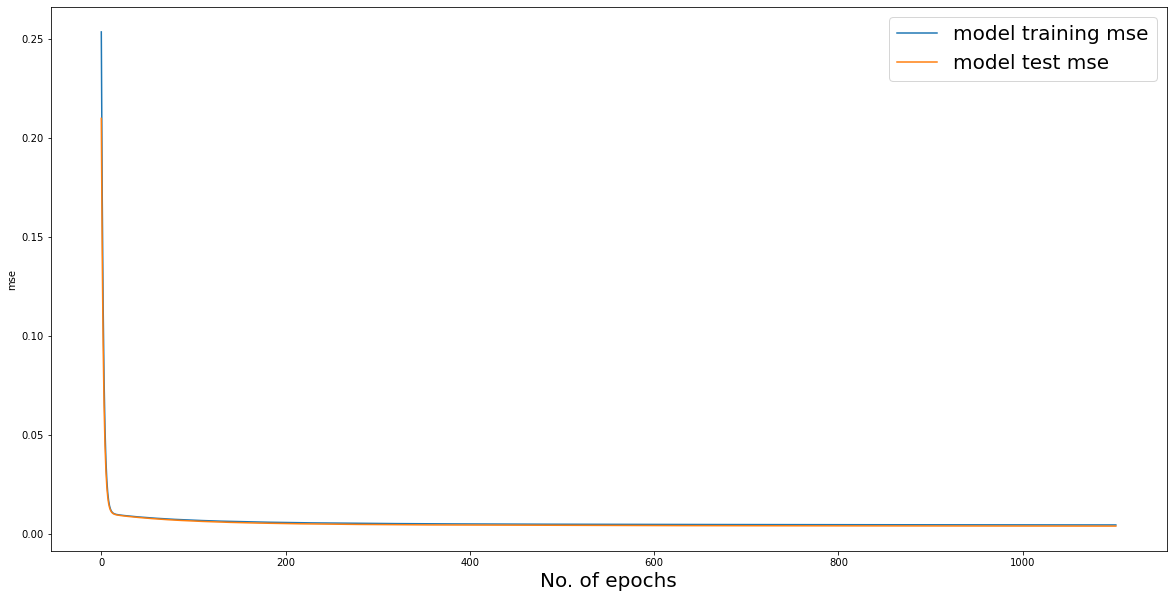

In [21]:
starter_model2 = Sequential([
    Dense(units=10, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(units = 1, activation='linear')
    ])

historyNew, timeNew = train_model(currentModel=starter_model2, SEED_VALUE=1, EPOCHS = 5000, CALLBACK=[EarlyStopping(monitor='mse',  verbose=2, patience=200, min_delta=0.0001)])

plot_model(historyNew)

As you can see, the training early stopped before epoch 1400, i.e, at epoch 1270.

## 1(c) - Graph

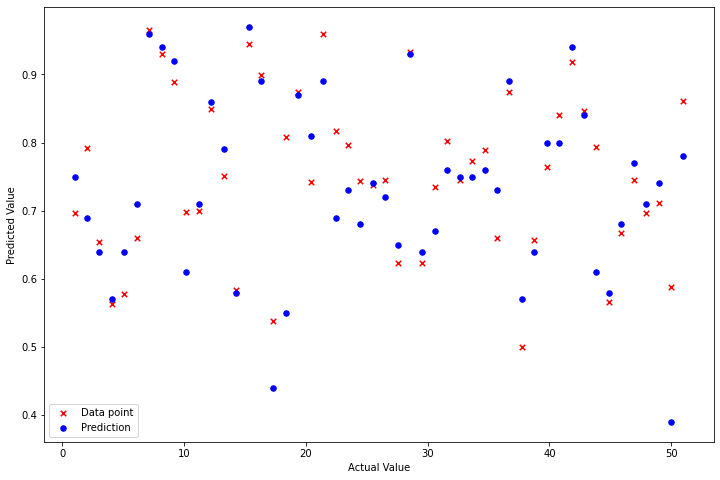

In [22]:
X_test_graph = X_test[0:50]
y_test_graph = y_test[0:50]

predictions = starter_model2.predict(X_test_graph)

plt.figure(figsize=(12,8))
plt.scatter(x=np.linspace(1,51,50), y=predictions, c='r', label="Data point", marker = 'x', s=30)
plt.scatter(x=np.linspace(1,51,50), y=y_test_graph, c='b', label="Prediction", marker = 'o', s=30)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend(loc='lower left')
plt.show()

Given the small dataset we have to train on, the graph shows that the predictions are reasonably close to the actual value, showing that the model performs well. 

# 2. Recursive feature elimination (RFE)

RFE is a feature selection method that removes unnecessary features from the inputs. We remove all the features one-by-one, and train the models with 6 features each. We Then find the model with the best MSE. Repeat the same steps for removing one more feature from the best 6-feature model, and compare the 5-feature model with the 7 and 6-feature models.

In [13]:
# Loading the data
data = np.genfromtxt('admission_predict.csv', delimiter= ',')
data = data[1:] # Remove nan row
X = data[:, 1:8]
y = data[:,-1]

We first check the correlation matrix plot of the dataset, to get a good idea of which features affect the output the most

In [14]:
data2 = data[:, 1:]

dfdata = pd.DataFrame(data2)
dfdata.columns = ['GRE','TOEFL','Uni Rating','SOP','LOR','CGPA', 'Research', 'Chances']
corr = dfdata.corr()
corr.style.background_gradient()

,GRE,TOEFL,Uni Rating,SOP,LOR,CGPA,Research,Chances
GRE,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
Uni Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chances,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


From the correlation matrix plot, it can be seen that "Research" has the lowest correlation with "Chances of admission".

It should be noted that even though high correlation between input features and output is better for the model, having high inter-feature correlation can be bad for the model as it may give more weight to similar features and cause over-fitting.

The best regression models are those in which the predictor variables each correlate highly with the dependent (outcome) variable but correlate at most only minimally with each other. Such a model is often called "low noise" and will be statistically robust. 

Although Research has lowest correlation with output, it also has lowest correlation with the other features, so removing it might also cause harm, but given its extremely low correlation with the output, it is safe to say that it will be one of the least desired features. 

It is thus likely that RFE level 1 will remove Research. It is important to note the performance of different feature is highly dependent upon on the stochastic nature of training, as well as the inter-feature correlation, and thus it is hard to exactly predict the worst feature, as it may be different for every seed value.

## RFE Level 1 - Removing 1 feature from a 7-feature dataset

In [23]:
timingDict = {}
historyDict = {}
mseDict = {}
feature_map_7 = {
    0 : 'GRE',
    1 : 'TOEFL',
    2 : 'Uni Rating',
    3 : 'SOP',
    4 : 'LOR',
    5 : 'CGPA', 
    6 : 'Research',
}

EPOCHS = 1000

rfc_model = Sequential([
Dense(units=10, activation='relu', kernel_regularizer=l2(0.001)),
Dense(units = 1, activation='linear')
])
    
for i in range(7):
    
    print(f"\n--- TRAINING RFC-7 WITHOUT FEATURE: {feature_map_7[i]} --- \n")
    rfc_model_copy = tf.keras.models.clone_model(rfc_model)
    tempX = np.delete(X, i, 1) #get X2 by removing column i
    currentHistory, currentTiming = train_model(currentModel = rfc_model_copy, currentX = tempX, currenty = y, 
                                                SEED_VALUE = 1, EPOCHS = EPOCHS)
    
    timingDict[i]=currentTiming
    historyDict[i]=currentHistory
    mseDict[i]=min(currentHistory.history['mse'])
    
print(timingDict)
print(historyDict)
print(mseDict)


--- TRAINING RFC-7 WITHOUT FEATURE: GRE --- 

Train on 280 samples, validate on 120 samples
Epoch 1/1000
280/280 - 0s - loss: 0.1945 - mse: 0.1883 - val_loss: 0.1735 - val_mse: 0.1673
Epoch 2/1000
280/280 - 0s - loss: 0.1398 - mse: 0.1336 - val_loss: 0.1266 - val_mse: 0.1205
Epoch 3/1000
280/280 - 0s - loss: 0.1034 - mse: 0.0972 - val_loss: 0.0954 - val_mse: 0.0892
Epoch 4/1000
280/280 - 0s - loss: 0.0794 - mse: 0.0732 - val_loss: 0.0746 - val_mse: 0.0684
Epoch 5/1000
280/280 - 0s - loss: 0.0638 - mse: 0.0576 - val_loss: 0.0610 - val_mse: 0.0547
Epoch 6/1000
280/280 - 0s - loss: 0.0537 - mse: 0.0475 - val_loss: 0.0520 - val_mse: 0.0458
Epoch 7/1000
280/280 - 0s - loss: 0.0472 - mse: 0.0410 - val_loss: 0.0461 - val_mse: 0.0399
Epoch 8/1000
280/280 - 0s - loss: 0.0430 - mse: 0.0367 - val_loss: 0.0421 - val_mse: 0.0359
Epoch 9/1000
280/280 - 0s - loss: 0.0401 - mse: 0.0339 - val_loss: 0.0393 - val_mse: 0.0331
Epoch 10/1000
280/280 - 0s - loss: 0.0382 - mse: 0.0319 - val_loss: 0.0374 - va

Epoch 89/1000
280/280 - 0s - loss: 0.0173 - mse: 0.0112 - val_loss: 0.0153 - val_mse: 0.0092
Epoch 90/1000
280/280 - 0s - loss: 0.0172 - mse: 0.0111 - val_loss: 0.0152 - val_mse: 0.0091
Epoch 91/1000
280/280 - 0s - loss: 0.0171 - mse: 0.0111 - val_loss: 0.0151 - val_mse: 0.0091
Epoch 92/1000
280/280 - 0s - loss: 0.0170 - mse: 0.0110 - val_loss: 0.0150 - val_mse: 0.0090
Epoch 93/1000
280/280 - 0s - loss: 0.0170 - mse: 0.0109 - val_loss: 0.0150 - val_mse: 0.0089
Epoch 94/1000
280/280 - 0s - loss: 0.0169 - mse: 0.0108 - val_loss: 0.0149 - val_mse: 0.0088
Epoch 95/1000
280/280 - 0s - loss: 0.0168 - mse: 0.0107 - val_loss: 0.0148 - val_mse: 0.0087
Epoch 96/1000
280/280 - 0s - loss: 0.0167 - mse: 0.0107 - val_loss: 0.0147 - val_mse: 0.0087
Epoch 97/1000
280/280 - 0s - loss: 0.0167 - mse: 0.0106 - val_loss: 0.0146 - val_mse: 0.0086
Epoch 98/1000
280/280 - 0s - loss: 0.0166 - mse: 0.0105 - val_loss: 0.0146 - val_mse: 0.0085
Epoch 99/1000
280/280 - 0s - loss: 0.0165 - mse: 0.0105 - val_loss: 0.

Epoch 177/1000
280/280 - 0s - loss: 0.0135 - mse: 0.0075 - val_loss: 0.0113 - val_mse: 0.0054
Epoch 178/1000
280/280 - 0s - loss: 0.0134 - mse: 0.0075 - val_loss: 0.0113 - val_mse: 0.0053
Epoch 179/1000
280/280 - 0s - loss: 0.0134 - mse: 0.0075 - val_loss: 0.0113 - val_mse: 0.0053
Epoch 180/1000
280/280 - 0s - loss: 0.0134 - mse: 0.0074 - val_loss: 0.0113 - val_mse: 0.0053
Epoch 181/1000
280/280 - 0s - loss: 0.0134 - mse: 0.0074 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 182/1000
280/280 - 0s - loss: 0.0134 - mse: 0.0074 - val_loss: 0.0112 - val_mse: 0.0053
Epoch 183/1000
280/280 - 0s - loss: 0.0134 - mse: 0.0074 - val_loss: 0.0112 - val_mse: 0.0052
Epoch 184/1000
280/280 - 0s - loss: 0.0133 - mse: 0.0074 - val_loss: 0.0112 - val_mse: 0.0052
Epoch 185/1000
280/280 - 0s - loss: 0.0133 - mse: 0.0074 - val_loss: 0.0112 - val_mse: 0.0052
Epoch 186/1000
280/280 - 0s - loss: 0.0133 - mse: 0.0073 - val_loss: 0.0111 - val_mse: 0.0052
Epoch 187/1000
280/280 - 0s - loss: 0.0133 - mse: 0.0073 - v

280/280 - 0s - loss: 0.0124 - mse: 0.0065 - val_loss: 0.0102 - val_mse: 0.0044
Epoch 265/1000
280/280 - 0s - loss: 0.0124 - mse: 0.0065 - val_loss: 0.0102 - val_mse: 0.0043
Epoch 266/1000
280/280 - 0s - loss: 0.0124 - mse: 0.0065 - val_loss: 0.0102 - val_mse: 0.0043
Epoch 267/1000
280/280 - 0s - loss: 0.0124 - mse: 0.0065 - val_loss: 0.0102 - val_mse: 0.0043
Epoch 268/1000
280/280 - 0s - loss: 0.0124 - mse: 0.0065 - val_loss: 0.0102 - val_mse: 0.0043
Epoch 269/1000
280/280 - 0s - loss: 0.0124 - mse: 0.0065 - val_loss: 0.0102 - val_mse: 0.0043
Epoch 270/1000
280/280 - 0s - loss: 0.0124 - mse: 0.0065 - val_loss: 0.0102 - val_mse: 0.0043
Epoch 271/1000
280/280 - 0s - loss: 0.0124 - mse: 0.0065 - val_loss: 0.0102 - val_mse: 0.0043
Epoch 272/1000
280/280 - 0s - loss: 0.0124 - mse: 0.0065 - val_loss: 0.0102 - val_mse: 0.0043
Epoch 273/1000
280/280 - 0s - loss: 0.0124 - mse: 0.0065 - val_loss: 0.0102 - val_mse: 0.0043
Epoch 274/1000
280/280 - 0s - loss: 0.0124 - mse: 0.0065 - val_loss: 0.0102

Epoch 352/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0062 - val_loss: 0.0098 - val_mse: 0.0040
Epoch 353/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0062 - val_loss: 0.0098 - val_mse: 0.0040
Epoch 354/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0062 - val_loss: 0.0098 - val_mse: 0.0040
Epoch 355/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0062 - val_loss: 0.0098 - val_mse: 0.0040
Epoch 356/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0062 - val_loss: 0.0098 - val_mse: 0.0040
Epoch 357/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0062 - val_loss: 0.0098 - val_mse: 0.0040
Epoch 358/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0062 - val_loss: 0.0098 - val_mse: 0.0040
Epoch 359/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0062 - val_loss: 0.0098 - val_mse: 0.0040
Epoch 360/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0062 - val_loss: 0.0098 - val_mse: 0.0040
Epoch 361/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0062 - val_loss: 0.0098 - val_mse: 0.0040
Epoch 362/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0062 - v

280/280 - 0s - loss: 0.0117 - mse: 0.0060 - val_loss: 0.0096 - val_mse: 0.0038
Epoch 440/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0060 - val_loss: 0.0096 - val_mse: 0.0038
Epoch 441/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0060 - val_loss: 0.0096 - val_mse: 0.0038
Epoch 442/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0060 - val_loss: 0.0096 - val_mse: 0.0038
Epoch 443/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0060 - val_loss: 0.0096 - val_mse: 0.0038
Epoch 444/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0060 - val_loss: 0.0096 - val_mse: 0.0038
Epoch 445/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0060 - val_loss: 0.0096 - val_mse: 0.0038
Epoch 446/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0060 - val_loss: 0.0096 - val_mse: 0.0038
Epoch 447/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0060 - val_loss: 0.0096 - val_mse: 0.0038
Epoch 448/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0060 - val_loss: 0.0096 - val_mse: 0.0038
Epoch 449/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0060 - val_loss: 0.0096

Epoch 527/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0094 - val_mse: 0.0037
Epoch 528/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0094 - val_mse: 0.0037
Epoch 529/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0094 - val_mse: 0.0037
Epoch 530/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0094 - val_mse: 0.0037
Epoch 531/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0094 - val_mse: 0.0037
Epoch 532/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0094 - val_mse: 0.0037
Epoch 533/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0094 - val_mse: 0.0037
Epoch 534/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0059 - val_loss: 0.0094 - val_mse: 0.0037
Epoch 535/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0058 - val_loss: 0.0094 - val_mse: 0.0037
Epoch 536/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0058 - val_loss: 0.0094 - val_mse: 0.0037
Epoch 537/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0058 - v

280/280 - 0s - loss: 0.0114 - mse: 0.0058 - val_loss: 0.0093 - val_mse: 0.0037
Epoch 615/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0058 - val_loss: 0.0093 - val_mse: 0.0037
Epoch 616/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0058 - val_loss: 0.0093 - val_mse: 0.0037
Epoch 617/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0058 - val_loss: 0.0093 - val_mse: 0.0037
Epoch 618/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0058 - val_loss: 0.0093 - val_mse: 0.0037
Epoch 619/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0058 - val_loss: 0.0093 - val_mse: 0.0037
Epoch 620/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0057 - val_loss: 0.0093 - val_mse: 0.0037
Epoch 621/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0057 - val_loss: 0.0093 - val_mse: 0.0037
Epoch 622/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0057 - val_loss: 0.0093 - val_mse: 0.0037
Epoch 623/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0057 - val_loss: 0.0093 - val_mse: 0.0037
Epoch 624/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0057 - val_loss: 0.0093

Epoch 702/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0057 - val_loss: 0.0091 - val_mse: 0.0036
Epoch 703/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0057 - val_loss: 0.0091 - val_mse: 0.0036
Epoch 704/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0057 - val_loss: 0.0091 - val_mse: 0.0036
Epoch 705/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0057 - val_loss: 0.0091 - val_mse: 0.0036
Epoch 706/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0057 - val_loss: 0.0091 - val_mse: 0.0036
Epoch 707/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0057 - val_loss: 0.0091 - val_mse: 0.0036
Epoch 708/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0057 - val_loss: 0.0091 - val_mse: 0.0036
Epoch 709/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0057 - val_loss: 0.0091 - val_mse: 0.0036
Epoch 710/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0057 - val_loss: 0.0091 - val_mse: 0.0036
Epoch 711/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0057 - val_loss: 0.0091 - val_mse: 0.0036
Epoch 712/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0057 - v

280/280 - 0s - loss: 0.0111 - mse: 0.0056 - val_loss: 0.0090 - val_mse: 0.0035
Epoch 790/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0056 - val_loss: 0.0090 - val_mse: 0.0035
Epoch 791/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0056 - val_loss: 0.0090 - val_mse: 0.0035
Epoch 792/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0056 - val_loss: 0.0090 - val_mse: 0.0035
Epoch 793/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0056 - val_loss: 0.0090 - val_mse: 0.0035
Epoch 794/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0056 - val_loss: 0.0090 - val_mse: 0.0035
Epoch 795/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0056 - val_loss: 0.0090 - val_mse: 0.0035
Epoch 796/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0056 - val_loss: 0.0090 - val_mse: 0.0035
Epoch 797/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0056 - val_loss: 0.0090 - val_mse: 0.0035
Epoch 798/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0056 - val_loss: 0.0090 - val_mse: 0.0035
Epoch 799/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0056 - val_loss: 0.0090

Epoch 877/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0055 - val_loss: 0.0089 - val_mse: 0.0035
Epoch 878/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0055 - val_loss: 0.0089 - val_mse: 0.0035
Epoch 879/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0055 - val_loss: 0.0089 - val_mse: 0.0035
Epoch 880/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0055 - val_loss: 0.0089 - val_mse: 0.0035
Epoch 881/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0055 - val_loss: 0.0089 - val_mse: 0.0035
Epoch 882/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0055 - val_loss: 0.0089 - val_mse: 0.0035
Epoch 883/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0055 - val_loss: 0.0089 - val_mse: 0.0035
Epoch 884/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0055 - val_loss: 0.0089 - val_mse: 0.0035
Epoch 885/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0055 - val_loss: 0.0089 - val_mse: 0.0035
Epoch 886/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0055 - val_loss: 0.0089 - val_mse: 0.0035
Epoch 887/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0055 - v

Epoch 965/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0088 - val_mse: 0.0035
Epoch 966/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0088 - val_mse: 0.0035
Epoch 967/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0088 - val_mse: 0.0035
Epoch 968/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0088 - val_mse: 0.0035
Epoch 969/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0088 - val_mse: 0.0035
Epoch 970/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0088 - val_mse: 0.0035
Epoch 971/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0088 - val_mse: 0.0035
Epoch 972/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0088 - val_mse: 0.0035
Epoch 973/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0088 - val_mse: 0.0035
Epoch 974/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0055 - val_loss: 0.0088 - val_mse: 0.0035
Epoch 975/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0055 - v

Epoch 52/1000
280/280 - 0s - loss: 0.0218 - mse: 0.0157 - val_loss: 0.0226 - val_mse: 0.0164
Epoch 53/1000
280/280 - 0s - loss: 0.0216 - mse: 0.0155 - val_loss: 0.0224 - val_mse: 0.0162
Epoch 54/1000
280/280 - 0s - loss: 0.0214 - mse: 0.0153 - val_loss: 0.0222 - val_mse: 0.0161
Epoch 55/1000
280/280 - 0s - loss: 0.0212 - mse: 0.0151 - val_loss: 0.0220 - val_mse: 0.0159
Epoch 56/1000
280/280 - 0s - loss: 0.0211 - mse: 0.0149 - val_loss: 0.0218 - val_mse: 0.0157
Epoch 57/1000
280/280 - 0s - loss: 0.0209 - mse: 0.0148 - val_loss: 0.0217 - val_mse: 0.0155
Epoch 58/1000
280/280 - 0s - loss: 0.0207 - mse: 0.0146 - val_loss: 0.0215 - val_mse: 0.0154
Epoch 59/1000
280/280 - 0s - loss: 0.0206 - mse: 0.0144 - val_loss: 0.0213 - val_mse: 0.0152
Epoch 60/1000
280/280 - 0s - loss: 0.0204 - mse: 0.0143 - val_loss: 0.0212 - val_mse: 0.0151
Epoch 61/1000
280/280 - 0s - loss: 0.0202 - mse: 0.0141 - val_loss: 0.0210 - val_mse: 0.0149
Epoch 62/1000
280/280 - 0s - loss: 0.0201 - mse: 0.0140 - val_loss: 0.

Epoch 140/1000
280/280 - 0s - loss: 0.0139 - mse: 0.0079 - val_loss: 0.0148 - val_mse: 0.0088
Epoch 141/1000
280/280 - 0s - loss: 0.0139 - mse: 0.0079 - val_loss: 0.0148 - val_mse: 0.0088
Epoch 142/1000
280/280 - 0s - loss: 0.0138 - mse: 0.0078 - val_loss: 0.0147 - val_mse: 0.0088
Epoch 143/1000
280/280 - 0s - loss: 0.0138 - mse: 0.0078 - val_loss: 0.0147 - val_mse: 0.0087
Epoch 144/1000
280/280 - 0s - loss: 0.0138 - mse: 0.0078 - val_loss: 0.0147 - val_mse: 0.0087
Epoch 145/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0077 - val_loss: 0.0146 - val_mse: 0.0087
Epoch 146/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0077 - val_loss: 0.0146 - val_mse: 0.0086
Epoch 147/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0077 - val_loss: 0.0146 - val_mse: 0.0086
Epoch 148/1000
280/280 - 0s - loss: 0.0136 - mse: 0.0076 - val_loss: 0.0146 - val_mse: 0.0086
Epoch 149/1000
280/280 - 0s - loss: 0.0136 - mse: 0.0076 - val_loss: 0.0145 - val_mse: 0.0085
Epoch 150/1000
280/280 - 0s - loss: 0.0136 - mse: 0.0076 - v

280/280 - 0s - loss: 0.0120 - mse: 0.0061 - val_loss: 0.0130 - val_mse: 0.0071
Epoch 228/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0061 - val_loss: 0.0130 - val_mse: 0.0071
Epoch 229/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0061 - val_loss: 0.0130 - val_mse: 0.0071
Epoch 230/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0061 - val_loss: 0.0130 - val_mse: 0.0071
Epoch 231/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0061 - val_loss: 0.0130 - val_mse: 0.0071
Epoch 232/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0061 - val_loss: 0.0130 - val_mse: 0.0071
Epoch 233/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0061 - val_loss: 0.0130 - val_mse: 0.0071
Epoch 234/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0061 - val_loss: 0.0129 - val_mse: 0.0070
Epoch 235/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0061 - val_loss: 0.0129 - val_mse: 0.0070
Epoch 236/1000
280/280 - 0s - loss: 0.0119 - mse: 0.0060 - val_loss: 0.0129 - val_mse: 0.0070
Epoch 237/1000
280/280 - 0s - loss: 0.0119 - mse: 0.0060 - val_loss: 0.0129

Epoch 315/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0065
Epoch 316/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0065
Epoch 317/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0065
Epoch 318/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0065
Epoch 319/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0065
Epoch 320/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0065
Epoch 321/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0065
Epoch 322/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0065
Epoch 323/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0065
Epoch 324/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0123 - val_mse: 0.0065
Epoch 325/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0055 - v

Epoch 403/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0062
Epoch 404/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0062
Epoch 405/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0062
Epoch 406/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0062
Epoch 407/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0061
Epoch 408/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0061
Epoch 409/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0061
Epoch 410/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0061
Epoch 411/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0061
Epoch 412/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0119 - val_mse: 0.0061
Epoch 413/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - v

280/280 - 0s - loss: 0.0108 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0059
Epoch 491/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0059
Epoch 492/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0059
Epoch 493/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0059
Epoch 494/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0059
Epoch 495/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0059
Epoch 496/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0059
Epoch 497/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0059
Epoch 498/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0059
Epoch 499/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0116 - val_mse: 0.0059
Epoch 500/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0116

Epoch 578/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0049 - val_loss: 0.0114 - val_mse: 0.0057
Epoch 579/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0049 - val_loss: 0.0114 - val_mse: 0.0057
Epoch 580/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0049 - val_loss: 0.0114 - val_mse: 0.0057
Epoch 581/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0049 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 582/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0049 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 583/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0049 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 584/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0049 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 585/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0049 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 586/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0049 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 587/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0049 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 588/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0049 - v

280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0111 - val_mse: 0.0056
Epoch 666/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0111 - val_mse: 0.0056
Epoch 667/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0111 - val_mse: 0.0056
Epoch 668/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0111 - val_mse: 0.0056
Epoch 669/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0111 - val_mse: 0.0056
Epoch 670/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0111 - val_mse: 0.0056
Epoch 671/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0111 - val_mse: 0.0056
Epoch 672/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0111 - val_mse: 0.0056
Epoch 673/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0111 - val_mse: 0.0056
Epoch 674/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0111 - val_mse: 0.0056
Epoch 675/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0111

Epoch 753/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 754/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 755/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 756/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 757/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 758/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 759/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 760/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 761/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 762/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0048 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 763/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0048 - v

280/280 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 841/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 842/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 843/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 844/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 845/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 846/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0108 - val_mse: 0.0053
Epoch 847/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0107 - val_mse: 0.0053
Epoch 848/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0107 - val_mse: 0.0053
Epoch 849/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0107 - val_mse: 0.0053
Epoch 850/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0047 - val_loss: 0.0107

Epoch 928/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0047 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 929/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0046 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 930/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0047 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 931/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0046 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 932/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0046 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 933/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0046 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 934/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0046 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 935/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0046 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 936/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0046 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 937/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0046 - val_loss: 0.0106 - val_mse: 0.0052
Epoch 938/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0046 - v

280/280 - 0s - loss: 0.0310 - mse: 0.0247 - val_loss: 0.0353 - val_mse: 0.0291
Epoch 15/1000
280/280 - 0s - loss: 0.0304 - mse: 0.0242 - val_loss: 0.0346 - val_mse: 0.0283
Epoch 16/1000
280/280 - 0s - loss: 0.0299 - mse: 0.0237 - val_loss: 0.0339 - val_mse: 0.0277
Epoch 17/1000
280/280 - 0s - loss: 0.0295 - mse: 0.0232 - val_loss: 0.0333 - val_mse: 0.0271
Epoch 18/1000
280/280 - 0s - loss: 0.0290 - mse: 0.0228 - val_loss: 0.0328 - val_mse: 0.0265
Epoch 19/1000
280/280 - 0s - loss: 0.0286 - mse: 0.0224 - val_loss: 0.0322 - val_mse: 0.0260
Epoch 20/1000
280/280 - 0s - loss: 0.0282 - mse: 0.0220 - val_loss: 0.0317 - val_mse: 0.0255
Epoch 21/1000
280/280 - 0s - loss: 0.0279 - mse: 0.0217 - val_loss: 0.0313 - val_mse: 0.0251
Epoch 22/1000
280/280 - 0s - loss: 0.0275 - mse: 0.0213 - val_loss: 0.0309 - val_mse: 0.0246
Epoch 23/1000
280/280 - 0s - loss: 0.0272 - mse: 0.0210 - val_loss: 0.0304 - val_mse: 0.0242
Epoch 24/1000
280/280 - 0s - loss: 0.0268 - mse: 0.0206 - val_loss: 0.0300 - val_mse

Epoch 103/1000
280/280 - 0s - loss: 0.0150 - mse: 0.0089 - val_loss: 0.0157 - val_mse: 0.0097
Epoch 104/1000
280/280 - 0s - loss: 0.0149 - mse: 0.0089 - val_loss: 0.0156 - val_mse: 0.0096
Epoch 105/1000
280/280 - 0s - loss: 0.0149 - mse: 0.0088 - val_loss: 0.0156 - val_mse: 0.0095
Epoch 106/1000
280/280 - 0s - loss: 0.0148 - mse: 0.0088 - val_loss: 0.0155 - val_mse: 0.0094
Epoch 107/1000
280/280 - 0s - loss: 0.0148 - mse: 0.0087 - val_loss: 0.0154 - val_mse: 0.0094
Epoch 108/1000
280/280 - 0s - loss: 0.0147 - mse: 0.0086 - val_loss: 0.0154 - val_mse: 0.0093
Epoch 109/1000
280/280 - 0s - loss: 0.0146 - mse: 0.0086 - val_loss: 0.0153 - val_mse: 0.0092
Epoch 110/1000
280/280 - 0s - loss: 0.0146 - mse: 0.0085 - val_loss: 0.0152 - val_mse: 0.0092
Epoch 111/1000
280/280 - 0s - loss: 0.0145 - mse: 0.0085 - val_loss: 0.0152 - val_mse: 0.0091
Epoch 112/1000
280/280 - 0s - loss: 0.0145 - mse: 0.0084 - val_loss: 0.0151 - val_mse: 0.0090
Epoch 113/1000
280/280 - 0s - loss: 0.0144 - mse: 0.0084 - v

Epoch 191/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0063 - val_loss: 0.0120 - val_mse: 0.0060
Epoch 192/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0063 - val_loss: 0.0120 - val_mse: 0.0060
Epoch 193/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0062 - val_loss: 0.0119 - val_mse: 0.0060
Epoch 194/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0062 - val_loss: 0.0119 - val_mse: 0.0060
Epoch 195/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0062 - val_loss: 0.0119 - val_mse: 0.0059
Epoch 196/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0062 - val_loss: 0.0119 - val_mse: 0.0059
Epoch 197/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0062 - val_loss: 0.0119 - val_mse: 0.0059
Epoch 198/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0062 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 199/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0062 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 200/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0061 - val_loss: 0.0118 - val_mse: 0.0058
Epoch 201/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0061 - v

Epoch 279/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0048
Epoch 280/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0048
Epoch 281/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0048
Epoch 282/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0048
Epoch 283/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0048
Epoch 284/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0048
Epoch 285/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0048
Epoch 286/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0048
Epoch 287/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0048
Epoch 288/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0055 - val_loss: 0.0106 - val_mse: 0.0048
Epoch 289/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0055 - v

Epoch 367/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0102 - val_mse: 0.0044
Epoch 368/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0102 - val_mse: 0.0044
Epoch 369/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0102 - val_mse: 0.0044
Epoch 370/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0102 - val_mse: 0.0044
Epoch 371/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0102 - val_mse: 0.0044
Epoch 372/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0101 - val_mse: 0.0044
Epoch 373/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0101 - val_mse: 0.0043
Epoch 374/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0101 - val_mse: 0.0043
Epoch 375/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0101 - val_mse: 0.0043
Epoch 376/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - val_loss: 0.0101 - val_mse: 0.0043
Epoch 377/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - v

280/280 - 0s - loss: 0.0108 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0041
Epoch 455/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0041
Epoch 456/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0041
Epoch 457/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0041
Epoch 458/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0041
Epoch 459/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0041
Epoch 460/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0041
Epoch 461/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0050 - val_loss: 0.0099 - val_mse: 0.0041
Epoch 462/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0050 - val_loss: 0.0099 - val_mse: 0.0041
Epoch 463/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0050 - val_loss: 0.0099 - val_mse: 0.0041
Epoch 464/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0050 - val_loss: 0.0098

Epoch 542/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0040
Epoch 543/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0040
Epoch 544/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0040
Epoch 545/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0040
Epoch 546/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0040
Epoch 547/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0040
Epoch 548/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0040
Epoch 549/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0049 - val_loss: 0.0097 - val_mse: 0.0040
Epoch 550/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0049 - val_loss: 0.0097 - val_mse: 0.0040
Epoch 551/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0049 - val_loss: 0.0097 - val_mse: 0.0040
Epoch 552/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0049 - v

280/280 - 0s - loss: 0.0105 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0040
Epoch 630/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0049 - val_loss: 0.0095 - val_mse: 0.0040
Epoch 631/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0049 - val_loss: 0.0095 - val_mse: 0.0040
Epoch 632/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0049 - val_loss: 0.0095 - val_mse: 0.0040
Epoch 633/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0049 - val_loss: 0.0095 - val_mse: 0.0040
Epoch 634/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0049 - val_loss: 0.0095 - val_mse: 0.0040
Epoch 635/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0049 - val_loss: 0.0095 - val_mse: 0.0040
Epoch 636/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0049 - val_loss: 0.0095 - val_mse: 0.0040
Epoch 637/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0049 - val_loss: 0.0095 - val_mse: 0.0039
Epoch 638/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0049 - val_loss: 0.0095 - val_mse: 0.0039
Epoch 639/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0049 - val_loss: 0.0095

Epoch 717/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 718/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 719/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 720/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 721/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 722/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 723/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 724/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 725/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 726/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 727/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0048 - v

280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 805/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 806/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 807/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 808/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0093 - val_mse: 0.0039
Epoch 809/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 810/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0039
Epoch 811/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0093 - val_mse: 0.0039
Epoch 812/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0093 - val_mse: 0.0039
Epoch 813/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0093 - val_mse: 0.0039
Epoch 814/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0048 - val_loss: 0.0093

Epoch 892/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0048 - val_loss: 0.0093 - val_mse: 0.0039
Epoch 893/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0048 - val_loss: 0.0093 - val_mse: 0.0039
Epoch 894/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0048 - val_loss: 0.0093 - val_mse: 0.0039
Epoch 895/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0048 - val_loss: 0.0093 - val_mse: 0.0039
Epoch 896/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0048 - val_loss: 0.0093 - val_mse: 0.0039
Epoch 897/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0048 - val_loss: 0.0093 - val_mse: 0.0039
Epoch 898/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0048 - val_loss: 0.0093 - val_mse: 0.0039
Epoch 899/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0048 - val_loss: 0.0093 - val_mse: 0.0039
Epoch 900/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0048 - val_loss: 0.0093 - val_mse: 0.0039
Epoch 901/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0048 - val_loss: 0.0093 - val_mse: 0.0039
Epoch 902/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0048 - v

Epoch 980/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0048 - val_loss: 0.0092 - val_mse: 0.0038
Epoch 981/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0048 - val_loss: 0.0092 - val_mse: 0.0038
Epoch 982/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0048 - val_loss: 0.0092 - val_mse: 0.0038
Epoch 983/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0048 - val_loss: 0.0092 - val_mse: 0.0038
Epoch 984/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0048 - val_loss: 0.0092 - val_mse: 0.0038
Epoch 985/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0048 - val_loss: 0.0092 - val_mse: 0.0038
Epoch 986/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0048 - val_loss: 0.0092 - val_mse: 0.0038
Epoch 987/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0048 - val_loss: 0.0092 - val_mse: 0.0038
Epoch 988/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0048 - val_loss: 0.0092 - val_mse: 0.0038
Epoch 989/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0048 - val_loss: 0.0092 - val_mse: 0.0038
Epoch 990/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0048 - v

Epoch 67/1000
280/280 - 0s - loss: 0.0175 - mse: 0.0114 - val_loss: 0.0187 - val_mse: 0.0126
Epoch 68/1000
280/280 - 0s - loss: 0.0174 - mse: 0.0112 - val_loss: 0.0185 - val_mse: 0.0124
Epoch 69/1000
280/280 - 0s - loss: 0.0172 - mse: 0.0111 - val_loss: 0.0184 - val_mse: 0.0123
Epoch 70/1000
280/280 - 0s - loss: 0.0171 - mse: 0.0110 - val_loss: 0.0183 - val_mse: 0.0122
Epoch 71/1000
280/280 - 0s - loss: 0.0170 - mse: 0.0109 - val_loss: 0.0182 - val_mse: 0.0121
Epoch 72/1000
280/280 - 0s - loss: 0.0169 - mse: 0.0108 - val_loss: 0.0181 - val_mse: 0.0120
Epoch 73/1000
280/280 - 0s - loss: 0.0168 - mse: 0.0107 - val_loss: 0.0180 - val_mse: 0.0119
Epoch 74/1000
280/280 - 0s - loss: 0.0167 - mse: 0.0106 - val_loss: 0.0179 - val_mse: 0.0118
Epoch 75/1000
280/280 - 0s - loss: 0.0166 - mse: 0.0105 - val_loss: 0.0178 - val_mse: 0.0117
Epoch 76/1000
280/280 - 0s - loss: 0.0165 - mse: 0.0104 - val_loss: 0.0177 - val_mse: 0.0116
Epoch 77/1000
280/280 - 0s - loss: 0.0164 - mse: 0.0103 - val_loss: 0.

Epoch 155/1000
280/280 - 0s - loss: 0.0123 - mse: 0.0063 - val_loss: 0.0133 - val_mse: 0.0073
Epoch 156/1000
280/280 - 0s - loss: 0.0123 - mse: 0.0063 - val_loss: 0.0133 - val_mse: 0.0073
Epoch 157/1000
280/280 - 0s - loss: 0.0123 - mse: 0.0063 - val_loss: 0.0133 - val_mse: 0.0073
Epoch 158/1000
280/280 - 0s - loss: 0.0123 - mse: 0.0063 - val_loss: 0.0132 - val_mse: 0.0072
Epoch 159/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0062 - val_loss: 0.0132 - val_mse: 0.0072
Epoch 160/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0062 - val_loss: 0.0132 - val_mse: 0.0072
Epoch 161/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0062 - val_loss: 0.0131 - val_mse: 0.0072
Epoch 162/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0062 - val_loss: 0.0131 - val_mse: 0.0071
Epoch 163/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0062 - val_loss: 0.0131 - val_mse: 0.0071
Epoch 164/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0061 - val_loss: 0.0131 - val_mse: 0.0071
Epoch 165/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0061 - v

Epoch 243/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0052 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 244/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0052 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 245/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0052 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 246/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0051 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 247/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0051 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 248/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0051 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 249/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0051 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 250/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0051 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 251/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0051 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 252/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0051 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 253/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0051 - v

Epoch 331/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0048 - val_loss: 0.0113 - val_mse: 0.0054
Epoch 332/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0048 - val_loss: 0.0113 - val_mse: 0.0054
Epoch 333/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0048 - val_loss: 0.0113 - val_mse: 0.0054
Epoch 334/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0048 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 335/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0048 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 336/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0048 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 337/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0048 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 338/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0048 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 339/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0048 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 340/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0048 - val_loss: 0.0112 - val_mse: 0.0054
Epoch 341/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0048 - v

280/280 - 0s - loss: 0.0104 - mse: 0.0047 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 419/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0047 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 420/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0047 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 421/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0047 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 422/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0047 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 423/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0047 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 424/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0046 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 425/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0047 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 426/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0046 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 427/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0046 - val_loss: 0.0109 - val_mse: 0.0052
Epoch 428/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0046 - val_loss: 0.0109

Epoch 506/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0046 - val_loss: 0.0107 - val_mse: 0.0050
Epoch 507/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0046 - val_loss: 0.0107 - val_mse: 0.0050
Epoch 508/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0046 - val_loss: 0.0107 - val_mse: 0.0050
Epoch 509/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0046 - val_loss: 0.0107 - val_mse: 0.0050
Epoch 510/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0046 - val_loss: 0.0107 - val_mse: 0.0050
Epoch 511/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0107 - val_mse: 0.0050
Epoch 512/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0107 - val_mse: 0.0050
Epoch 513/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0107 - val_mse: 0.0050
Epoch 514/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0107 - val_mse: 0.0050
Epoch 515/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0107 - val_mse: 0.0050
Epoch 516/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - v

280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0106 - val_mse: 0.0049
Epoch 594/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0106 - val_mse: 0.0049
Epoch 595/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0106 - val_mse: 0.0049
Epoch 596/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0106 - val_mse: 0.0049
Epoch 597/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0105 - val_mse: 0.0049
Epoch 598/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0105 - val_mse: 0.0049
Epoch 599/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0105 - val_mse: 0.0049
Epoch 600/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0105 - val_mse: 0.0049
Epoch 601/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0105 - val_mse: 0.0049
Epoch 602/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0105 - val_mse: 0.0049
Epoch 603/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0105

Epoch 681/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 682/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 683/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 684/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 685/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 686/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 687/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 688/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 689/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 690/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0104 - val_mse: 0.0049
Epoch 691/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - v

Epoch 769/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0045 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 770/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0045 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 771/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0045 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 772/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0045 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 773/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0045 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 774/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0045 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 775/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0045 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 776/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0045 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 777/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0045 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 778/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0045 - val_loss: 0.0103 - val_mse: 0.0048
Epoch 779/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0045 - v

280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 857/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 858/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 859/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 860/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 861/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 862/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 863/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 864/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 865/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0102 - val_mse: 0.0048
Epoch 866/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0102

Epoch 944/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0101 - val_mse: 0.0047
Epoch 945/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0101 - val_mse: 0.0047
Epoch 946/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0101 - val_mse: 0.0047
Epoch 947/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0101 - val_mse: 0.0047
Epoch 948/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0101 - val_mse: 0.0047
Epoch 949/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0101 - val_mse: 0.0047
Epoch 950/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0101 - val_mse: 0.0047
Epoch 951/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0101 - val_mse: 0.0047
Epoch 952/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0044 - val_loss: 0.0101 - val_mse: 0.0047
Epoch 953/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0044 - val_loss: 0.0101 - val_mse: 0.0047
Epoch 954/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0044 - v

Epoch 31/1000
280/280 - 0s - loss: 0.0260 - mse: 0.0198 - val_loss: 0.0279 - val_mse: 0.0217
Epoch 32/1000
280/280 - 0s - loss: 0.0257 - mse: 0.0195 - val_loss: 0.0276 - val_mse: 0.0214
Epoch 33/1000
280/280 - 0s - loss: 0.0254 - mse: 0.0192 - val_loss: 0.0273 - val_mse: 0.0211
Epoch 34/1000
280/280 - 0s - loss: 0.0251 - mse: 0.0189 - val_loss: 0.0269 - val_mse: 0.0208
Epoch 35/1000
280/280 - 0s - loss: 0.0248 - mse: 0.0186 - val_loss: 0.0266 - val_mse: 0.0205
Epoch 36/1000
280/280 - 0s - loss: 0.0245 - mse: 0.0184 - val_loss: 0.0263 - val_mse: 0.0202
Epoch 37/1000
280/280 - 0s - loss: 0.0243 - mse: 0.0181 - val_loss: 0.0260 - val_mse: 0.0199
Epoch 38/1000
280/280 - 0s - loss: 0.0240 - mse: 0.0178 - val_loss: 0.0258 - val_mse: 0.0196
Epoch 39/1000
280/280 - 0s - loss: 0.0237 - mse: 0.0176 - val_loss: 0.0255 - val_mse: 0.0193
Epoch 40/1000
280/280 - 0s - loss: 0.0235 - mse: 0.0173 - val_loss: 0.0252 - val_mse: 0.0191
Epoch 41/1000
280/280 - 0s - loss: 0.0232 - mse: 0.0171 - val_loss: 0.

Epoch 119/1000
280/280 - 0s - loss: 0.0140 - mse: 0.0080 - val_loss: 0.0152 - val_mse: 0.0091
Epoch 120/1000
280/280 - 0s - loss: 0.0140 - mse: 0.0079 - val_loss: 0.0151 - val_mse: 0.0091
Epoch 121/1000
280/280 - 0s - loss: 0.0139 - mse: 0.0079 - val_loss: 0.0151 - val_mse: 0.0090
Epoch 122/1000
280/280 - 0s - loss: 0.0139 - mse: 0.0078 - val_loss: 0.0150 - val_mse: 0.0090
Epoch 123/1000
280/280 - 0s - loss: 0.0138 - mse: 0.0078 - val_loss: 0.0150 - val_mse: 0.0089
Epoch 124/1000
280/280 - 0s - loss: 0.0138 - mse: 0.0078 - val_loss: 0.0149 - val_mse: 0.0089
Epoch 125/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0077 - val_loss: 0.0149 - val_mse: 0.0088
Epoch 126/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0077 - val_loss: 0.0148 - val_mse: 0.0088
Epoch 127/1000
280/280 - 0s - loss: 0.0136 - mse: 0.0076 - val_loss: 0.0148 - val_mse: 0.0088
Epoch 128/1000
280/280 - 0s - loss: 0.0136 - mse: 0.0076 - val_loss: 0.0147 - val_mse: 0.0087
Epoch 129/1000
280/280 - 0s - loss: 0.0136 - mse: 0.0075 - v

Epoch 207/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0057 - val_loss: 0.0126 - val_mse: 0.0067
Epoch 208/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0057 - val_loss: 0.0126 - val_mse: 0.0067
Epoch 209/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0057 - val_loss: 0.0126 - val_mse: 0.0066
Epoch 210/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0057 - val_loss: 0.0126 - val_mse: 0.0066
Epoch 211/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0056 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 212/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0056 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 213/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0056 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 214/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0056 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 215/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0056 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 216/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0056 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 217/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0056 - v

Epoch 295/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0050 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 296/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0050 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 297/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0050 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 298/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0050 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 299/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0050 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 300/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0050 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 301/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0050 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 302/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0050 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 303/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0050 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 304/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0050 - val_loss: 0.0118 - val_mse: 0.0059
Epoch 305/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0050 - v

280/280 - 0s - loss: 0.0106 - mse: 0.0048 - val_loss: 0.0115 - val_mse: 0.0057
Epoch 383/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0048 - val_loss: 0.0115 - val_mse: 0.0057
Epoch 384/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0048 - val_loss: 0.0115 - val_mse: 0.0057
Epoch 385/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0048 - val_loss: 0.0115 - val_mse: 0.0057
Epoch 386/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0048 - val_loss: 0.0114 - val_mse: 0.0057
Epoch 387/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0048 - val_loss: 0.0114 - val_mse: 0.0057
Epoch 388/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0048 - val_loss: 0.0114 - val_mse: 0.0057
Epoch 389/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0048 - val_loss: 0.0114 - val_mse: 0.0057
Epoch 390/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0048 - val_loss: 0.0114 - val_mse: 0.0057
Epoch 391/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0048 - val_loss: 0.0114 - val_mse: 0.0057
Epoch 392/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0048 - val_loss: 0.0114

Epoch 470/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0047 - val_loss: 0.0113 - val_mse: 0.0056
Epoch 471/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0047 - val_loss: 0.0113 - val_mse: 0.0056
Epoch 472/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0046 - val_loss: 0.0113 - val_mse: 0.0056
Epoch 473/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0046 - val_loss: 0.0113 - val_mse: 0.0056
Epoch 474/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0046 - val_loss: 0.0113 - val_mse: 0.0056
Epoch 475/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0046 - val_loss: 0.0113 - val_mse: 0.0056
Epoch 476/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0046 - val_loss: 0.0113 - val_mse: 0.0056
Epoch 477/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0046 - val_loss: 0.0113 - val_mse: 0.0056
Epoch 478/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0046 - val_loss: 0.0113 - val_mse: 0.0056
Epoch 479/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0046 - val_loss: 0.0113 - val_mse: 0.0056
Epoch 480/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0046 - v

280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0111 - val_mse: 0.0055
Epoch 558/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0111 - val_mse: 0.0055
Epoch 559/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0111 - val_mse: 0.0055
Epoch 560/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0111 - val_mse: 0.0055
Epoch 561/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0111 - val_mse: 0.0055
Epoch 562/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0111 - val_mse: 0.0055
Epoch 563/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0111 - val_mse: 0.0055
Epoch 564/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0111 - val_mse: 0.0055
Epoch 565/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0111 - val_mse: 0.0055
Epoch 566/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0111 - val_mse: 0.0055
Epoch 567/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0046 - val_loss: 0.0111

Epoch 645/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 646/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 647/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 648/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 649/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 650/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 651/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 652/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 653/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 654/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - val_loss: 0.0110 - val_mse: 0.0054
Epoch 655/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0045 - v

Epoch 733/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 734/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 735/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 736/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 737/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 738/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 739/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 740/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 741/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 742/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - val_loss: 0.0109 - val_mse: 0.0054
Epoch 743/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0045 - v

280/280 - 0s - loss: 0.0099 - mse: 0.0044 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 821/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0044 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 822/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0044 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 823/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0044 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 824/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0044 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 825/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0044 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 826/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0044 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 827/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0044 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 828/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0044 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 829/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0044 - val_loss: 0.0108 - val_mse: 0.0054
Epoch 830/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0044 - val_loss: 0.0108

Epoch 908/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0107 - val_mse: 0.0054
Epoch 909/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0107 - val_mse: 0.0054
Epoch 910/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0107 - val_mse: 0.0054
Epoch 911/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0107 - val_mse: 0.0054
Epoch 912/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0107 - val_mse: 0.0054
Epoch 913/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0107 - val_mse: 0.0054
Epoch 914/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0107 - val_mse: 0.0054
Epoch 915/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0107 - val_mse: 0.0054
Epoch 916/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0107 - val_mse: 0.0054
Epoch 917/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - val_loss: 0.0107 - val_mse: 0.0054
Epoch 918/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0044 - v

Epoch 996/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0044 - val_loss: 0.0107 - val_mse: 0.0053
Epoch 997/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0044 - val_loss: 0.0107 - val_mse: 0.0053
Epoch 998/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0044 - val_loss: 0.0107 - val_mse: 0.0053
Epoch 999/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0044 - val_loss: 0.0107 - val_mse: 0.0053
Epoch 1000/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0044 - val_loss: 0.0107 - val_mse: 0.0053

---TRAINING COMPLETE---


--- TRAINING RFC-7 WITHOUT FEATURE: CGPA --- 

Train on 280 samples, validate on 120 samples
Epoch 1/1000
280/280 - 0s - loss: 0.2004 - mse: 0.1943 - val_loss: 0.1660 - val_mse: 0.1598
Epoch 2/1000
280/280 - 0s - loss: 0.1445 - mse: 0.1383 - val_loss: 0.1207 - val_mse: 0.1145
Epoch 3/1000
280/280 - 0s - loss: 0.1068 - mse: 0.1006 - val_loss: 0.0907 - val_mse: 0.0845
Epoch 4/1000
280/280 - 0s - loss: 0.0818 - mse: 0.0756 - val_loss: 0.0711 - val_mse: 0.0649
Epoch 5/1000
280/280 - 0s - loss: 0.0652 

Epoch 83/1000
280/280 - 0s - loss: 0.0168 - mse: 0.0107 - val_loss: 0.0185 - val_mse: 0.0124
Epoch 84/1000
280/280 - 0s - loss: 0.0167 - mse: 0.0106 - val_loss: 0.0184 - val_mse: 0.0123
Epoch 85/1000
280/280 - 0s - loss: 0.0166 - mse: 0.0105 - val_loss: 0.0183 - val_mse: 0.0122
Epoch 86/1000
280/280 - 0s - loss: 0.0165 - mse: 0.0104 - val_loss: 0.0182 - val_mse: 0.0121
Epoch 87/1000
280/280 - 0s - loss: 0.0164 - mse: 0.0104 - val_loss: 0.0181 - val_mse: 0.0120
Epoch 88/1000
280/280 - 0s - loss: 0.0163 - mse: 0.0103 - val_loss: 0.0180 - val_mse: 0.0119
Epoch 89/1000
280/280 - 0s - loss: 0.0163 - mse: 0.0102 - val_loss: 0.0179 - val_mse: 0.0118
Epoch 90/1000
280/280 - 0s - loss: 0.0162 - mse: 0.0101 - val_loss: 0.0178 - val_mse: 0.0117
Epoch 91/1000
280/280 - 0s - loss: 0.0161 - mse: 0.0100 - val_loss: 0.0177 - val_mse: 0.0117
Epoch 92/1000
280/280 - 0s - loss: 0.0160 - mse: 0.0100 - val_loss: 0.0176 - val_mse: 0.0116
Epoch 93/1000
280/280 - 0s - loss: 0.0159 - mse: 0.0099 - val_loss: 0.

Epoch 171/1000
280/280 - 0s - loss: 0.0127 - mse: 0.0067 - val_loss: 0.0139 - val_mse: 0.0079
Epoch 172/1000
280/280 - 0s - loss: 0.0127 - mse: 0.0067 - val_loss: 0.0138 - val_mse: 0.0079
Epoch 173/1000
280/280 - 0s - loss: 0.0127 - mse: 0.0067 - val_loss: 0.0138 - val_mse: 0.0079
Epoch 174/1000
280/280 - 0s - loss: 0.0126 - mse: 0.0067 - val_loss: 0.0138 - val_mse: 0.0078
Epoch 175/1000
280/280 - 0s - loss: 0.0126 - mse: 0.0067 - val_loss: 0.0138 - val_mse: 0.0078
Epoch 176/1000
280/280 - 0s - loss: 0.0126 - mse: 0.0066 - val_loss: 0.0137 - val_mse: 0.0078
Epoch 177/1000
280/280 - 0s - loss: 0.0126 - mse: 0.0066 - val_loss: 0.0137 - val_mse: 0.0078
Epoch 178/1000
280/280 - 0s - loss: 0.0126 - mse: 0.0066 - val_loss: 0.0137 - val_mse: 0.0077
Epoch 179/1000
280/280 - 0s - loss: 0.0125 - mse: 0.0066 - val_loss: 0.0137 - val_mse: 0.0077
Epoch 180/1000
280/280 - 0s - loss: 0.0125 - mse: 0.0066 - val_loss: 0.0137 - val_mse: 0.0077
Epoch 181/1000
280/280 - 0s - loss: 0.0125 - mse: 0.0066 - v

Epoch 259/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0067
Epoch 260/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0057 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 261/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0057 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 262/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0057 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 263/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0057 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 264/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0057 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 265/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0057 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 266/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0057 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 267/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0057 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 268/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0057 - val_loss: 0.0125 - val_mse: 0.0066
Epoch 269/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0057 - v

Epoch 347/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 348/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 349/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 350/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 351/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 352/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 353/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 354/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 355/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 356/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0054 - val_loss: 0.0120 - val_mse: 0.0062
Epoch 357/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0054 - v

Epoch 435/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 436/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 437/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 438/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 439/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 440/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 441/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 442/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 443/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 444/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0053 - val_loss: 0.0117 - val_mse: 0.0060
Epoch 445/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0052 - v

Epoch 523/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0115 - val_mse: 0.0059
Epoch 524/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0115 - val_mse: 0.0059
Epoch 525/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0115 - val_mse: 0.0059
Epoch 526/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0115 - val_mse: 0.0059
Epoch 527/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0115 - val_mse: 0.0059
Epoch 528/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0115 - val_mse: 0.0059
Epoch 529/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0115 - val_mse: 0.0059
Epoch 530/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0115 - val_mse: 0.0059
Epoch 531/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0115 - val_mse: 0.0058
Epoch 532/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0052 - val_loss: 0.0115 - val_mse: 0.0058
Epoch 533/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0052 - v

280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 611/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 612/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 613/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 614/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 615/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 616/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 617/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 618/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 619/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0114 - val_mse: 0.0058
Epoch 620/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0051 - val_loss: 0.0114

Epoch 698/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 699/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 700/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 701/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 702/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 703/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 704/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 705/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 706/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 707/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - val_loss: 0.0113 - val_mse: 0.0057
Epoch 708/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0050 - v

Epoch 786/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0050 - val_loss: 0.0112 - val_mse: 0.0057
Epoch 787/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0050 - val_loss: 0.0112 - val_mse: 0.0057
Epoch 788/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0050 - val_loss: 0.0112 - val_mse: 0.0057
Epoch 789/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0050 - val_loss: 0.0112 - val_mse: 0.0057
Epoch 790/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0050 - val_loss: 0.0112 - val_mse: 0.0057
Epoch 791/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0050 - val_loss: 0.0112 - val_mse: 0.0057
Epoch 792/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0050 - val_loss: 0.0112 - val_mse: 0.0057
Epoch 793/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0050 - val_loss: 0.0112 - val_mse: 0.0057
Epoch 794/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0050 - val_loss: 0.0112 - val_mse: 0.0057
Epoch 795/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0050 - val_loss: 0.0111 - val_mse: 0.0057
Epoch 796/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0050 - v

Epoch 874/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0050 - val_loss: 0.0111 - val_mse: 0.0057
Epoch 875/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0050 - val_loss: 0.0111 - val_mse: 0.0057
Epoch 876/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0050 - val_loss: 0.0111 - val_mse: 0.0057
Epoch 877/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0050 - val_loss: 0.0111 - val_mse: 0.0057
Epoch 878/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0050 - val_loss: 0.0111 - val_mse: 0.0057
Epoch 879/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0050 - val_loss: 0.0111 - val_mse: 0.0057
Epoch 880/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0050 - val_loss: 0.0111 - val_mse: 0.0057
Epoch 881/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0050 - val_loss: 0.0111 - val_mse: 0.0057
Epoch 882/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0050 - val_loss: 0.0111 - val_mse: 0.0057
Epoch 883/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0050 - val_loss: 0.0111 - val_mse: 0.0057
Epoch 884/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0050 - v

Epoch 962/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0049 - val_loss: 0.0110 - val_mse: 0.0056
Epoch 963/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0049 - val_loss: 0.0110 - val_mse: 0.0056
Epoch 964/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0049 - val_loss: 0.0110 - val_mse: 0.0056
Epoch 965/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0049 - val_loss: 0.0110 - val_mse: 0.0056
Epoch 966/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0049 - val_loss: 0.0110 - val_mse: 0.0056
Epoch 967/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0049 - val_loss: 0.0110 - val_mse: 0.0056
Epoch 968/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0049 - val_loss: 0.0110 - val_mse: 0.0056
Epoch 969/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0049 - val_loss: 0.0110 - val_mse: 0.0056
Epoch 970/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0049 - val_loss: 0.0110 - val_mse: 0.0056
Epoch 971/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0049 - val_loss: 0.0110 - val_mse: 0.0056
Epoch 972/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0049 - v

Epoch 49/1000
280/280 - 0s - loss: 0.0131 - mse: 0.0069 - val_loss: 0.0141 - val_mse: 0.0079
Epoch 50/1000
280/280 - 0s - loss: 0.0131 - mse: 0.0068 - val_loss: 0.0141 - val_mse: 0.0078
Epoch 51/1000
280/280 - 0s - loss: 0.0130 - mse: 0.0068 - val_loss: 0.0140 - val_mse: 0.0078
Epoch 52/1000
280/280 - 0s - loss: 0.0130 - mse: 0.0068 - val_loss: 0.0140 - val_mse: 0.0078
Epoch 53/1000
280/280 - 0s - loss: 0.0130 - mse: 0.0067 - val_loss: 0.0139 - val_mse: 0.0077
Epoch 54/1000
280/280 - 0s - loss: 0.0129 - mse: 0.0067 - val_loss: 0.0139 - val_mse: 0.0077
Epoch 55/1000
280/280 - 0s - loss: 0.0129 - mse: 0.0067 - val_loss: 0.0139 - val_mse: 0.0077
Epoch 56/1000
280/280 - 0s - loss: 0.0129 - mse: 0.0067 - val_loss: 0.0138 - val_mse: 0.0076
Epoch 57/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0066 - val_loss: 0.0138 - val_mse: 0.0076
Epoch 58/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0066 - val_loss: 0.0138 - val_mse: 0.0076
Epoch 59/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0066 - val_loss: 0.

Epoch 137/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0051 - val_loss: 0.0120 - val_mse: 0.0059
Epoch 138/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0051 - val_loss: 0.0120 - val_mse: 0.0059
Epoch 139/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0120 - val_mse: 0.0059
Epoch 140/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0120 - val_mse: 0.0059
Epoch 141/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0120 - val_mse: 0.0059
Epoch 142/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0120 - val_mse: 0.0059
Epoch 143/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0120 - val_mse: 0.0059
Epoch 144/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0120 - val_mse: 0.0058
Epoch 145/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0119 - val_mse: 0.0058
Epoch 146/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0051 - val_loss: 0.0119 - val_mse: 0.0058
Epoch 147/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0050 - v

280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0113 - val_mse: 0.0052
Epoch 225/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0113 - val_mse: 0.0052
Epoch 226/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0112 - val_mse: 0.0052
Epoch 227/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0112 - val_mse: 0.0052
Epoch 228/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0112 - val_mse: 0.0052
Epoch 229/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0112 - val_mse: 0.0052
Epoch 230/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0112 - val_mse: 0.0052
Epoch 231/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0112 - val_mse: 0.0052
Epoch 232/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0112 - val_mse: 0.0052
Epoch 233/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0112 - val_mse: 0.0052
Epoch 234/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0046 - val_loss: 0.0112

Epoch 312/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0044 - val_loss: 0.0109 - val_mse: 0.0049
Epoch 313/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0044 - val_loss: 0.0109 - val_mse: 0.0049
Epoch 314/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0044 - val_loss: 0.0109 - val_mse: 0.0049
Epoch 315/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0044 - val_loss: 0.0109 - val_mse: 0.0049
Epoch 316/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0044 - val_loss: 0.0109 - val_mse: 0.0049
Epoch 317/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0044 - val_loss: 0.0109 - val_mse: 0.0049
Epoch 318/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0044 - val_loss: 0.0109 - val_mse: 0.0049
Epoch 319/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0044 - val_loss: 0.0109 - val_mse: 0.0049
Epoch 320/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0044 - val_loss: 0.0108 - val_mse: 0.0049
Epoch 321/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0044 - val_loss: 0.0108 - val_mse: 0.0049
Epoch 322/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0044 - v

Epoch 400/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0043 - val_loss: 0.0106 - val_mse: 0.0048
Epoch 401/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0043 - val_loss: 0.0106 - val_mse: 0.0048
Epoch 402/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0043 - val_loss: 0.0106 - val_mse: 0.0048
Epoch 403/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0043 - val_loss: 0.0106 - val_mse: 0.0048
Epoch 404/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0043 - val_loss: 0.0106 - val_mse: 0.0048
Epoch 405/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0043 - val_loss: 0.0106 - val_mse: 0.0048
Epoch 406/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0043 - val_loss: 0.0106 - val_mse: 0.0048
Epoch 407/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0043 - val_loss: 0.0106 - val_mse: 0.0048
Epoch 408/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0043 - val_loss: 0.0106 - val_mse: 0.0048
Epoch 409/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0043 - val_loss: 0.0106 - val_mse: 0.0047
Epoch 410/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0043 - v

280/280 - 0s - loss: 0.0101 - mse: 0.0043 - val_loss: 0.0105 - val_mse: 0.0047
Epoch 488/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0043 - val_loss: 0.0105 - val_mse: 0.0047
Epoch 489/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0043 - val_loss: 0.0105 - val_mse: 0.0047
Epoch 490/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0043 - val_loss: 0.0105 - val_mse: 0.0047
Epoch 491/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0043 - val_loss: 0.0105 - val_mse: 0.0047
Epoch 492/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0043 - val_loss: 0.0105 - val_mse: 0.0047
Epoch 493/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0043 - val_loss: 0.0105 - val_mse: 0.0047
Epoch 494/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0043 - val_loss: 0.0105 - val_mse: 0.0047
Epoch 495/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0043 - val_loss: 0.0105 - val_mse: 0.0047
Epoch 496/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0043 - val_loss: 0.0105 - val_mse: 0.0047
Epoch 497/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0043 - val_loss: 0.0105

Epoch 575/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0042 - val_loss: 0.0104 - val_mse: 0.0046
Epoch 576/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0042 - val_loss: 0.0104 - val_mse: 0.0046
Epoch 577/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0042 - val_loss: 0.0104 - val_mse: 0.0046
Epoch 578/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0042 - val_loss: 0.0104 - val_mse: 0.0046
Epoch 579/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0042 - val_loss: 0.0104 - val_mse: 0.0046
Epoch 580/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0042 - val_loss: 0.0103 - val_mse: 0.0046
Epoch 581/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0042 - val_loss: 0.0103 - val_mse: 0.0046
Epoch 582/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0042 - val_loss: 0.0103 - val_mse: 0.0046
Epoch 583/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0042 - val_loss: 0.0103 - val_mse: 0.0046
Epoch 584/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0042 - val_loss: 0.0103 - val_mse: 0.0046
Epoch 585/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0042 - v

Epoch 663/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0042 - val_loss: 0.0102 - val_mse: 0.0046
Epoch 664/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0042 - val_loss: 0.0102 - val_mse: 0.0046
Epoch 665/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0042 - val_loss: 0.0102 - val_mse: 0.0046
Epoch 666/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0042 - val_loss: 0.0102 - val_mse: 0.0046
Epoch 667/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0042 - val_loss: 0.0102 - val_mse: 0.0046
Epoch 668/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0042 - val_loss: 0.0102 - val_mse: 0.0046
Epoch 669/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0042 - val_loss: 0.0102 - val_mse: 0.0046
Epoch 670/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0042 - val_loss: 0.0102 - val_mse: 0.0046
Epoch 671/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0042 - val_loss: 0.0102 - val_mse: 0.0046
Epoch 672/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0042 - val_loss: 0.0102 - val_mse: 0.0046
Epoch 673/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0042 - v

280/280 - 0s - loss: 0.0098 - mse: 0.0042 - val_loss: 0.0101 - val_mse: 0.0045
Epoch 751/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0042 - val_loss: 0.0101 - val_mse: 0.0045
Epoch 752/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0042 - val_loss: 0.0101 - val_mse: 0.0045
Epoch 753/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0042 - val_loss: 0.0101 - val_mse: 0.0045
Epoch 754/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0042 - val_loss: 0.0101 - val_mse: 0.0045
Epoch 755/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0042 - val_loss: 0.0101 - val_mse: 0.0045
Epoch 756/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0042 - val_loss: 0.0101 - val_mse: 0.0045
Epoch 757/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0042 - val_loss: 0.0101 - val_mse: 0.0045
Epoch 758/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0042 - val_loss: 0.0101 - val_mse: 0.0045
Epoch 759/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0042 - val_loss: 0.0101 - val_mse: 0.0045
Epoch 760/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0042 - val_loss: 0.0101

Epoch 838/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 839/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 840/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 841/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 842/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 843/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 844/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 845/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 846/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 847/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 848/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0042 - v

280/280 - 0s - loss: 0.0096 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 926/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 927/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 928/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 929/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 930/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 931/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 932/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0042 - val_loss: 0.0100 - val_mse: 0.0045
Epoch 933/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0042 - val_loss: 0.0099 - val_mse: 0.0045
Epoch 934/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0042 - val_loss: 0.0099 - val_mse: 0.0045
Epoch 935/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0042 - val_loss: 0.0099

### Finding the worst feature (the model that performs the best in the absence of this feature)

In [24]:
print(mseDict)
leastMSE = min(mseDict, key=mseDict.get)

print(f"\n Removal of {feature_map_7[leastMSE]} gives the lowest MSE train-value of {mseDict[leastMSE]}")

{0: 0.0054410263, 1: 0.004613654, 2: 0.0047572427, 3: 0.004390146, 4: 0.0043851477, 5: 0.0049272575, 6: 0.0041399784}

 Removal of Research gives the lowest MSE train-value of 0.004139978438615799


### Plotting the train and test MSE's of different features on different plots

LEAST MSE WHEN GRE REMOVED : 0.005441026296466589


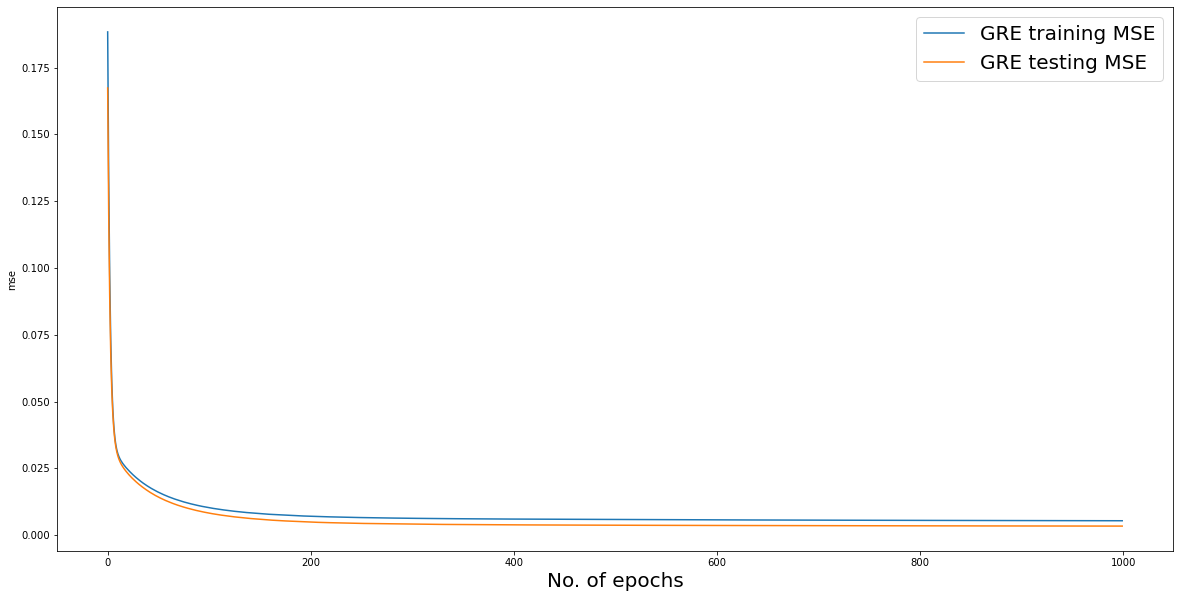

LEAST MSE WHEN TOEFL REMOVED : 0.004613654222339392


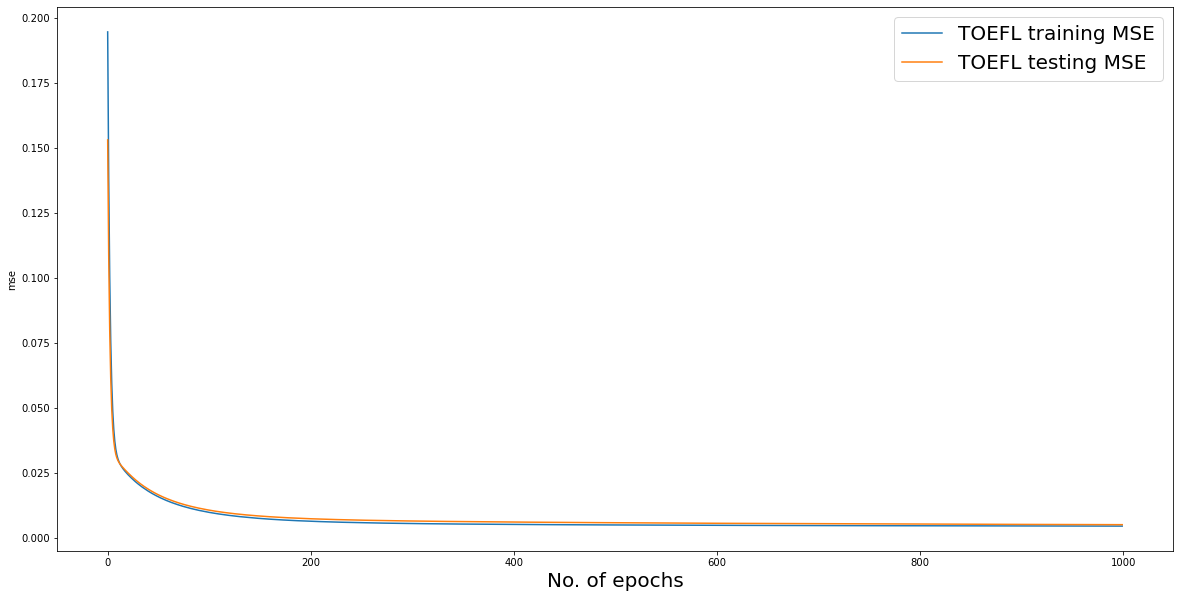

LEAST MSE WHEN Uni Rating REMOVED : 0.004757242742925882


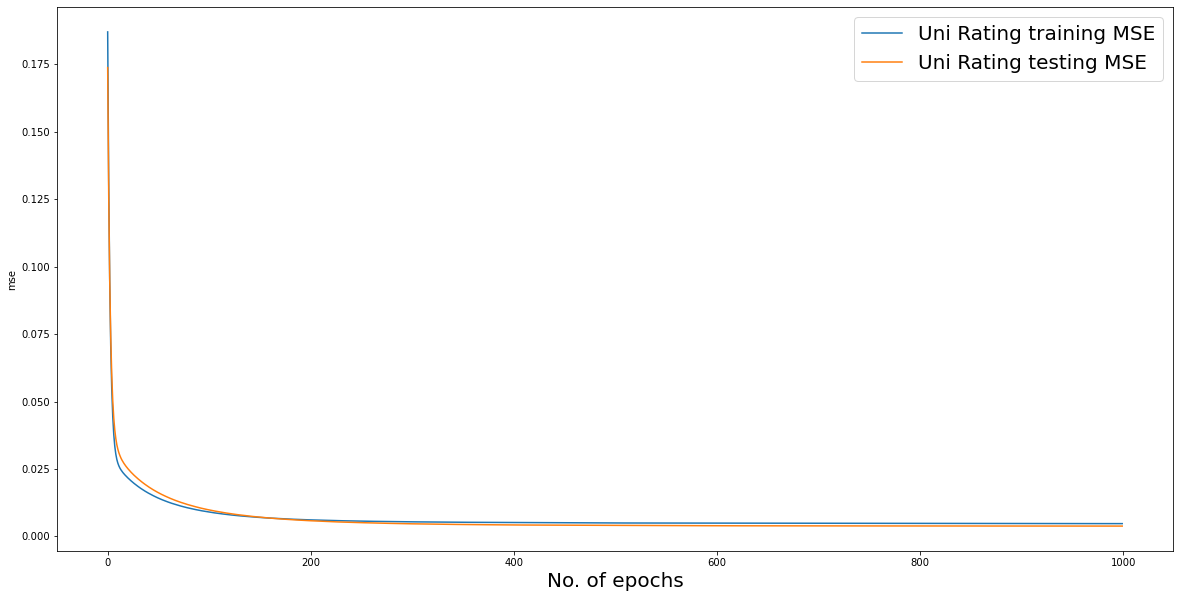

LEAST MSE WHEN SOP REMOVED : 0.004390146117657423


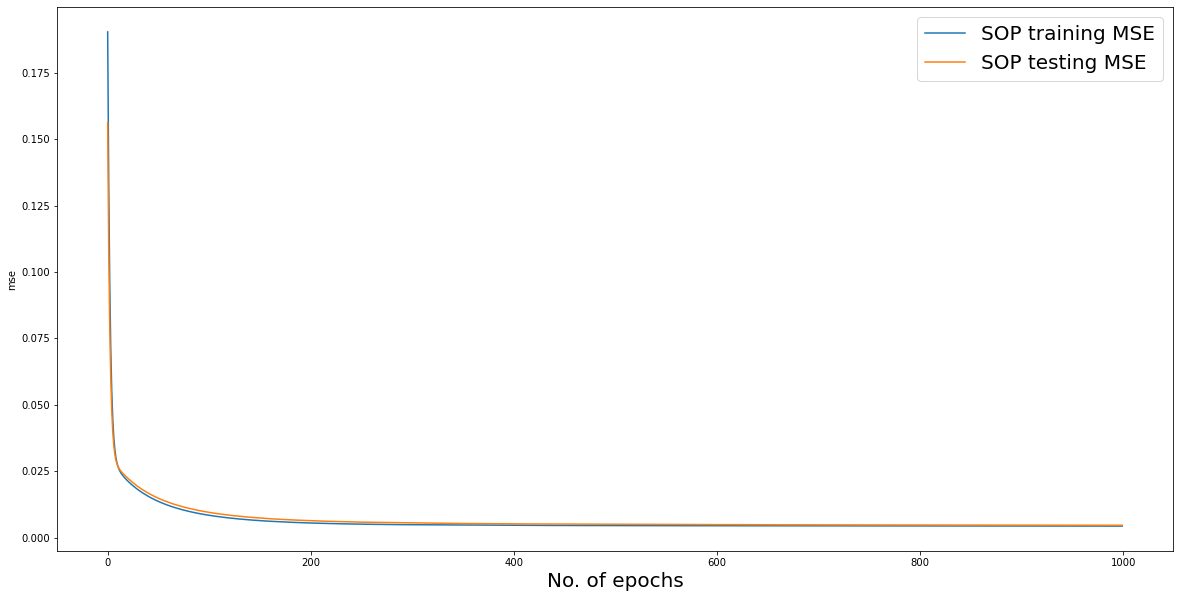

LEAST MSE WHEN LOR REMOVED : 0.004385147709399462


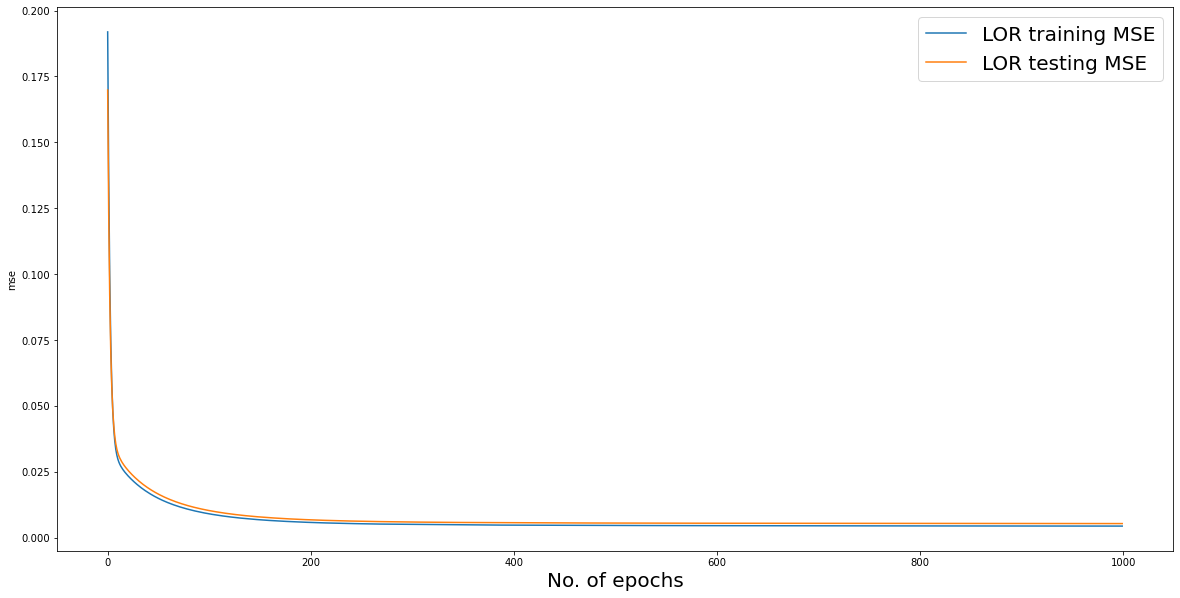

LEAST MSE WHEN CGPA REMOVED : 0.004927257541567087


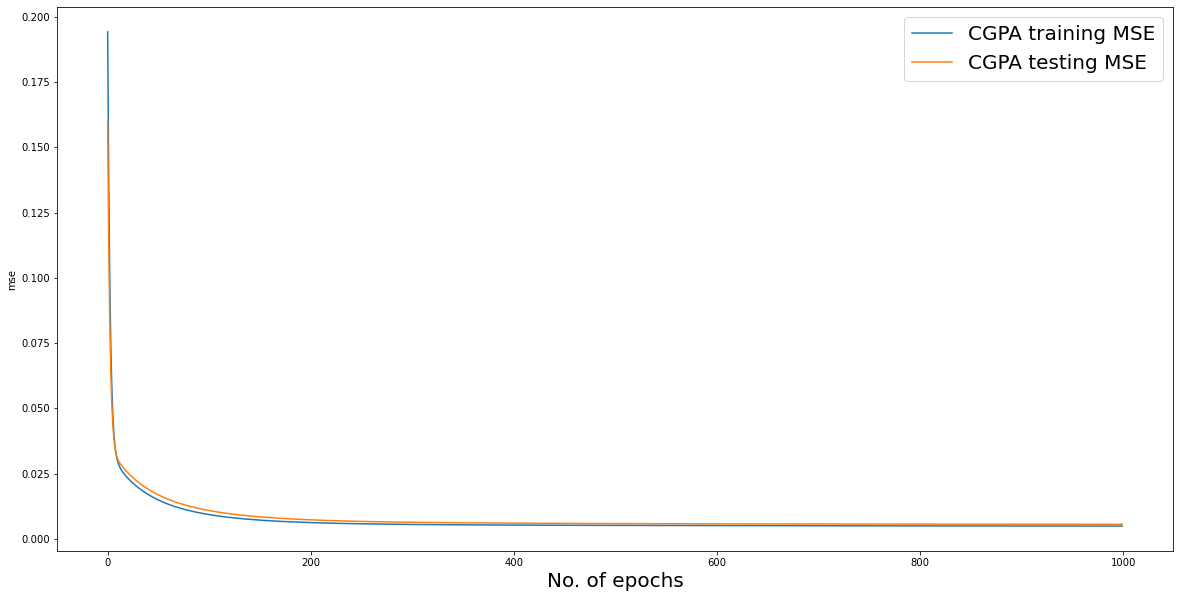

LEAST MSE WHEN Research REMOVED : 0.004139978438615799


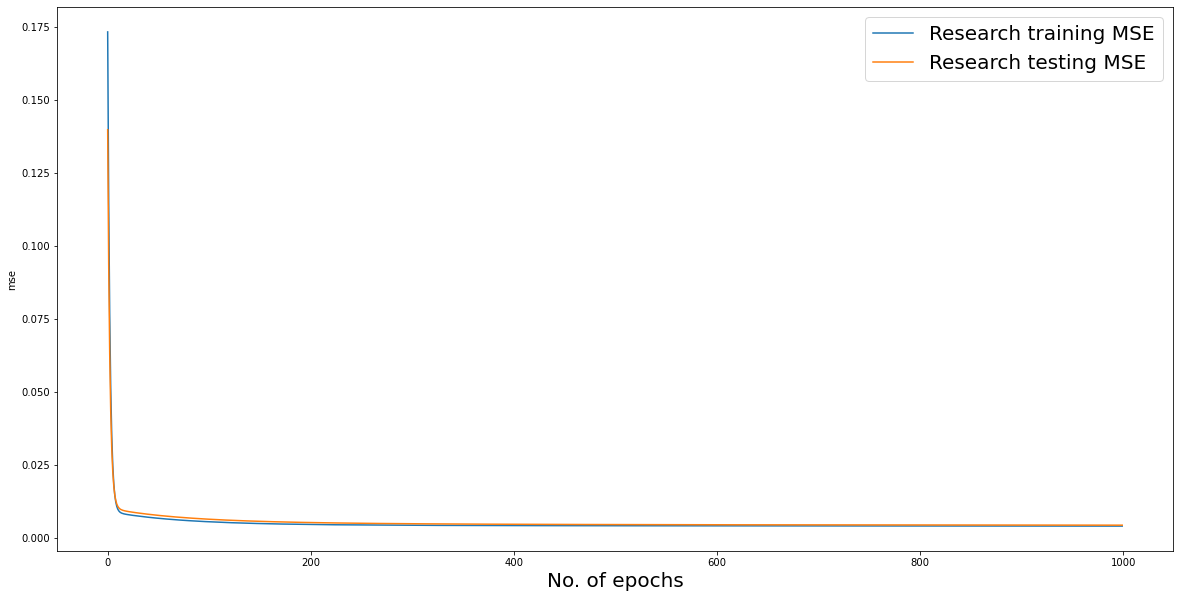

In [25]:
for i in historyDict:
    print(f"LEAST MSE WHEN {feature_map_7[i]} REMOVED : {min(historyDict[i].history['mse'])}") #EPOCHS-1
    plot_model(historyDict[i], LABELX = f"{feature_map_7[i]} training MSE", LABELY = f"{feature_map_7[i]} testing MSE" )

### Plotting the train MSE's of different features on the same plot


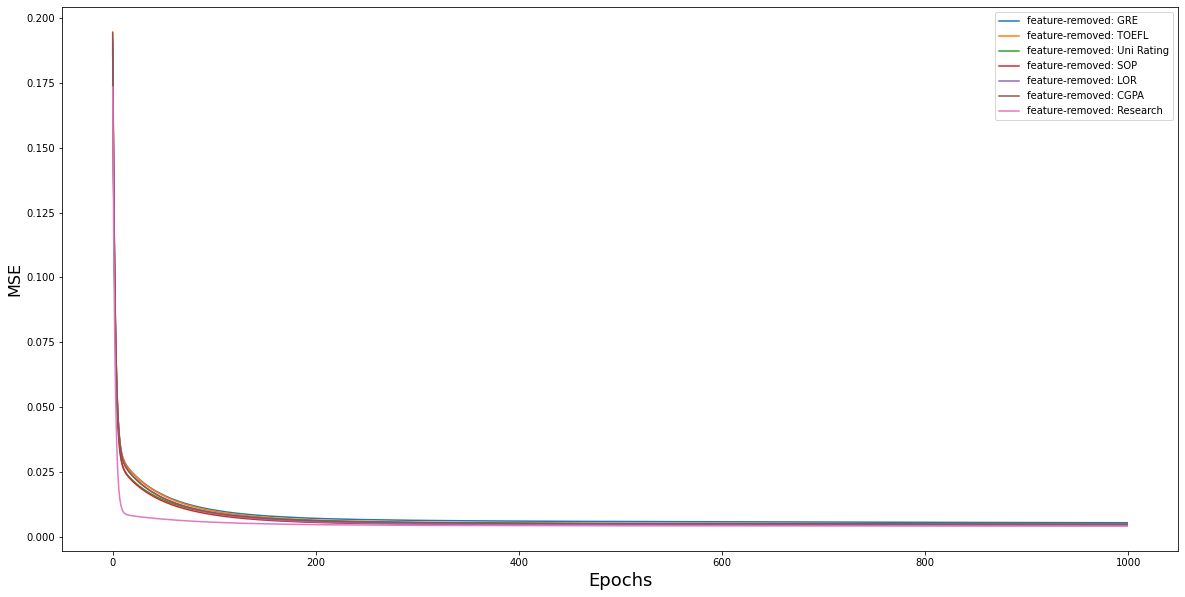

In [26]:
plt.figure(figsize=(20,10))
for feature_removed in historyDict:
    plt.plot(historyDict[feature_removed].history['mse'], label=f"feature-removed: {feature_map_7[feature_removed]}")

plt.xlabel('Epochs', fontsize=18)
plt.ylabel('MSE', fontsize=16)
plt.legend()
plt.show()

From the figure and code above, it can be concluded that removing Research gives us the least MSE (0.00414), i.e, the most accurate model. As it was stated before, research has a fairly low correlation with the chances of admission, and thus it has the highest chances to be removed. 

Thus, we remove Research from the feature set and continue with Level 2 RFE

## RFE LEVEL 2 - FOR 6 FEATURES

In [29]:
# Loading the data
data = np.genfromtxt('admission_predict.csv', delimiter= ',')
data = data[1:] # Remove nan row
X = data[:, 1:8] 
y = data[:,-1]

X = np.delete(X, 0, 1) #removing Research feature

In [30]:
timingDict2 = {}
historyDict2 = {}
mseDict2 = {}
feature_map_6 = {
    0 : 'GRE',
    1 : 'TOEFL',
    2 : 'Uni Rating',
    3 : 'SOP',
    4 : 'LOR',
    5 : 'CGPA', 
}

EPOCHS = 1000

for i in range(6):
    rfc_model = Sequential([
    Dense(units=10, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(units = 1, activation='linear')
    ])
    
    print(f"\n--- TRAINING RFC-6 WITHOUT FEATURE: {feature_map_6[i]} --- \n")
    tempX = np.delete(X, i, 1) #get X2 by removing column i
    currentHistory, currentTiming = train_model(currentModel = rfc_model, currentX = tempX, currenty = y, SEED_VALUE = 1, EPOCHS = EPOCHS)
    timingDict2[i]=currentTiming
    historyDict2[i]=currentHistory
    mseDict2[i]=min(currentHistory.history['mse'])
    
print(timingDict2)
print(historyDict2)
print(mseDict2)


--- TRAINING RFC-6 WITHOUT FEATURE: GRE --- 

Train on 280 samples, validate on 120 samples
Epoch 1/1000
280/280 - 0s - loss: 0.3163 - mse: 0.3111 - val_loss: 0.2503 - val_mse: 0.2450
Epoch 2/1000
280/280 - 0s - loss: 0.2172 - mse: 0.2120 - val_loss: 0.1716 - val_mse: 0.1663
Epoch 3/1000
280/280 - 0s - loss: 0.1493 - mse: 0.1440 - val_loss: 0.1181 - val_mse: 0.1128
Epoch 4/1000
280/280 - 0s - loss: 0.1033 - mse: 0.0980 - val_loss: 0.0823 - val_mse: 0.0770
Epoch 5/1000
280/280 - 0s - loss: 0.0726 - mse: 0.0673 - val_loss: 0.0587 - val_mse: 0.0534
Epoch 6/1000
280/280 - 0s - loss: 0.0524 - mse: 0.0471 - val_loss: 0.0433 - val_mse: 0.0379
Epoch 7/1000
280/280 - 0s - loss: 0.0392 - mse: 0.0338 - val_loss: 0.0333 - val_mse: 0.0280
Epoch 8/1000
280/280 - 0s - loss: 0.0307 - mse: 0.0253 - val_loss: 0.0271 - val_mse: 0.0217
Epoch 9/1000
280/280 - 0s - loss: 0.0252 - mse: 0.0199 - val_loss: 0.0231 - val_mse: 0.0178
Epoch 10/1000
280/280 - 0s - loss: 0.0218 - mse: 0.0164 - val_loss: 0.0206 - va

Epoch 89/1000
280/280 - 0s - loss: 0.0129 - mse: 0.0076 - val_loss: 0.0136 - val_mse: 0.0084
Epoch 90/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0076 - val_loss: 0.0136 - val_mse: 0.0083
Epoch 91/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0076 - val_loss: 0.0136 - val_mse: 0.0083
Epoch 92/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0076 - val_loss: 0.0135 - val_mse: 0.0083
Epoch 93/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0075 - val_loss: 0.0135 - val_mse: 0.0083
Epoch 94/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0075 - val_loss: 0.0135 - val_mse: 0.0083
Epoch 95/1000
280/280 - 0s - loss: 0.0127 - mse: 0.0075 - val_loss: 0.0135 - val_mse: 0.0082
Epoch 96/1000
280/280 - 0s - loss: 0.0127 - mse: 0.0075 - val_loss: 0.0135 - val_mse: 0.0082
Epoch 97/1000
280/280 - 0s - loss: 0.0127 - mse: 0.0075 - val_loss: 0.0134 - val_mse: 0.0082
Epoch 98/1000
280/280 - 0s - loss: 0.0127 - mse: 0.0075 - val_loss: 0.0134 - val_mse: 0.0082
Epoch 99/1000
280/280 - 0s - loss: 0.0127 - mse: 0.0074 - val_loss: 0.

Epoch 177/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0066 - val_loss: 0.0124 - val_mse: 0.0072
Epoch 178/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0066 - val_loss: 0.0124 - val_mse: 0.0072
Epoch 179/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0066 - val_loss: 0.0124 - val_mse: 0.0072
Epoch 180/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0066 - val_loss: 0.0124 - val_mse: 0.0072
Epoch 181/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0066 - val_loss: 0.0124 - val_mse: 0.0072
Epoch 182/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0066 - val_loss: 0.0124 - val_mse: 0.0072
Epoch 183/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0124 - val_mse: 0.0072
Epoch 184/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0124 - val_mse: 0.0072
Epoch 185/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0123 - val_mse: 0.0072
Epoch 186/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0123 - val_mse: 0.0072
Epoch 187/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0066 - v

Epoch 265/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0119 - val_mse: 0.0068
Epoch 266/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0119 - val_mse: 0.0068
Epoch 267/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0119 - val_mse: 0.0068
Epoch 268/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0119 - val_mse: 0.0068
Epoch 269/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0119 - val_mse: 0.0068
Epoch 270/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 271/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 272/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0118 - val_mse: 0.0068
Epoch 273/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0118 - val_mse: 0.0067
Epoch 274/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0062 - val_loss: 0.0118 - val_mse: 0.0067
Epoch 275/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0062 - v

280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0115 - val_mse: 0.0065
Epoch 353/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0115 - val_mse: 0.0065
Epoch 354/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0115 - val_mse: 0.0065
Epoch 355/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0115 - val_mse: 0.0065
Epoch 356/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0115 - val_mse: 0.0065
Epoch 357/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0115 - val_mse: 0.0065
Epoch 358/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0115 - val_mse: 0.0065
Epoch 359/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0115 - val_mse: 0.0065
Epoch 360/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0060 - val_loss: 0.0115 - val_mse: 0.0065
Epoch 361/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0060 - val_loss: 0.0115 - val_mse: 0.0065
Epoch 362/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0060 - val_loss: 0.0115

Epoch 440/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0059 - val_loss: 0.0113 - val_mse: 0.0064
Epoch 441/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0059 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 442/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0059 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 443/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0059 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 444/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0059 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 445/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0059 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 446/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0059 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 447/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0059 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 448/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0059 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 449/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0059 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 450/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0059 - v

Epoch 528/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0058 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 529/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0058 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 530/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0058 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 531/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0058 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 532/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0058 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 533/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0058 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 534/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0058 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 535/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0058 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 536/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0058 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 537/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0058 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 538/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0058 - v

280/280 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 616/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 617/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 618/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 619/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 620/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 621/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 622/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 623/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 624/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 625/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0057 - val_loss: 0.0110

Epoch 703/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0061
Epoch 704/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0061
Epoch 705/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0061
Epoch 706/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0061
Epoch 707/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0061
Epoch 708/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0060
Epoch 709/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0061
Epoch 710/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0061
Epoch 711/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0061
Epoch 712/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0108 - val_mse: 0.0060
Epoch 713/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - v

280/280 - 0s - loss: 0.0103 - mse: 0.0056 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 791/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 792/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 793/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 794/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 795/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 796/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 797/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 798/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 799/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0055 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 800/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0055 - val_loss: 0.0107

Epoch 878/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0055 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 879/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0055 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 880/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0055 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 881/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0055 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 882/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0055 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 883/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0055 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 884/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0055 - val_loss: 0.0105 - val_mse: 0.0059
Epoch 885/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0055 - val_loss: 0.0105 - val_mse: 0.0059
Epoch 886/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0055 - val_loss: 0.0105 - val_mse: 0.0059
Epoch 887/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0055 - val_loss: 0.0105 - val_mse: 0.0059
Epoch 888/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0055 - v

280/280 - 0s - loss: 0.0100 - mse: 0.0054 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 966/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0054 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 967/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0054 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 968/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0054 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 969/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0054 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 970/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0054 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 971/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0054 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 972/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0054 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 973/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0054 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 974/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0054 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 975/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0054 - val_loss: 0.0104

Epoch 52/1000
280/280 - 0s - loss: 0.0141 - mse: 0.0088 - val_loss: 0.0140 - val_mse: 0.0087
Epoch 53/1000
280/280 - 0s - loss: 0.0141 - mse: 0.0088 - val_loss: 0.0140 - val_mse: 0.0087
Epoch 54/1000
280/280 - 0s - loss: 0.0140 - mse: 0.0088 - val_loss: 0.0139 - val_mse: 0.0086
Epoch 55/1000
280/280 - 0s - loss: 0.0140 - mse: 0.0087 - val_loss: 0.0139 - val_mse: 0.0086
Epoch 56/1000
280/280 - 0s - loss: 0.0140 - mse: 0.0087 - val_loss: 0.0139 - val_mse: 0.0086
Epoch 57/1000
280/280 - 0s - loss: 0.0139 - mse: 0.0087 - val_loss: 0.0138 - val_mse: 0.0085
Epoch 58/1000
280/280 - 0s - loss: 0.0139 - mse: 0.0086 - val_loss: 0.0138 - val_mse: 0.0085
Epoch 59/1000
280/280 - 0s - loss: 0.0139 - mse: 0.0086 - val_loss: 0.0138 - val_mse: 0.0085
Epoch 60/1000
280/280 - 0s - loss: 0.0138 - mse: 0.0086 - val_loss: 0.0137 - val_mse: 0.0084
Epoch 61/1000
280/280 - 0s - loss: 0.0138 - mse: 0.0085 - val_loss: 0.0137 - val_mse: 0.0084
Epoch 62/1000
280/280 - 0s - loss: 0.0138 - mse: 0.0085 - val_loss: 0.

Epoch 140/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0069 - val_loss: 0.0122 - val_mse: 0.0070
Epoch 141/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0069 - val_loss: 0.0122 - val_mse: 0.0070
Epoch 142/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0069 - val_loss: 0.0122 - val_mse: 0.0070
Epoch 143/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0069 - val_loss: 0.0122 - val_mse: 0.0070
Epoch 144/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0069 - val_loss: 0.0122 - val_mse: 0.0070
Epoch 145/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0069 - val_loss: 0.0122 - val_mse: 0.0070
Epoch 146/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0068 - val_loss: 0.0121 - val_mse: 0.0070
Epoch 147/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0068 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 148/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0068 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 149/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0068 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 150/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0068 - v

280/280 - 0s - loss: 0.0112 - mse: 0.0061 - val_loss: 0.0116 - val_mse: 0.0065
Epoch 228/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0061 - val_loss: 0.0116 - val_mse: 0.0065
Epoch 229/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0061 - val_loss: 0.0116 - val_mse: 0.0065
Epoch 230/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0061 - val_loss: 0.0116 - val_mse: 0.0065
Epoch 231/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0061 - val_loss: 0.0116 - val_mse: 0.0065
Epoch 232/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0061 - val_loss: 0.0116 - val_mse: 0.0065
Epoch 233/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0061 - val_loss: 0.0116 - val_mse: 0.0065
Epoch 234/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0061 - val_loss: 0.0116 - val_mse: 0.0065
Epoch 235/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0061 - val_loss: 0.0116 - val_mse: 0.0065
Epoch 236/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0061 - val_loss: 0.0116 - val_mse: 0.0064
Epoch 237/1000
280/280 - 0s - loss: 0.0112 - mse: 0.0061 - val_loss: 0.0115

Epoch 315/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 316/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 317/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 318/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 319/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 320/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 321/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 322/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 323/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 324/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0063
Epoch 325/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0057 - v

Epoch 403/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0055 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 404/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0055 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 405/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0055 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 406/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0055 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 407/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0055 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 408/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0055 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 409/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0055 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 410/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0055 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 411/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0055 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 412/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0055 - val_loss: 0.0111 - val_mse: 0.0062
Epoch 413/1000
280/280 - 0s - loss: 0.0105 - mse: 0.0055 - v

280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 491/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 492/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 493/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 494/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 495/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 496/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 497/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 498/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 499/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0110 - val_mse: 0.0061
Epoch 500/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0110

Epoch 578/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0053 - val_loss: 0.0109 - val_mse: 0.0060
Epoch 579/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0053 - val_loss: 0.0109 - val_mse: 0.0060
Epoch 580/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0053 - val_loss: 0.0109 - val_mse: 0.0060
Epoch 581/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0109 - val_mse: 0.0060
Epoch 582/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0109 - val_mse: 0.0060
Epoch 583/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0109 - val_mse: 0.0060
Epoch 584/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0109 - val_mse: 0.0060
Epoch 585/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0109 - val_mse: 0.0060
Epoch 586/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0109 - val_mse: 0.0060
Epoch 587/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0109 - val_mse: 0.0060
Epoch 588/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - v

280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 666/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 667/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 668/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 669/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 670/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 671/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 672/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 673/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 674/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0107 - val_mse: 0.0060
Epoch 675/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0107

Epoch 753/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 754/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 755/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 756/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 757/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 758/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 759/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 760/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 761/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0050 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 762/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0050 - val_loss: 0.0106 - val_mse: 0.0059
Epoch 763/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0050 - v

280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0105 - val_mse: 0.0059
Epoch 841/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0105 - val_mse: 0.0059
Epoch 842/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0105 - val_mse: 0.0059
Epoch 843/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0105 - val_mse: 0.0059
Epoch 844/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0105 - val_mse: 0.0059
Epoch 845/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0105 - val_mse: 0.0059
Epoch 846/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0105 - val_mse: 0.0059
Epoch 847/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0105 - val_mse: 0.0059
Epoch 848/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0105 - val_mse: 0.0059
Epoch 849/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0105 - val_mse: 0.0059
Epoch 850/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0105

Epoch 928/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0049 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 929/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0049 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 930/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0049 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 931/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0049 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 932/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0049 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 933/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0049 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 934/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0049 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 935/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0049 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 936/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0049 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 937/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0049 - val_loss: 0.0104 - val_mse: 0.0058
Epoch 938/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0049 - v

Epoch 15/1000
280/280 - 0s - loss: 0.0184 - mse: 0.0130 - val_loss: 0.0180 - val_mse: 0.0127
Epoch 16/1000
280/280 - 0s - loss: 0.0180 - mse: 0.0127 - val_loss: 0.0177 - val_mse: 0.0123
Epoch 17/1000
280/280 - 0s - loss: 0.0177 - mse: 0.0124 - val_loss: 0.0174 - val_mse: 0.0121
Epoch 18/1000
280/280 - 0s - loss: 0.0175 - mse: 0.0122 - val_loss: 0.0172 - val_mse: 0.0118
Epoch 19/1000
280/280 - 0s - loss: 0.0173 - mse: 0.0120 - val_loss: 0.0170 - val_mse: 0.0117
Epoch 20/1000
280/280 - 0s - loss: 0.0172 - mse: 0.0119 - val_loss: 0.0168 - val_mse: 0.0115
Epoch 21/1000
280/280 - 0s - loss: 0.0171 - mse: 0.0117 - val_loss: 0.0167 - val_mse: 0.0114
Epoch 22/1000
280/280 - 0s - loss: 0.0169 - mse: 0.0116 - val_loss: 0.0166 - val_mse: 0.0112
Epoch 23/1000
280/280 - 0s - loss: 0.0168 - mse: 0.0115 - val_loss: 0.0164 - val_mse: 0.0111
Epoch 24/1000
280/280 - 0s - loss: 0.0167 - mse: 0.0114 - val_loss: 0.0163 - val_mse: 0.0110
Epoch 25/1000
280/280 - 0s - loss: 0.0167 - mse: 0.0113 - val_loss: 0.

280/280 - 0s - loss: 0.0130 - mse: 0.0078 - val_loss: 0.0122 - val_mse: 0.0070
Epoch 104/1000
280/280 - 0s - loss: 0.0130 - mse: 0.0078 - val_loss: 0.0122 - val_mse: 0.0069
Epoch 105/1000
280/280 - 0s - loss: 0.0130 - mse: 0.0077 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 106/1000
280/280 - 0s - loss: 0.0129 - mse: 0.0077 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 107/1000
280/280 - 0s - loss: 0.0129 - mse: 0.0077 - val_loss: 0.0121 - val_mse: 0.0069
Epoch 108/1000
280/280 - 0s - loss: 0.0129 - mse: 0.0077 - val_loss: 0.0121 - val_mse: 0.0068
Epoch 109/1000
280/280 - 0s - loss: 0.0129 - mse: 0.0077 - val_loss: 0.0120 - val_mse: 0.0068
Epoch 110/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0076 - val_loss: 0.0120 - val_mse: 0.0068
Epoch 111/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0076 - val_loss: 0.0120 - val_mse: 0.0068
Epoch 112/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0076 - val_loss: 0.0120 - val_mse: 0.0068
Epoch 113/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0076 - val_loss: 0.0120

Epoch 191/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0065 - val_loss: 0.0109 - val_mse: 0.0057
Epoch 192/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0065 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 193/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0065 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 194/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0065 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 195/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0065 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 196/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0064 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 197/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0064 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 198/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0064 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 199/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0064 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 200/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0064 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 201/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0064 - v

280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 279/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 280/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0103 - val_mse: 0.0052
Epoch 281/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 282/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 283/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 284/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 285/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 286/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0059 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 287/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0059 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 288/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0059 - val_loss: 0.0102

Epoch 366/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0057 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 367/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 368/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 369/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 370/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 371/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0100 - val_mse: 0.0050
Epoch 372/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 373/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 374/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 375/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 376/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - v

280/280 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 454/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 455/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 456/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 457/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 458/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 459/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 460/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 461/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 462/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0049
Epoch 463/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0055 - val_loss: 0.0098

Epoch 541/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0048
Epoch 542/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0048
Epoch 543/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0048
Epoch 544/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0048
Epoch 545/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0048
Epoch 546/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0048
Epoch 547/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0048
Epoch 548/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 549/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 550/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0054 - val_loss: 0.0096 - val_mse: 0.0048
Epoch 551/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0054 - v

Epoch 629/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0048
Epoch 630/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0048
Epoch 631/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0048
Epoch 632/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0047
Epoch 633/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0047
Epoch 634/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0047
Epoch 635/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0047
Epoch 636/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0047
Epoch 637/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0047
Epoch 638/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0053 - val_loss: 0.0095 - val_mse: 0.0047
Epoch 639/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0053 - v

Epoch 717/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 718/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 719/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 720/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 721/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 722/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 723/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 724/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 725/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 726/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0047
Epoch 727/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0052 - v

280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0093 - val_mse: 0.0047
Epoch 805/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0093 - val_mse: 0.0047
Epoch 806/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0093 - val_mse: 0.0047
Epoch 807/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0093 - val_mse: 0.0047
Epoch 808/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0093 - val_mse: 0.0047
Epoch 809/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0093 - val_mse: 0.0047
Epoch 810/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0093 - val_mse: 0.0047
Epoch 811/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0093 - val_mse: 0.0047
Epoch 812/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0093 - val_mse: 0.0047
Epoch 813/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0093 - val_mse: 0.0047
Epoch 814/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0093

Epoch 892/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0051 - val_loss: 0.0092 - val_mse: 0.0046
Epoch 893/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0051 - val_loss: 0.0092 - val_mse: 0.0046
Epoch 894/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0051 - val_loss: 0.0092 - val_mse: 0.0046
Epoch 895/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0051 - val_loss: 0.0092 - val_mse: 0.0046
Epoch 896/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0051 - val_loss: 0.0092 - val_mse: 0.0046
Epoch 897/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0051 - val_loss: 0.0092 - val_mse: 0.0046
Epoch 898/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0051 - val_loss: 0.0092 - val_mse: 0.0046
Epoch 899/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0051 - val_loss: 0.0092 - val_mse: 0.0046
Epoch 900/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0051 - val_loss: 0.0092 - val_mse: 0.0046
Epoch 901/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0051 - val_loss: 0.0092 - val_mse: 0.0046
Epoch 902/1000
280/280 - 0s - loss: 0.0097 - mse: 0.0051 - v

280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0091 - val_mse: 0.0046
Epoch 980/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0091 - val_mse: 0.0046
Epoch 981/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0091 - val_mse: 0.0046
Epoch 982/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0091 - val_mse: 0.0046
Epoch 983/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0091 - val_mse: 0.0046
Epoch 984/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0091 - val_mse: 0.0046
Epoch 985/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0091 - val_mse: 0.0046
Epoch 986/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0091 - val_mse: 0.0046
Epoch 987/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0091 - val_mse: 0.0046
Epoch 988/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0091 - val_mse: 0.0046
Epoch 989/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0050 - val_loss: 0.0091

Epoch 66/1000
280/280 - 0s - loss: 0.0138 - mse: 0.0085 - val_loss: 0.0137 - val_mse: 0.0084
Epoch 67/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0085 - val_loss: 0.0136 - val_mse: 0.0084
Epoch 68/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0084 - val_loss: 0.0136 - val_mse: 0.0083
Epoch 69/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0084 - val_loss: 0.0136 - val_mse: 0.0083
Epoch 70/1000
280/280 - 0s - loss: 0.0136 - mse: 0.0084 - val_loss: 0.0135 - val_mse: 0.0083
Epoch 71/1000
280/280 - 0s - loss: 0.0136 - mse: 0.0084 - val_loss: 0.0135 - val_mse: 0.0082
Epoch 72/1000
280/280 - 0s - loss: 0.0136 - mse: 0.0083 - val_loss: 0.0135 - val_mse: 0.0082
Epoch 73/1000
280/280 - 0s - loss: 0.0136 - mse: 0.0083 - val_loss: 0.0134 - val_mse: 0.0082
Epoch 74/1000
280/280 - 0s - loss: 0.0135 - mse: 0.0083 - val_loss: 0.0134 - val_mse: 0.0081
Epoch 75/1000
280/280 - 0s - loss: 0.0135 - mse: 0.0083 - val_loss: 0.0133 - val_mse: 0.0081
Epoch 76/1000
280/280 - 0s - loss: 0.0135 - mse: 0.0082 - val_loss: 0.

Epoch 154/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0070 - val_loss: 0.0116 - val_mse: 0.0065
Epoch 155/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0070 - val_loss: 0.0116 - val_mse: 0.0065
Epoch 156/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0070 - val_loss: 0.0116 - val_mse: 0.0064
Epoch 157/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0070 - val_loss: 0.0116 - val_mse: 0.0064
Epoch 158/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0069 - val_loss: 0.0116 - val_mse: 0.0064
Epoch 159/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0069 - val_loss: 0.0116 - val_mse: 0.0064
Epoch 160/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0069 - val_loss: 0.0116 - val_mse: 0.0064
Epoch 161/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0069 - val_loss: 0.0116 - val_mse: 0.0064
Epoch 162/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0069 - val_loss: 0.0115 - val_mse: 0.0064
Epoch 163/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0069 - val_loss: 0.0115 - val_mse: 0.0064
Epoch 164/1000
280/280 - 0s - loss: 0.0121 - mse: 0.0069 - v

Epoch 242/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0064 - val_loss: 0.0109 - val_mse: 0.0058
Epoch 243/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0064 - val_loss: 0.0109 - val_mse: 0.0058
Epoch 244/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0064 - val_loss: 0.0109 - val_mse: 0.0058
Epoch 245/1000
280/280 - 0s - loss: 0.0115 - mse: 0.0064 - val_loss: 0.0109 - val_mse: 0.0058
Epoch 246/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0064 - val_loss: 0.0109 - val_mse: 0.0058
Epoch 247/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0063 - val_loss: 0.0108 - val_mse: 0.0058
Epoch 248/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0063 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 249/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0063 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 250/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0063 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 251/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0063 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 252/1000
280/280 - 0s - loss: 0.0114 - mse: 0.0063 - v

280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0105 - val_mse: 0.0055
Epoch 330/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0105 - val_mse: 0.0055
Epoch 331/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0105 - val_mse: 0.0055
Epoch 332/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0105 - val_mse: 0.0055
Epoch 333/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0105 - val_mse: 0.0054
Epoch 334/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0105 - val_mse: 0.0054
Epoch 335/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0105 - val_mse: 0.0054
Epoch 336/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0060 - val_loss: 0.0105 - val_mse: 0.0054
Epoch 337/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0060 - val_loss: 0.0105 - val_mse: 0.0054
Epoch 338/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0060 - val_loss: 0.0105 - val_mse: 0.0054
Epoch 339/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0060 - val_loss: 0.0105

Epoch 417/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 418/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 419/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 420/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 421/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 422/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 423/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 424/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 425/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 426/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0058 - val_loss: 0.0102 - val_mse: 0.0053
Epoch 427/1000
280/280 - 0s - loss: 0.0108 - mse: 0.0058 - v

280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 505/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 506/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 507/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 508/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 509/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 510/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 511/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 512/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 513/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0101 - val_mse: 0.0052
Epoch 514/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0057 - val_loss: 0.0101

Epoch 592/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0099 - val_mse: 0.0051
Epoch 593/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0099 - val_mse: 0.0051
Epoch 594/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0099 - val_mse: 0.0051
Epoch 595/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0099 - val_mse: 0.0051
Epoch 596/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0099 - val_mse: 0.0051
Epoch 597/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0099 - val_mse: 0.0051
Epoch 598/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0099 - val_mse: 0.0051
Epoch 599/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0099 - val_mse: 0.0051
Epoch 600/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0099 - val_mse: 0.0051
Epoch 601/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - val_loss: 0.0099 - val_mse: 0.0051
Epoch 602/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0056 - v

280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0050
Epoch 680/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0050
Epoch 681/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0050
Epoch 682/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0050
Epoch 683/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0050
Epoch 684/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0050
Epoch 685/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0050
Epoch 686/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0050
Epoch 687/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0050
Epoch 688/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0055 - val_loss: 0.0098 - val_mse: 0.0050
Epoch 689/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0055 - val_loss: 0.0098

Epoch 767/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 768/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 769/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 770/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 771/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 772/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 773/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 774/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 775/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 776/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0054 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 777/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0054 - v

Epoch 855/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 856/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 857/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 858/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 859/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 860/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 861/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 862/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 863/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 864/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0053 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 865/1000
280/280 - 0s - loss: 0.0100 - mse: 0.0053 - v

280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 943/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 944/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 945/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 946/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 947/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 948/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 949/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 950/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 951/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 952/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0052 - val_loss: 0.0094

Epoch 29/1000
280/280 - 0s - loss: 0.0174 - mse: 0.0121 - val_loss: 0.0175 - val_mse: 0.0122
Epoch 30/1000
280/280 - 0s - loss: 0.0173 - mse: 0.0120 - val_loss: 0.0174 - val_mse: 0.0121
Epoch 31/1000
280/280 - 0s - loss: 0.0173 - mse: 0.0119 - val_loss: 0.0173 - val_mse: 0.0120
Epoch 32/1000
280/280 - 0s - loss: 0.0172 - mse: 0.0119 - val_loss: 0.0173 - val_mse: 0.0119
Epoch 33/1000
280/280 - 0s - loss: 0.0171 - mse: 0.0118 - val_loss: 0.0172 - val_mse: 0.0119
Epoch 34/1000
280/280 - 0s - loss: 0.0170 - mse: 0.0117 - val_loss: 0.0171 - val_mse: 0.0118
Epoch 35/1000
280/280 - 0s - loss: 0.0170 - mse: 0.0116 - val_loss: 0.0170 - val_mse: 0.0117
Epoch 36/1000
280/280 - 0s - loss: 0.0169 - mse: 0.0116 - val_loss: 0.0170 - val_mse: 0.0117
Epoch 37/1000
280/280 - 0s - loss: 0.0168 - mse: 0.0115 - val_loss: 0.0169 - val_mse: 0.0116
Epoch 38/1000
280/280 - 0s - loss: 0.0167 - mse: 0.0114 - val_loss: 0.0168 - val_mse: 0.0115
Epoch 39/1000
280/280 - 0s - loss: 0.0167 - mse: 0.0114 - val_loss: 0.

Epoch 117/1000
280/280 - 0s - loss: 0.0136 - mse: 0.0084 - val_loss: 0.0138 - val_mse: 0.0086
Epoch 118/1000
280/280 - 0s - loss: 0.0136 - mse: 0.0084 - val_loss: 0.0138 - val_mse: 0.0086
Epoch 119/1000
280/280 - 0s - loss: 0.0136 - mse: 0.0084 - val_loss: 0.0138 - val_mse: 0.0086
Epoch 120/1000
280/280 - 0s - loss: 0.0136 - mse: 0.0084 - val_loss: 0.0137 - val_mse: 0.0085
Epoch 121/1000
280/280 - 0s - loss: 0.0135 - mse: 0.0083 - val_loss: 0.0137 - val_mse: 0.0085
Epoch 122/1000
280/280 - 0s - loss: 0.0135 - mse: 0.0083 - val_loss: 0.0137 - val_mse: 0.0085
Epoch 123/1000
280/280 - 0s - loss: 0.0135 - mse: 0.0083 - val_loss: 0.0137 - val_mse: 0.0085
Epoch 124/1000
280/280 - 0s - loss: 0.0135 - mse: 0.0083 - val_loss: 0.0137 - val_mse: 0.0085
Epoch 125/1000
280/280 - 0s - loss: 0.0135 - mse: 0.0083 - val_loss: 0.0136 - val_mse: 0.0085
Epoch 126/1000
280/280 - 0s - loss: 0.0134 - mse: 0.0082 - val_loss: 0.0136 - val_mse: 0.0084
Epoch 127/1000
280/280 - 0s - loss: 0.0134 - mse: 0.0082 - v

280/280 - 0s - loss: 0.0123 - mse: 0.0072 - val_loss: 0.0127 - val_mse: 0.0076
Epoch 205/1000
280/280 - 0s - loss: 0.0123 - mse: 0.0072 - val_loss: 0.0127 - val_mse: 0.0076
Epoch 206/1000
280/280 - 0s - loss: 0.0123 - mse: 0.0072 - val_loss: 0.0127 - val_mse: 0.0076
Epoch 207/1000
280/280 - 0s - loss: 0.0123 - mse: 0.0072 - val_loss: 0.0127 - val_mse: 0.0076
Epoch 208/1000
280/280 - 0s - loss: 0.0123 - mse: 0.0072 - val_loss: 0.0127 - val_mse: 0.0076
Epoch 209/1000
280/280 - 0s - loss: 0.0123 - mse: 0.0072 - val_loss: 0.0127 - val_mse: 0.0075
Epoch 210/1000
280/280 - 0s - loss: 0.0123 - mse: 0.0071 - val_loss: 0.0126 - val_mse: 0.0075
Epoch 211/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0071 - val_loss: 0.0126 - val_mse: 0.0075
Epoch 212/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0071 - val_loss: 0.0126 - val_mse: 0.0075
Epoch 213/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0071 - val_loss: 0.0126 - val_mse: 0.0075
Epoch 214/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0071 - val_loss: 0.0126

Epoch 292/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0122 - val_mse: 0.0072
Epoch 293/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0122 - val_mse: 0.0072
Epoch 294/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0122 - val_mse: 0.0072
Epoch 295/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0122 - val_mse: 0.0072
Epoch 296/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0122 - val_mse: 0.0072
Epoch 297/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0122 - val_mse: 0.0072
Epoch 298/1000
280/280 - 0s - loss: 0.0117 - mse: 0.0066 - val_loss: 0.0122 - val_mse: 0.0072
Epoch 299/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0066 - val_loss: 0.0122 - val_mse: 0.0072
Epoch 300/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0066 - val_loss: 0.0122 - val_mse: 0.0072
Epoch 301/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0066 - val_loss: 0.0122 - val_mse: 0.0072
Epoch 302/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0066 - v

Epoch 380/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0063 - val_loss: 0.0120 - val_mse: 0.0070
Epoch 381/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0063 - val_loss: 0.0120 - val_mse: 0.0070
Epoch 382/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0063 - val_loss: 0.0120 - val_mse: 0.0070
Epoch 383/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0063 - val_loss: 0.0120 - val_mse: 0.0070
Epoch 384/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0063 - val_loss: 0.0120 - val_mse: 0.0070
Epoch 385/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0063 - val_loss: 0.0120 - val_mse: 0.0070
Epoch 386/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0063 - val_loss: 0.0120 - val_mse: 0.0070
Epoch 387/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0063 - val_loss: 0.0120 - val_mse: 0.0070
Epoch 388/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0063 - val_loss: 0.0120 - val_mse: 0.0070
Epoch 389/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0063 - val_loss: 0.0120 - val_mse: 0.0070
Epoch 390/1000
280/280 - 0s - loss: 0.0113 - mse: 0.0063 - v

Epoch 468/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0062 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 469/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0062 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 470/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0062 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 471/1000
280/280 - 0s - loss: 0.0111 - mse: 0.0062 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 472/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0061 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 473/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0061 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 474/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0061 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 475/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0061 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 476/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0061 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 477/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0061 - val_loss: 0.0119 - val_mse: 0.0070
Epoch 478/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0061 - v

280/280 - 0s - loss: 0.0109 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0069
Epoch 556/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0069
Epoch 557/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0069
Epoch 558/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0069
Epoch 559/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0069
Epoch 560/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0069
Epoch 561/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0069
Epoch 562/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0069
Epoch 563/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0069
Epoch 564/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0060 - val_loss: 0.0118 - val_mse: 0.0069
Epoch 565/1000
280/280 - 0s - loss: 0.0109 - mse: 0.0060 - val_loss: 0.0118

Epoch 643/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0059 - val_loss: 0.0117 - val_mse: 0.0069
Epoch 644/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0059 - val_loss: 0.0117 - val_mse: 0.0069
Epoch 645/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0059 - val_loss: 0.0117 - val_mse: 0.0069
Epoch 646/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0059 - val_loss: 0.0117 - val_mse: 0.0069
Epoch 647/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0059 - val_loss: 0.0117 - val_mse: 0.0069
Epoch 648/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0059 - val_loss: 0.0117 - val_mse: 0.0069
Epoch 649/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0059 - val_loss: 0.0117 - val_mse: 0.0069
Epoch 650/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0059 - val_loss: 0.0117 - val_mse: 0.0069
Epoch 651/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0059 - val_loss: 0.0117 - val_mse: 0.0069
Epoch 652/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0059 - val_loss: 0.0117 - val_mse: 0.0069
Epoch 653/1000
280/280 - 0s - loss: 0.0107 - mse: 0.0059 - v

280/280 - 0s - loss: 0.0106 - mse: 0.0058 - val_loss: 0.0116 - val_mse: 0.0068
Epoch 731/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0058 - val_loss: 0.0116 - val_mse: 0.0068
Epoch 732/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0058 - val_loss: 0.0116 - val_mse: 0.0068
Epoch 733/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0058 - val_loss: 0.0116 - val_mse: 0.0068
Epoch 734/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0058 - val_loss: 0.0116 - val_mse: 0.0068
Epoch 735/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0058 - val_loss: 0.0116 - val_mse: 0.0068
Epoch 736/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0058 - val_loss: 0.0116 - val_mse: 0.0068
Epoch 737/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0058 - val_loss: 0.0116 - val_mse: 0.0068
Epoch 738/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0058 - val_loss: 0.0116 - val_mse: 0.0068
Epoch 739/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0058 - val_loss: 0.0116 - val_mse: 0.0068
Epoch 740/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0058 - val_loss: 0.0116

Epoch 818/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0058 - val_loss: 0.0115 - val_mse: 0.0068
Epoch 819/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0058 - val_loss: 0.0115 - val_mse: 0.0068
Epoch 820/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0058 - val_loss: 0.0115 - val_mse: 0.0068
Epoch 821/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0058 - val_loss: 0.0115 - val_mse: 0.0068
Epoch 822/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0058 - val_loss: 0.0115 - val_mse: 0.0068
Epoch 823/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0058 - val_loss: 0.0115 - val_mse: 0.0068
Epoch 824/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0058 - val_loss: 0.0115 - val_mse: 0.0068
Epoch 825/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0058 - val_loss: 0.0115 - val_mse: 0.0068
Epoch 826/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0058 - val_loss: 0.0115 - val_mse: 0.0068
Epoch 827/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0058 - val_loss: 0.0115 - val_mse: 0.0068
Epoch 828/1000
280/280 - 0s - loss: 0.0104 - mse: 0.0058 - v

Epoch 906/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0057 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 907/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0057 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 908/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0057 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 909/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0057 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 910/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0057 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 911/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0057 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 912/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0057 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 913/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0057 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 914/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0057 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 915/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0057 - val_loss: 0.0114 - val_mse: 0.0068
Epoch 916/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0057 - v

Epoch 994/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0067
Epoch 995/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0067
Epoch 996/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0067
Epoch 997/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0067
Epoch 998/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0067
Epoch 999/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0067
Epoch 1000/1000
280/280 - 0s - loss: 0.0102 - mse: 0.0057 - val_loss: 0.0113 - val_mse: 0.0067

---TRAINING COMPLETE---


--- TRAINING RFC-6 WITHOUT FEATURE: CGPA --- 

Train on 280 samples, validate on 120 samples
Epoch 1/1000
280/280 - 0s - loss: 0.3235 - mse: 0.3182 - val_loss: 0.2667 - val_mse: 0.2615
Epoch 2/1000
280/280 - 0s - loss: 0.2285 - mse: 0.2232 - val_loss: 0.1852 - val_mse: 0.1799
Epoch 3/1000
280/280 - 0s - loss: 0.1

Epoch 81/1000
280/280 - 0s - loss: 0.0141 - mse: 0.0088 - val_loss: 0.0137 - val_mse: 0.0084
Epoch 82/1000
280/280 - 0s - loss: 0.0140 - mse: 0.0088 - val_loss: 0.0137 - val_mse: 0.0084
Epoch 83/1000
280/280 - 0s - loss: 0.0140 - mse: 0.0087 - val_loss: 0.0136 - val_mse: 0.0084
Epoch 84/1000
280/280 - 0s - loss: 0.0140 - mse: 0.0087 - val_loss: 0.0136 - val_mse: 0.0083
Epoch 85/1000
280/280 - 0s - loss: 0.0139 - mse: 0.0087 - val_loss: 0.0135 - val_mse: 0.0083
Epoch 86/1000
280/280 - 0s - loss: 0.0139 - mse: 0.0086 - val_loss: 0.0135 - val_mse: 0.0083
Epoch 87/1000
280/280 - 0s - loss: 0.0138 - mse: 0.0086 - val_loss: 0.0135 - val_mse: 0.0082
Epoch 88/1000
280/280 - 0s - loss: 0.0138 - mse: 0.0086 - val_loss: 0.0134 - val_mse: 0.0082
Epoch 89/1000
280/280 - 0s - loss: 0.0138 - mse: 0.0085 - val_loss: 0.0134 - val_mse: 0.0082
Epoch 90/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0085 - val_loss: 0.0134 - val_mse: 0.0081
Epoch 91/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0085 - val_loss: 0.

Epoch 169/1000
280/280 - 0s - loss: 0.0119 - mse: 0.0067 - val_loss: 0.0116 - val_mse: 0.0064
Epoch 170/1000
280/280 - 0s - loss: 0.0119 - mse: 0.0067 - val_loss: 0.0116 - val_mse: 0.0064
Epoch 171/1000
280/280 - 0s - loss: 0.0119 - mse: 0.0067 - val_loss: 0.0116 - val_mse: 0.0064
Epoch 172/1000
280/280 - 0s - loss: 0.0119 - mse: 0.0067 - val_loss: 0.0115 - val_mse: 0.0064
Epoch 173/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0067 - val_loss: 0.0115 - val_mse: 0.0064
Epoch 174/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0067 - val_loss: 0.0115 - val_mse: 0.0064
Epoch 175/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0067 - val_loss: 0.0115 - val_mse: 0.0064
Epoch 176/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0066 - val_loss: 0.0115 - val_mse: 0.0063
Epoch 177/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0066 - val_loss: 0.0115 - val_mse: 0.0063
Epoch 178/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0066 - val_loss: 0.0115 - val_mse: 0.0063
Epoch 179/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0066 - v

Epoch 257/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 258/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 259/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 260/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 261/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 262/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 263/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 264/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 265/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 266/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - val_loss: 0.0108 - val_mse: 0.0057
Epoch 267/1000
280/280 - 0s - loss: 0.0110 - mse: 0.0059 - v

280/280 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0054
Epoch 345/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0054
Epoch 346/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0054
Epoch 347/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0054
Epoch 348/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0054
Epoch 349/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0054
Epoch 350/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0054
Epoch 351/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0056 - val_loss: 0.0104 - val_mse: 0.0054
Epoch 352/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0055 - val_loss: 0.0104 - val_mse: 0.0054
Epoch 353/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0055 - val_loss: 0.0104 - val_mse: 0.0054
Epoch 354/1000
280/280 - 0s - loss: 0.0106 - mse: 0.0055 - val_loss: 0.0104

Epoch 432/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0053 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 433/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0053 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 434/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0053 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 435/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0053 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 436/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0053 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 437/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0053 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 438/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0053 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 439/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0053 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 440/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0053 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 441/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0053 - val_loss: 0.0102 - val_mse: 0.0052
Epoch 442/1000
280/280 - 0s - loss: 0.0103 - mse: 0.0053 - v

280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0100 - val_mse: 0.0051
Epoch 520/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0100 - val_mse: 0.0051
Epoch 521/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0100 - val_mse: 0.0051
Epoch 522/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0100 - val_mse: 0.0051
Epoch 523/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0100 - val_mse: 0.0051
Epoch 524/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0100 - val_mse: 0.0051
Epoch 525/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0100 - val_mse: 0.0051
Epoch 526/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0100 - val_mse: 0.0051
Epoch 527/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0100 - val_mse: 0.0051
Epoch 528/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0100 - val_mse: 0.0051
Epoch 529/1000
280/280 - 0s - loss: 0.0101 - mse: 0.0052 - val_loss: 0.0100

Epoch 607/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 608/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 609/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 610/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 611/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 612/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 613/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 614/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 615/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 616/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - val_loss: 0.0099 - val_mse: 0.0050
Epoch 617/1000
280/280 - 0s - loss: 0.0099 - mse: 0.0051 - v

Epoch 695/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 696/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 697/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 698/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 699/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 700/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 701/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 702/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 703/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 704/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - val_loss: 0.0097 - val_mse: 0.0050
Epoch 705/1000
280/280 - 0s - loss: 0.0098 - mse: 0.0050 - v

280/280 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 783/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 784/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 785/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 786/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 787/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 788/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 789/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 790/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 791/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0096 - val_mse: 0.0049
Epoch 792/1000
280/280 - 0s - loss: 0.0096 - mse: 0.0049 - val_loss: 0.0096

Epoch 870/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0048 - val_loss: 0.0095 - val_mse: 0.0049
Epoch 871/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0048 - val_loss: 0.0095 - val_mse: 0.0049
Epoch 872/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0048 - val_loss: 0.0095 - val_mse: 0.0049
Epoch 873/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0048 - val_loss: 0.0095 - val_mse: 0.0049
Epoch 874/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0048 - val_loss: 0.0095 - val_mse: 0.0049
Epoch 875/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0048 - val_loss: 0.0095 - val_mse: 0.0049
Epoch 876/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0048 - val_loss: 0.0095 - val_mse: 0.0049
Epoch 877/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0048 - val_loss: 0.0095 - val_mse: 0.0049
Epoch 878/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0048 - val_loss: 0.0095 - val_mse: 0.0049
Epoch 879/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0048 - val_loss: 0.0095 - val_mse: 0.0049
Epoch 880/1000
280/280 - 0s - loss: 0.0095 - mse: 0.0048 - v

280/280 - 0s - loss: 0.0094 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 958/1000
280/280 - 0s - loss: 0.0094 - mse: 0.0048 - val_loss: 0.0095 - val_mse: 0.0048
Epoch 959/1000
280/280 - 0s - loss: 0.0094 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 960/1000
280/280 - 0s - loss: 0.0094 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 961/1000
280/280 - 0s - loss: 0.0094 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 962/1000
280/280 - 0s - loss: 0.0094 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 963/1000
280/280 - 0s - loss: 0.0094 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 964/1000
280/280 - 0s - loss: 0.0094 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 965/1000
280/280 - 0s - loss: 0.0094 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 966/1000
280/280 - 0s - loss: 0.0094 - mse: 0.0048 - val_loss: 0.0094 - val_mse: 0.0048
Epoch 967/1000
280/280 - 0s - loss: 0.0094 - mse: 0.0048 - val_loss: 0.0094

### Finding the worst feature (the model that performs the best in the absence of this feature)

In [31]:
leastMSE2 = min(mseDict2, key=mseDict2.get)

print(f"Removal of {feature_map_6[leastMSE2]} gives the lowest MSE training-value of {mseDict2[leastMSE2]}")

Removal of CGPA gives the lowest MSE training-value of 0.004766311962157488


### Plotting the train and test MSE's of different features on different plots

LEAST MSE FOR GRE : 0.005395993124693632


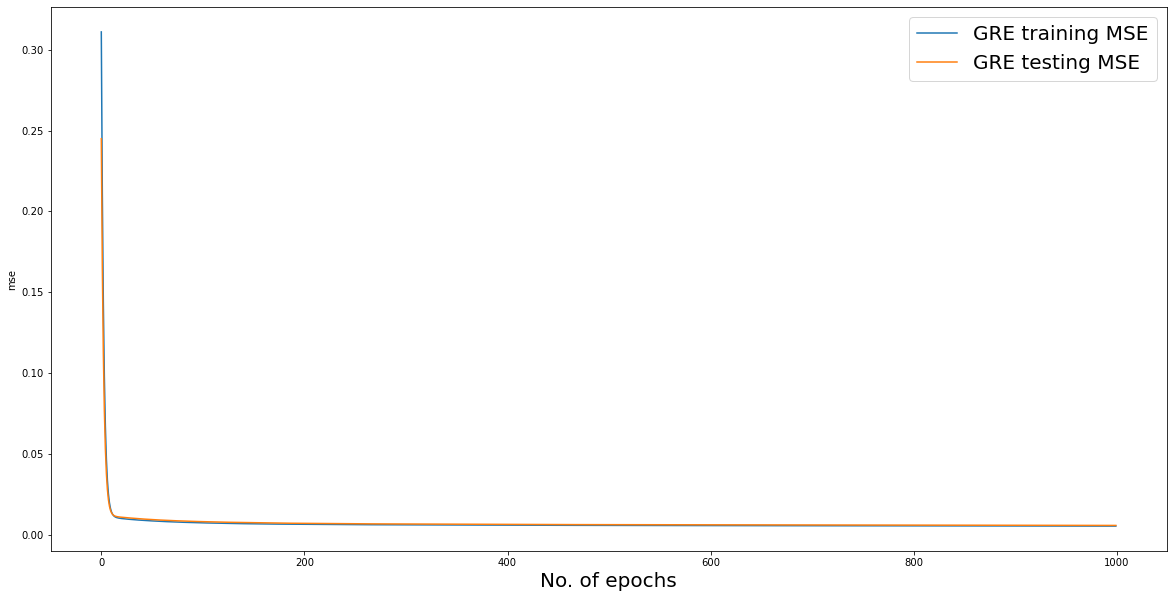

LEAST MSE FOR TOEFL : 0.00480832252651453


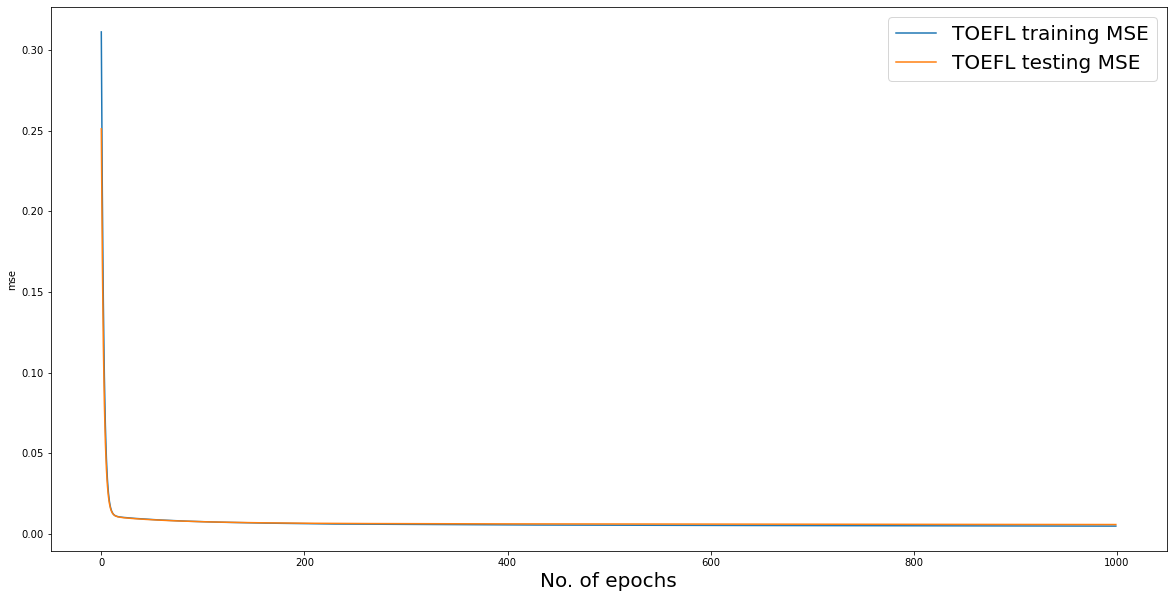

LEAST MSE FOR Uni Rating : 0.005016096867620945


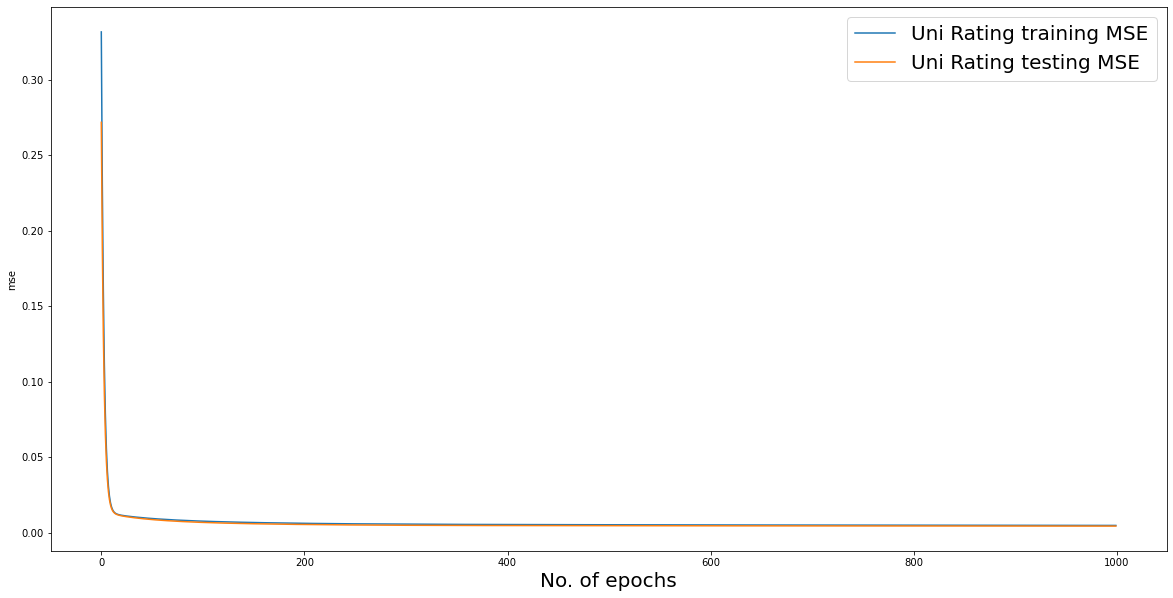

LEAST MSE FOR SOP : 0.005180479492992163


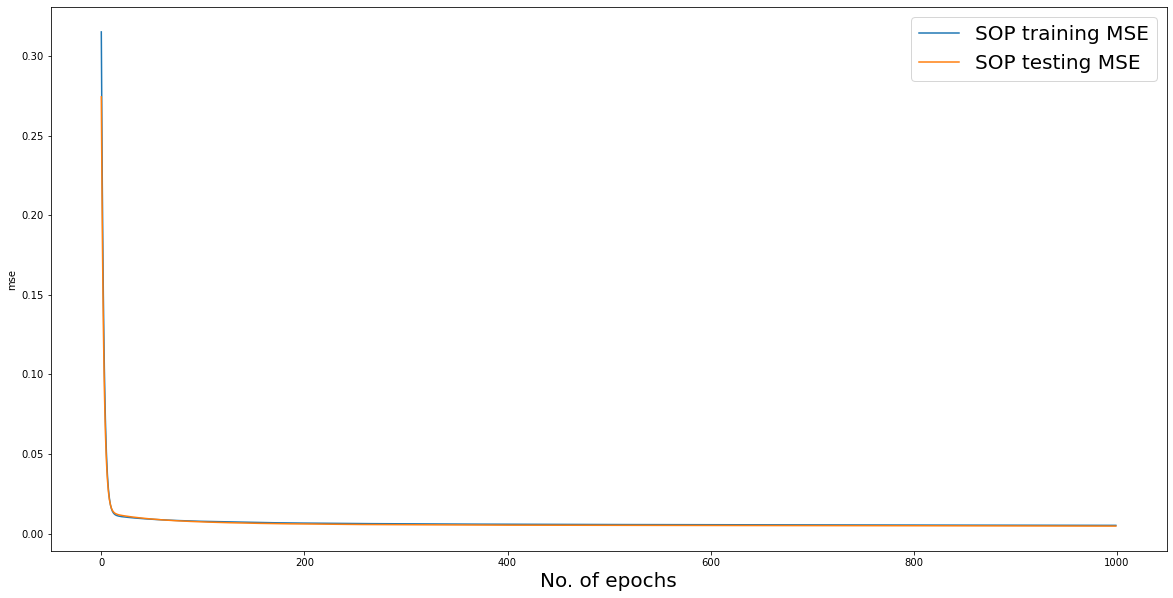

LEAST MSE FOR LOR : 0.00565772969275713


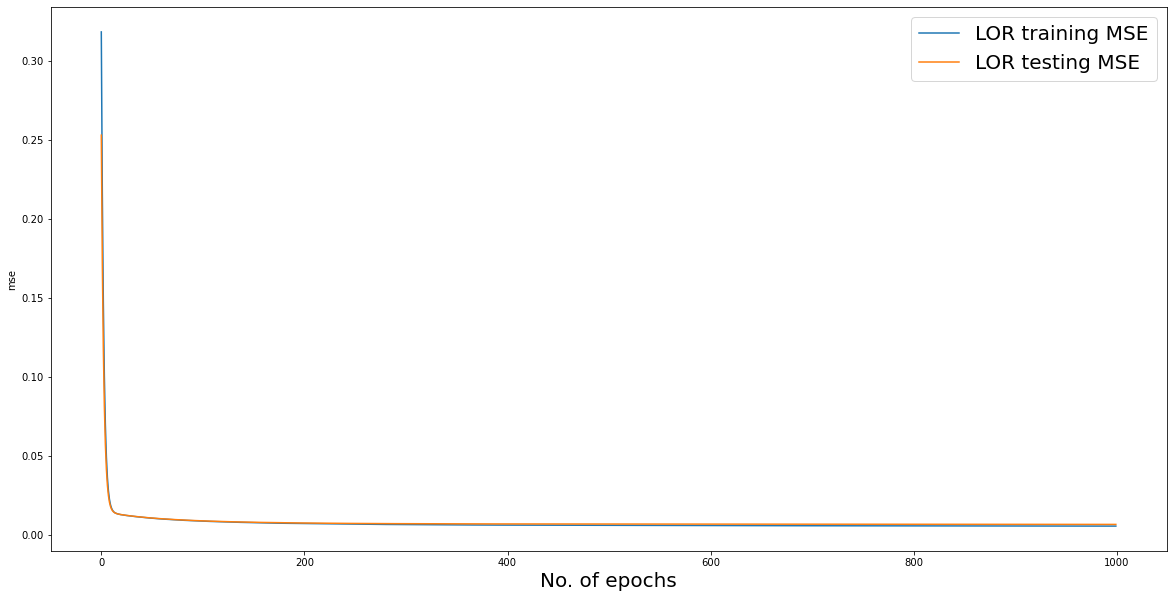

LEAST MSE FOR CGPA : 0.004766311962157488


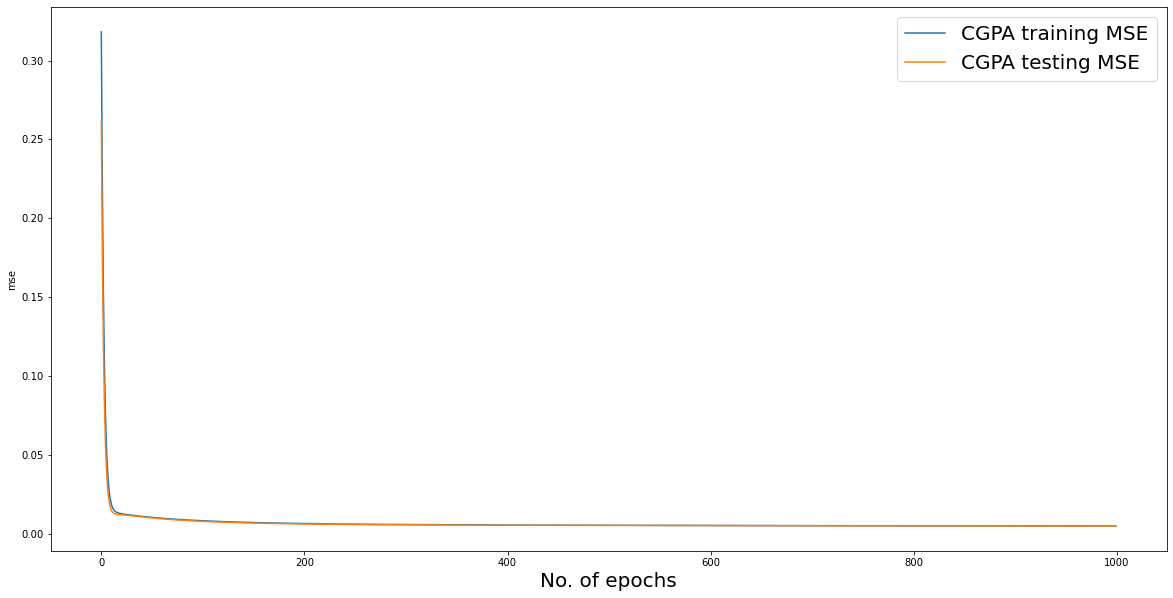

In [32]:
for i in historyDict2:
    print(f"LEAST MSE FOR {feature_map_6[i]} : {min(historyDict2[i].history['mse'])}") #EPOCHS-1
    plot_model(historyDict2[i], LABELX = f"{feature_map_6[i]} training MSE", LABELY = f"{feature_map_6[i]} testing MSE" )

### Plotting the train MSE's of different features on the same plot


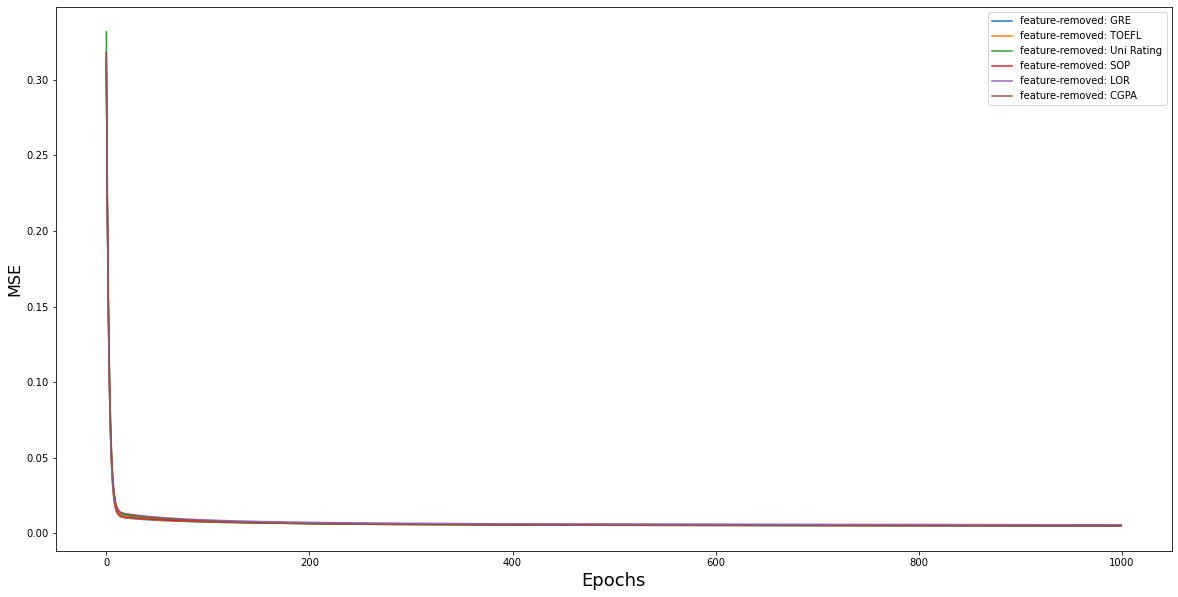

In [33]:
plt.figure(figsize=(20,10))
for feature_removed in historyDict2:
    plt.plot(historyDict2[feature_removed].history['mse'], label=f"feature-removed: {feature_map_6[feature_removed]}")

plt.xlabel('Epochs', fontsize=18)
plt.ylabel('MSE', fontsize=16)
plt.legend()
plt.show()

From the figure and code above, it is clear that removing CGPA gives us the least MSE (0.0047), i.e, the most accurate model. 

Thus, at the second level RFE, we remove CGPA from our feature set and continue.

Now that we have completed the RFE, we can compare the performances of the model with 5,6 and 7 features. This comparison will be done final MSE reached by the training dataset.

First, we need to train the 7-feature model with the same seed value, in order to obtain MSE and time values for comparison.

In [34]:
#BUILDING THE 7-FEATURE MODEL

data = np.genfromtxt('admission_predict.csv', delimiter= ',')
data = data[1:] # Remove nan row
X = data[:, 1:8] 
y = data[:,-1]

EPOCHS = 1000

model_7 = Sequential([
Dense(units=10, activation='relu', kernel_regularizer=l2(0.001)),
Dense(units = 1, activation='linear')
])

history_7, timing_7 = train_model(currentModel = model_7, currentX = X, currenty = y, SEED_VALUE = 10, EPOCHS = EPOCHS)
print(history_7)
print(timing_7)
print(min(history_7.history["mse"]))

Train on 280 samples, validate on 120 samples
Epoch 1/1000
280/280 - 0s - loss: 0.0598 - mse: 0.0511 - val_loss: 0.0537 - val_mse: 0.0450
Epoch 2/1000
280/280 - 0s - loss: 0.0432 - mse: 0.0344 - val_loss: 0.0439 - val_mse: 0.0351
Epoch 3/1000
280/280 - 0s - loss: 0.0378 - mse: 0.0290 - val_loss: 0.0402 - val_mse: 0.0314
Epoch 4/1000
280/280 - 0s - loss: 0.0358 - mse: 0.0270 - val_loss: 0.0385 - val_mse: 0.0298
Epoch 5/1000
280/280 - 0s - loss: 0.0349 - mse: 0.0262 - val_loss: 0.0378 - val_mse: 0.0291
Epoch 6/1000
280/280 - 0s - loss: 0.0345 - mse: 0.0257 - val_loss: 0.0372 - val_mse: 0.0285
Epoch 7/1000
280/280 - 0s - loss: 0.0341 - mse: 0.0253 - val_loss: 0.0368 - val_mse: 0.0280
Epoch 8/1000
280/280 - 0s - loss: 0.0337 - mse: 0.0250 - val_loss: 0.0364 - val_mse: 0.0277
Epoch 9/1000
280/280 - 0s - loss: 0.0334 - mse: 0.0246 - val_loss: 0.0360 - val_mse: 0.0273
Epoch 10/1000
280/280 - 0s - loss: 0.0330 - mse: 0.0243 - val_loss: 0.0357 - val_mse: 0.0269
Epoch 11/1000
280/280 - 0s - loss

Epoch 89/1000
280/280 - 0s - loss: 0.0199 - mse: 0.0113 - val_loss: 0.0218 - val_mse: 0.0133
Epoch 90/1000
280/280 - 0s - loss: 0.0198 - mse: 0.0113 - val_loss: 0.0217 - val_mse: 0.0132
Epoch 91/1000
280/280 - 0s - loss: 0.0197 - mse: 0.0112 - val_loss: 0.0217 - val_mse: 0.0131
Epoch 92/1000
280/280 - 0s - loss: 0.0196 - mse: 0.0111 - val_loss: 0.0216 - val_mse: 0.0131
Epoch 93/1000
280/280 - 0s - loss: 0.0196 - mse: 0.0110 - val_loss: 0.0215 - val_mse: 0.0130
Epoch 94/1000
280/280 - 0s - loss: 0.0195 - mse: 0.0110 - val_loss: 0.0214 - val_mse: 0.0129
Epoch 95/1000
280/280 - 0s - loss: 0.0194 - mse: 0.0109 - val_loss: 0.0213 - val_mse: 0.0128
Epoch 96/1000
280/280 - 0s - loss: 0.0193 - mse: 0.0108 - val_loss: 0.0213 - val_mse: 0.0127
Epoch 97/1000
280/280 - 0s - loss: 0.0193 - mse: 0.0108 - val_loss: 0.0212 - val_mse: 0.0127
Epoch 98/1000
280/280 - 0s - loss: 0.0192 - mse: 0.0107 - val_loss: 0.0211 - val_mse: 0.0126
Epoch 99/1000
280/280 - 0s - loss: 0.0191 - mse: 0.0106 - val_loss: 0.

Epoch 177/1000
280/280 - 0s - loss: 0.0160 - mse: 0.0076 - val_loss: 0.0174 - val_mse: 0.0090
Epoch 178/1000
280/280 - 0s - loss: 0.0159 - mse: 0.0076 - val_loss: 0.0173 - val_mse: 0.0090
Epoch 179/1000
280/280 - 0s - loss: 0.0159 - mse: 0.0075 - val_loss: 0.0173 - val_mse: 0.0090
Epoch 180/1000
280/280 - 0s - loss: 0.0159 - mse: 0.0075 - val_loss: 0.0173 - val_mse: 0.0089
Epoch 181/1000
280/280 - 0s - loss: 0.0159 - mse: 0.0075 - val_loss: 0.0173 - val_mse: 0.0089
Epoch 182/1000
280/280 - 0s - loss: 0.0159 - mse: 0.0075 - val_loss: 0.0172 - val_mse: 0.0089
Epoch 183/1000
280/280 - 0s - loss: 0.0158 - mse: 0.0075 - val_loss: 0.0172 - val_mse: 0.0088
Epoch 184/1000
280/280 - 0s - loss: 0.0158 - mse: 0.0074 - val_loss: 0.0172 - val_mse: 0.0088
Epoch 185/1000
280/280 - 0s - loss: 0.0158 - mse: 0.0074 - val_loss: 0.0171 - val_mse: 0.0088
Epoch 186/1000
280/280 - 0s - loss: 0.0158 - mse: 0.0074 - val_loss: 0.0171 - val_mse: 0.0088
Epoch 187/1000
280/280 - 0s - loss: 0.0157 - mse: 0.0074 - v

Epoch 265/1000
280/280 - 0s - loss: 0.0145 - mse: 0.0063 - val_loss: 0.0156 - val_mse: 0.0073
Epoch 266/1000
280/280 - 0s - loss: 0.0145 - mse: 0.0063 - val_loss: 0.0156 - val_mse: 0.0073
Epoch 267/1000
280/280 - 0s - loss: 0.0145 - mse: 0.0063 - val_loss: 0.0155 - val_mse: 0.0073
Epoch 268/1000
280/280 - 0s - loss: 0.0145 - mse: 0.0063 - val_loss: 0.0155 - val_mse: 0.0073
Epoch 269/1000
280/280 - 0s - loss: 0.0145 - mse: 0.0062 - val_loss: 0.0155 - val_mse: 0.0073
Epoch 270/1000
280/280 - 0s - loss: 0.0145 - mse: 0.0062 - val_loss: 0.0155 - val_mse: 0.0073
Epoch 271/1000
280/280 - 0s - loss: 0.0145 - mse: 0.0062 - val_loss: 0.0155 - val_mse: 0.0073
Epoch 272/1000
280/280 - 0s - loss: 0.0144 - mse: 0.0062 - val_loss: 0.0155 - val_mse: 0.0072
Epoch 273/1000
280/280 - 0s - loss: 0.0144 - mse: 0.0062 - val_loss: 0.0155 - val_mse: 0.0072
Epoch 274/1000
280/280 - 0s - loss: 0.0144 - mse: 0.0062 - val_loss: 0.0154 - val_mse: 0.0072
Epoch 275/1000
280/280 - 0s - loss: 0.0144 - mse: 0.0062 - v

280/280 - 0s - loss: 0.0138 - mse: 0.0056 - val_loss: 0.0146 - val_mse: 0.0065
Epoch 353/1000
280/280 - 0s - loss: 0.0138 - mse: 0.0056 - val_loss: 0.0146 - val_mse: 0.0065
Epoch 354/1000
280/280 - 0s - loss: 0.0138 - mse: 0.0056 - val_loss: 0.0146 - val_mse: 0.0065
Epoch 355/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0056 - val_loss: 0.0146 - val_mse: 0.0065
Epoch 356/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0056 - val_loss: 0.0146 - val_mse: 0.0065
Epoch 357/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0056 - val_loss: 0.0146 - val_mse: 0.0065
Epoch 358/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0056 - val_loss: 0.0146 - val_mse: 0.0064
Epoch 359/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0056 - val_loss: 0.0146 - val_mse: 0.0064
Epoch 360/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0056 - val_loss: 0.0145 - val_mse: 0.0064
Epoch 361/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0056 - val_loss: 0.0145 - val_mse: 0.0064
Epoch 362/1000
280/280 - 0s - loss: 0.0137 - mse: 0.0056 - val_loss: 0.0145

Epoch 440/1000
280/280 - 0s - loss: 0.0133 - mse: 0.0052 - val_loss: 0.0140 - val_mse: 0.0060
Epoch 441/1000
280/280 - 0s - loss: 0.0133 - mse: 0.0052 - val_loss: 0.0140 - val_mse: 0.0060
Epoch 442/1000
280/280 - 0s - loss: 0.0132 - mse: 0.0052 - val_loss: 0.0140 - val_mse: 0.0060
Epoch 443/1000
280/280 - 0s - loss: 0.0132 - mse: 0.0052 - val_loss: 0.0140 - val_mse: 0.0060
Epoch 444/1000
280/280 - 0s - loss: 0.0132 - mse: 0.0052 - val_loss: 0.0140 - val_mse: 0.0060
Epoch 445/1000
280/280 - 0s - loss: 0.0132 - mse: 0.0052 - val_loss: 0.0140 - val_mse: 0.0059
Epoch 446/1000
280/280 - 0s - loss: 0.0132 - mse: 0.0052 - val_loss: 0.0140 - val_mse: 0.0059
Epoch 447/1000
280/280 - 0s - loss: 0.0132 - mse: 0.0052 - val_loss: 0.0139 - val_mse: 0.0059
Epoch 448/1000
280/280 - 0s - loss: 0.0132 - mse: 0.0052 - val_loss: 0.0139 - val_mse: 0.0059
Epoch 449/1000
280/280 - 0s - loss: 0.0132 - mse: 0.0052 - val_loss: 0.0139 - val_mse: 0.0059
Epoch 450/1000
280/280 - 0s - loss: 0.0132 - mse: 0.0052 - v

280/280 - 0s - loss: 0.0129 - mse: 0.0049 - val_loss: 0.0135 - val_mse: 0.0056
Epoch 528/1000
280/280 - 0s - loss: 0.0129 - mse: 0.0049 - val_loss: 0.0135 - val_mse: 0.0056
Epoch 529/1000
280/280 - 0s - loss: 0.0129 - mse: 0.0049 - val_loss: 0.0135 - val_mse: 0.0056
Epoch 530/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0049 - val_loss: 0.0135 - val_mse: 0.0056
Epoch 531/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0049 - val_loss: 0.0135 - val_mse: 0.0056
Epoch 532/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0049 - val_loss: 0.0135 - val_mse: 0.0056
Epoch 533/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0049 - val_loss: 0.0135 - val_mse: 0.0056
Epoch 534/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0049 - val_loss: 0.0135 - val_mse: 0.0056
Epoch 535/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0049 - val_loss: 0.0135 - val_mse: 0.0056
Epoch 536/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0049 - val_loss: 0.0135 - val_mse: 0.0056
Epoch 537/1000
280/280 - 0s - loss: 0.0128 - mse: 0.0049 - val_loss: 0.0135

Epoch 615/1000
280/280 - 0s - loss: 0.0125 - mse: 0.0047 - val_loss: 0.0132 - val_mse: 0.0053
Epoch 616/1000
280/280 - 0s - loss: 0.0125 - mse: 0.0047 - val_loss: 0.0131 - val_mse: 0.0053
Epoch 617/1000
280/280 - 0s - loss: 0.0125 - mse: 0.0047 - val_loss: 0.0131 - val_mse: 0.0053
Epoch 618/1000
280/280 - 0s - loss: 0.0125 - mse: 0.0047 - val_loss: 0.0131 - val_mse: 0.0053
Epoch 619/1000
280/280 - 0s - loss: 0.0125 - mse: 0.0047 - val_loss: 0.0131 - val_mse: 0.0053
Epoch 620/1000
280/280 - 0s - loss: 0.0125 - mse: 0.0047 - val_loss: 0.0131 - val_mse: 0.0053
Epoch 621/1000
280/280 - 0s - loss: 0.0125 - mse: 0.0047 - val_loss: 0.0131 - val_mse: 0.0053
Epoch 622/1000
280/280 - 0s - loss: 0.0125 - mse: 0.0047 - val_loss: 0.0131 - val_mse: 0.0053
Epoch 623/1000
280/280 - 0s - loss: 0.0125 - mse: 0.0047 - val_loss: 0.0131 - val_mse: 0.0053
Epoch 624/1000
280/280 - 0s - loss: 0.0125 - mse: 0.0047 - val_loss: 0.0131 - val_mse: 0.0053
Epoch 625/1000
280/280 - 0s - loss: 0.0125 - mse: 0.0047 - v

280/280 - 0s - loss: 0.0123 - mse: 0.0045 - val_loss: 0.0128 - val_mse: 0.0051
Epoch 703/1000
280/280 - 0s - loss: 0.0123 - mse: 0.0045 - val_loss: 0.0128 - val_mse: 0.0051
Epoch 704/1000
280/280 - 0s - loss: 0.0123 - mse: 0.0045 - val_loss: 0.0128 - val_mse: 0.0051
Epoch 705/1000
280/280 - 0s - loss: 0.0123 - mse: 0.0045 - val_loss: 0.0128 - val_mse: 0.0051
Epoch 706/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0045 - val_loss: 0.0128 - val_mse: 0.0051
Epoch 707/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0045 - val_loss: 0.0128 - val_mse: 0.0051
Epoch 708/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0045 - val_loss: 0.0128 - val_mse: 0.0051
Epoch 709/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0045 - val_loss: 0.0128 - val_mse: 0.0051
Epoch 710/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0045 - val_loss: 0.0128 - val_mse: 0.0051
Epoch 711/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0045 - val_loss: 0.0128 - val_mse: 0.0051
Epoch 712/1000
280/280 - 0s - loss: 0.0122 - mse: 0.0045 - val_loss: 0.0128

Epoch 790/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0044 - val_loss: 0.0126 - val_mse: 0.0050
Epoch 791/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0044 - val_loss: 0.0126 - val_mse: 0.0050
Epoch 792/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0044 - val_loss: 0.0126 - val_mse: 0.0050
Epoch 793/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0044 - val_loss: 0.0126 - val_mse: 0.0050
Epoch 794/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0044 - val_loss: 0.0126 - val_mse: 0.0050
Epoch 795/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0044 - val_loss: 0.0126 - val_mse: 0.0050
Epoch 796/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0044 - val_loss: 0.0126 - val_mse: 0.0050
Epoch 797/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0044 - val_loss: 0.0126 - val_mse: 0.0050
Epoch 798/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0044 - val_loss: 0.0126 - val_mse: 0.0050
Epoch 799/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0044 - val_loss: 0.0126 - val_mse: 0.0050
Epoch 800/1000
280/280 - 0s - loss: 0.0120 - mse: 0.0044 - v

Epoch 878/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0043 - val_loss: 0.0124 - val_mse: 0.0049
Epoch 879/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0043 - val_loss: 0.0124 - val_mse: 0.0049
Epoch 880/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0043 - val_loss: 0.0124 - val_mse: 0.0049
Epoch 881/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0043 - val_loss: 0.0124 - val_mse: 0.0049
Epoch 882/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0043 - val_loss: 0.0124 - val_mse: 0.0049
Epoch 883/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0043 - val_loss: 0.0124 - val_mse: 0.0049
Epoch 884/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0043 - val_loss: 0.0124 - val_mse: 0.0049
Epoch 885/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0043 - val_loss: 0.0124 - val_mse: 0.0049
Epoch 886/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0043 - val_loss: 0.0124 - val_mse: 0.0049
Epoch 887/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0042 - val_loss: 0.0124 - val_mse: 0.0049
Epoch 888/1000
280/280 - 0s - loss: 0.0118 - mse: 0.0043 - v

280/280 - 0s - loss: 0.0116 - mse: 0.0041 - val_loss: 0.0122 - val_mse: 0.0048
Epoch 966/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0041 - val_loss: 0.0122 - val_mse: 0.0048
Epoch 967/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0041 - val_loss: 0.0122 - val_mse: 0.0048
Epoch 968/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0041 - val_loss: 0.0122 - val_mse: 0.0048
Epoch 969/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0041 - val_loss: 0.0122 - val_mse: 0.0048
Epoch 970/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0041 - val_loss: 0.0122 - val_mse: 0.0048
Epoch 971/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0041 - val_loss: 0.0122 - val_mse: 0.0048
Epoch 972/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0041 - val_loss: 0.0122 - val_mse: 0.0048
Epoch 973/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0041 - val_loss: 0.0122 - val_mse: 0.0048
Epoch 974/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0041 - val_loss: 0.0122 - val_mse: 0.0048
Epoch 975/1000
280/280 - 0s - loss: 0.0116 - mse: 0.0041 - val_loss: 0.0122

### PLOTTING MSE'S FOR  MODELS WITH DIFFERENT FEATURE SIZES

[0.004766312, 0.0041399784, 0.004110174]


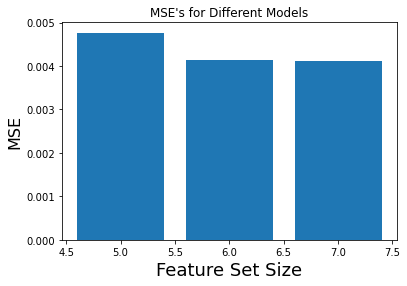

In [35]:
feature_set_sizes = [5,6,7]

mse_5 = mseDict2[leastMSE2]
mse_6 = mseDict[leastMSE]
mse_7 = min(history_7.history["mse"])

mse_list = [mse_5, mse_6, mse_7 ]
print(mse_list)

# creating the bar plot 
plt.bar(feature_set_sizes, mse_list) 
plt.xlabel('Feature Set Size', fontsize=18)
plt.ylabel('MSE', fontsize=16)
plt.title("MSE's for Different Models") 
plt.show() 

As we can see, as we are iterating over the model, and removing features, the training MSE is increasing. This could be attributed to the fact that even though some features have less correlation to output than others, still a correlation of 0.5 may hold some value, and removing those parameters may lead to loss of vaulable information.

# 3. Training a 4 and 5-layer neural network

Adding more layers to a neural network introduces more neurons which can compute more complex functions.

We will explore the effect of layer count on accuracy by comparing the previous 3 layer model and new 4 and 5 layer models with the following hyperparameters:

- 50 neurons in each hidden layer
- learning rate of 0.001 
- dropout layer with keep probability 0f 0.8


First we train the 4-layered model with no dropout layers, and then by inserting dropout layers between every dense layer and compare the performances of these models to find the best one. Then we do the same for 5-layered network, and then compare the best 4-layer and 5-layer dropout models with the original model. 

## Training the 4 layer neural network

In [42]:
EPOCHS=1000

# Loading the data
data = np.genfromtxt('admission_predict.csv', delimiter= ',')
data = data[1:] # Remove nan row
X, y = data[:, :8], data[:,-1] 

timingDict4 = {}
historyDict4 = {}
mseDict4 = {}

model4 = Sequential([
    Dense(units=50, activation='relu', kernel_regularizer=l2(L2_REGULARIZATION)),
    Dense(units=50, activation='relu', kernel_regularizer=l2(L2_REGULARIZATION)),
    Dense(units = 1, kernel_regularizer=l2(L2_REGULARIZATION))
    ])

history_4, timing_4 = train_model(currentModel = model4, currentX = X, currenty = y, SEED_VALUE = 1, EPOCHS = EPOCHS)
print(history_4)
print(timing_4)

Train on 280 samples, validate on 120 samples
Epoch 1/1000
280/280 - 0s - loss: 0.3499 - mse: 0.2847 - val_loss: 0.2576 - val_mse: 0.1924
Epoch 2/1000
280/280 - 0s - loss: 0.2203 - mse: 0.1551 - val_loss: 0.1671 - val_mse: 0.1019
Epoch 3/1000
280/280 - 0s - loss: 0.1516 - mse: 0.0864 - val_loss: 0.1221 - val_mse: 0.0569
Epoch 4/1000
280/280 - 0s - loss: 0.1167 - mse: 0.0515 - val_loss: 0.1007 - val_mse: 0.0355
Epoch 5/1000
280/280 - 0s - loss: 0.0994 - mse: 0.0342 - val_loss: 0.0911 - val_mse: 0.0259
Epoch 6/1000
280/280 - 0s - loss: 0.0911 - mse: 0.0258 - val_loss: 0.0869 - val_mse: 0.0217
Epoch 7/1000
280/280 - 0s - loss: 0.0869 - mse: 0.0216 - val_loss: 0.0851 - val_mse: 0.0199
Epoch 8/1000
280/280 - 0s - loss: 0.0846 - mse: 0.0194 - val_loss: 0.0842 - val_mse: 0.0190
Epoch 9/1000
280/280 - 0s - loss: 0.0833 - mse: 0.0181 - val_loss: 0.0838 - val_mse: 0.0185
Epoch 10/1000
280/280 - 0s - loss: 0.0825 - mse: 0.0173 - val_loss: 0.0834 - val_mse: 0.0182
Epoch 11/1000
280/280 - 0s - loss

Epoch 89/1000
280/280 - 0s - loss: 0.0711 - mse: 0.0067 - val_loss: 0.0724 - val_mse: 0.0080
Epoch 90/1000
280/280 - 0s - loss: 0.0710 - mse: 0.0067 - val_loss: 0.0724 - val_mse: 0.0080
Epoch 91/1000
280/280 - 0s - loss: 0.0710 - mse: 0.0066 - val_loss: 0.0724 - val_mse: 0.0080
Epoch 92/1000
280/280 - 0s - loss: 0.0710 - mse: 0.0066 - val_loss: 0.0723 - val_mse: 0.0080
Epoch 93/1000
280/280 - 0s - loss: 0.0709 - mse: 0.0066 - val_loss: 0.0723 - val_mse: 0.0079
Epoch 94/1000
280/280 - 0s - loss: 0.0709 - mse: 0.0065 - val_loss: 0.0722 - val_mse: 0.0079
Epoch 95/1000
280/280 - 0s - loss: 0.0709 - mse: 0.0065 - val_loss: 0.0722 - val_mse: 0.0079
Epoch 96/1000
280/280 - 0s - loss: 0.0708 - mse: 0.0065 - val_loss: 0.0722 - val_mse: 0.0078
Epoch 97/1000
280/280 - 0s - loss: 0.0708 - mse: 0.0065 - val_loss: 0.0721 - val_mse: 0.0078
Epoch 98/1000
280/280 - 0s - loss: 0.0708 - mse: 0.0064 - val_loss: 0.0721 - val_mse: 0.0078
Epoch 99/1000
280/280 - 0s - loss: 0.0707 - mse: 0.0064 - val_loss: 0.

Epoch 177/1000
280/280 - 0s - loss: 0.0687 - mse: 0.0051 - val_loss: 0.0699 - val_mse: 0.0063
Epoch 178/1000
280/280 - 0s - loss: 0.0687 - mse: 0.0051 - val_loss: 0.0699 - val_mse: 0.0063
Epoch 179/1000
280/280 - 0s - loss: 0.0687 - mse: 0.0051 - val_loss: 0.0698 - val_mse: 0.0063
Epoch 180/1000
280/280 - 0s - loss: 0.0687 - mse: 0.0051 - val_loss: 0.0698 - val_mse: 0.0063
Epoch 181/1000
280/280 - 0s - loss: 0.0686 - mse: 0.0051 - val_loss: 0.0698 - val_mse: 0.0063
Epoch 182/1000
280/280 - 0s - loss: 0.0686 - mse: 0.0051 - val_loss: 0.0698 - val_mse: 0.0062
Epoch 183/1000
280/280 - 0s - loss: 0.0686 - mse: 0.0051 - val_loss: 0.0698 - val_mse: 0.0062
Epoch 184/1000
280/280 - 0s - loss: 0.0686 - mse: 0.0051 - val_loss: 0.0697 - val_mse: 0.0062
Epoch 185/1000
280/280 - 0s - loss: 0.0686 - mse: 0.0050 - val_loss: 0.0697 - val_mse: 0.0062
Epoch 186/1000
280/280 - 0s - loss: 0.0685 - mse: 0.0050 - val_loss: 0.0697 - val_mse: 0.0062
Epoch 187/1000
280/280 - 0s - loss: 0.0685 - mse: 0.0050 - v

280/280 - 0s - loss: 0.0673 - mse: 0.0045 - val_loss: 0.0683 - val_mse: 0.0055
Epoch 265/1000
280/280 - 0s - loss: 0.0673 - mse: 0.0044 - val_loss: 0.0683 - val_mse: 0.0055
Epoch 266/1000
280/280 - 0s - loss: 0.0672 - mse: 0.0044 - val_loss: 0.0683 - val_mse: 0.0055
Epoch 267/1000
280/280 - 0s - loss: 0.0672 - mse: 0.0044 - val_loss: 0.0683 - val_mse: 0.0055
Epoch 268/1000
280/280 - 0s - loss: 0.0672 - mse: 0.0044 - val_loss: 0.0683 - val_mse: 0.0055
Epoch 269/1000
280/280 - 0s - loss: 0.0672 - mse: 0.0044 - val_loss: 0.0683 - val_mse: 0.0055
Epoch 270/1000
280/280 - 0s - loss: 0.0672 - mse: 0.0044 - val_loss: 0.0682 - val_mse: 0.0055
Epoch 271/1000
280/280 - 0s - loss: 0.0672 - mse: 0.0044 - val_loss: 0.0682 - val_mse: 0.0055
Epoch 272/1000
280/280 - 0s - loss: 0.0672 - mse: 0.0044 - val_loss: 0.0682 - val_mse: 0.0055
Epoch 273/1000
280/280 - 0s - loss: 0.0671 - mse: 0.0044 - val_loss: 0.0682 - val_mse: 0.0055
Epoch 274/1000
280/280 - 0s - loss: 0.0671 - mse: 0.0044 - val_loss: 0.0682

Epoch 352/1000
280/280 - 0s - loss: 0.0661 - mse: 0.0041 - val_loss: 0.0671 - val_mse: 0.0051
Epoch 353/1000
280/280 - 0s - loss: 0.0661 - mse: 0.0041 - val_loss: 0.0671 - val_mse: 0.0051
Epoch 354/1000
280/280 - 0s - loss: 0.0661 - mse: 0.0041 - val_loss: 0.0671 - val_mse: 0.0051
Epoch 355/1000
280/280 - 0s - loss: 0.0661 - mse: 0.0041 - val_loss: 0.0671 - val_mse: 0.0051
Epoch 356/1000
280/280 - 0s - loss: 0.0661 - mse: 0.0041 - val_loss: 0.0671 - val_mse: 0.0051
Epoch 357/1000
280/280 - 0s - loss: 0.0661 - mse: 0.0040 - val_loss: 0.0671 - val_mse: 0.0051
Epoch 358/1000
280/280 - 0s - loss: 0.0661 - mse: 0.0040 - val_loss: 0.0671 - val_mse: 0.0051
Epoch 359/1000
280/280 - 0s - loss: 0.0660 - mse: 0.0040 - val_loss: 0.0671 - val_mse: 0.0051
Epoch 360/1000
280/280 - 0s - loss: 0.0660 - mse: 0.0040 - val_loss: 0.0671 - val_mse: 0.0051
Epoch 361/1000
280/280 - 0s - loss: 0.0660 - mse: 0.0040 - val_loss: 0.0670 - val_mse: 0.0051
Epoch 362/1000
280/280 - 0s - loss: 0.0660 - mse: 0.0040 - v

280/280 - 0s - loss: 0.0651 - mse: 0.0038 - val_loss: 0.0662 - val_mse: 0.0048
Epoch 440/1000
280/280 - 0s - loss: 0.0651 - mse: 0.0038 - val_loss: 0.0661 - val_mse: 0.0048
Epoch 441/1000
280/280 - 0s - loss: 0.0651 - mse: 0.0038 - val_loss: 0.0661 - val_mse: 0.0048
Epoch 442/1000
280/280 - 0s - loss: 0.0651 - mse: 0.0038 - val_loss: 0.0661 - val_mse: 0.0048
Epoch 443/1000
280/280 - 0s - loss: 0.0651 - mse: 0.0038 - val_loss: 0.0661 - val_mse: 0.0048
Epoch 444/1000
280/280 - 0s - loss: 0.0651 - mse: 0.0038 - val_loss: 0.0661 - val_mse: 0.0048
Epoch 445/1000
280/280 - 0s - loss: 0.0651 - mse: 0.0038 - val_loss: 0.0661 - val_mse: 0.0048
Epoch 446/1000
280/280 - 0s - loss: 0.0651 - mse: 0.0038 - val_loss: 0.0661 - val_mse: 0.0048
Epoch 447/1000
280/280 - 0s - loss: 0.0651 - mse: 0.0038 - val_loss: 0.0661 - val_mse: 0.0048
Epoch 448/1000
280/280 - 0s - loss: 0.0650 - mse: 0.0038 - val_loss: 0.0661 - val_mse: 0.0048
Epoch 449/1000
280/280 - 0s - loss: 0.0650 - mse: 0.0038 - val_loss: 0.0661

Epoch 527/1000
280/280 - 0s - loss: 0.0642 - mse: 0.0037 - val_loss: 0.0653 - val_mse: 0.0047
Epoch 528/1000
280/280 - 0s - loss: 0.0642 - mse: 0.0037 - val_loss: 0.0653 - val_mse: 0.0047
Epoch 529/1000
280/280 - 0s - loss: 0.0642 - mse: 0.0036 - val_loss: 0.0652 - val_mse: 0.0047
Epoch 530/1000
280/280 - 0s - loss: 0.0642 - mse: 0.0036 - val_loss: 0.0652 - val_mse: 0.0047
Epoch 531/1000
280/280 - 0s - loss: 0.0642 - mse: 0.0036 - val_loss: 0.0652 - val_mse: 0.0047
Epoch 532/1000
280/280 - 0s - loss: 0.0642 - mse: 0.0036 - val_loss: 0.0652 - val_mse: 0.0047
Epoch 533/1000
280/280 - 0s - loss: 0.0642 - mse: 0.0036 - val_loss: 0.0652 - val_mse: 0.0047
Epoch 534/1000
280/280 - 0s - loss: 0.0642 - mse: 0.0036 - val_loss: 0.0652 - val_mse: 0.0047
Epoch 535/1000
280/280 - 0s - loss: 0.0642 - mse: 0.0036 - val_loss: 0.0652 - val_mse: 0.0047
Epoch 536/1000
280/280 - 0s - loss: 0.0642 - mse: 0.0036 - val_loss: 0.0652 - val_mse: 0.0047
Epoch 537/1000
280/280 - 0s - loss: 0.0641 - mse: 0.0036 - v

280/280 - 0s - loss: 0.0634 - mse: 0.0035 - val_loss: 0.0644 - val_mse: 0.0046
Epoch 615/1000
280/280 - 0s - loss: 0.0634 - mse: 0.0035 - val_loss: 0.0644 - val_mse: 0.0046
Epoch 616/1000
280/280 - 0s - loss: 0.0634 - mse: 0.0035 - val_loss: 0.0644 - val_mse: 0.0046
Epoch 617/1000
280/280 - 0s - loss: 0.0634 - mse: 0.0035 - val_loss: 0.0644 - val_mse: 0.0046
Epoch 618/1000
280/280 - 0s - loss: 0.0634 - mse: 0.0035 - val_loss: 0.0644 - val_mse: 0.0046
Epoch 619/1000
280/280 - 0s - loss: 0.0634 - mse: 0.0035 - val_loss: 0.0644 - val_mse: 0.0046
Epoch 620/1000
280/280 - 0s - loss: 0.0633 - mse: 0.0035 - val_loss: 0.0644 - val_mse: 0.0046
Epoch 621/1000
280/280 - 0s - loss: 0.0633 - mse: 0.0035 - val_loss: 0.0644 - val_mse: 0.0046
Epoch 622/1000
280/280 - 0s - loss: 0.0633 - mse: 0.0035 - val_loss: 0.0644 - val_mse: 0.0046
Epoch 623/1000
280/280 - 0s - loss: 0.0633 - mse: 0.0035 - val_loss: 0.0644 - val_mse: 0.0046
Epoch 624/1000
280/280 - 0s - loss: 0.0633 - mse: 0.0035 - val_loss: 0.0643

Epoch 702/1000
280/280 - 0s - loss: 0.0626 - mse: 0.0034 - val_loss: 0.0636 - val_mse: 0.0045
Epoch 703/1000
280/280 - 0s - loss: 0.0626 - mse: 0.0034 - val_loss: 0.0636 - val_mse: 0.0045
Epoch 704/1000
280/280 - 0s - loss: 0.0626 - mse: 0.0034 - val_loss: 0.0636 - val_mse: 0.0045
Epoch 705/1000
280/280 - 0s - loss: 0.0626 - mse: 0.0034 - val_loss: 0.0636 - val_mse: 0.0045
Epoch 706/1000
280/280 - 0s - loss: 0.0626 - mse: 0.0034 - val_loss: 0.0636 - val_mse: 0.0045
Epoch 707/1000
280/280 - 0s - loss: 0.0626 - mse: 0.0034 - val_loss: 0.0636 - val_mse: 0.0045
Epoch 708/1000
280/280 - 0s - loss: 0.0625 - mse: 0.0034 - val_loss: 0.0636 - val_mse: 0.0045
Epoch 709/1000
280/280 - 0s - loss: 0.0625 - mse: 0.0034 - val_loss: 0.0636 - val_mse: 0.0045
Epoch 710/1000
280/280 - 0s - loss: 0.0625 - mse: 0.0034 - val_loss: 0.0636 - val_mse: 0.0045
Epoch 711/1000
280/280 - 0s - loss: 0.0625 - mse: 0.0034 - val_loss: 0.0636 - val_mse: 0.0045
Epoch 712/1000
280/280 - 0s - loss: 0.0625 - mse: 0.0034 - v

280/280 - 0s - loss: 0.0618 - mse: 0.0034 - val_loss: 0.0629 - val_mse: 0.0044
Epoch 790/1000
280/280 - 0s - loss: 0.0618 - mse: 0.0034 - val_loss: 0.0629 - val_mse: 0.0044
Epoch 791/1000
280/280 - 0s - loss: 0.0618 - mse: 0.0034 - val_loss: 0.0629 - val_mse: 0.0044
Epoch 792/1000
280/280 - 0s - loss: 0.0618 - mse: 0.0034 - val_loss: 0.0629 - val_mse: 0.0044
Epoch 793/1000
280/280 - 0s - loss: 0.0618 - mse: 0.0034 - val_loss: 0.0629 - val_mse: 0.0044
Epoch 794/1000
280/280 - 0s - loss: 0.0618 - mse: 0.0034 - val_loss: 0.0628 - val_mse: 0.0044
Epoch 795/1000
280/280 - 0s - loss: 0.0618 - mse: 0.0034 - val_loss: 0.0628 - val_mse: 0.0044
Epoch 796/1000
280/280 - 0s - loss: 0.0618 - mse: 0.0034 - val_loss: 0.0628 - val_mse: 0.0044
Epoch 797/1000
280/280 - 0s - loss: 0.0618 - mse: 0.0034 - val_loss: 0.0628 - val_mse: 0.0044
Epoch 798/1000
280/280 - 0s - loss: 0.0618 - mse: 0.0034 - val_loss: 0.0628 - val_mse: 0.0044
Epoch 799/1000
280/280 - 0s - loss: 0.0618 - mse: 0.0034 - val_loss: 0.0628

Epoch 877/1000
280/280 - 0s - loss: 0.0611 - mse: 0.0033 - val_loss: 0.0621 - val_mse: 0.0044
Epoch 878/1000
280/280 - 0s - loss: 0.0611 - mse: 0.0033 - val_loss: 0.0621 - val_mse: 0.0044
Epoch 879/1000
280/280 - 0s - loss: 0.0611 - mse: 0.0033 - val_loss: 0.0621 - val_mse: 0.0044
Epoch 880/1000
280/280 - 0s - loss: 0.0611 - mse: 0.0033 - val_loss: 0.0621 - val_mse: 0.0044
Epoch 881/1000
280/280 - 0s - loss: 0.0611 - mse: 0.0033 - val_loss: 0.0621 - val_mse: 0.0044
Epoch 882/1000
280/280 - 0s - loss: 0.0611 - mse: 0.0033 - val_loss: 0.0621 - val_mse: 0.0044
Epoch 883/1000
280/280 - 0s - loss: 0.0610 - mse: 0.0033 - val_loss: 0.0621 - val_mse: 0.0044
Epoch 884/1000
280/280 - 0s - loss: 0.0610 - mse: 0.0033 - val_loss: 0.0621 - val_mse: 0.0044
Epoch 885/1000
280/280 - 0s - loss: 0.0610 - mse: 0.0033 - val_loss: 0.0621 - val_mse: 0.0044
Epoch 886/1000
280/280 - 0s - loss: 0.0610 - mse: 0.0033 - val_loss: 0.0621 - val_mse: 0.0044
Epoch 887/1000
280/280 - 0s - loss: 0.0610 - mse: 0.0033 - v

280/280 - 0s - loss: 0.0604 - mse: 0.0033 - val_loss: 0.0614 - val_mse: 0.0044
Epoch 965/1000
280/280 - 0s - loss: 0.0604 - mse: 0.0033 - val_loss: 0.0614 - val_mse: 0.0044
Epoch 966/1000
280/280 - 0s - loss: 0.0604 - mse: 0.0033 - val_loss: 0.0614 - val_mse: 0.0044
Epoch 967/1000
280/280 - 0s - loss: 0.0604 - mse: 0.0033 - val_loss: 0.0614 - val_mse: 0.0044
Epoch 968/1000
280/280 - 0s - loss: 0.0603 - mse: 0.0033 - val_loss: 0.0614 - val_mse: 0.0044
Epoch 969/1000
280/280 - 0s - loss: 0.0603 - mse: 0.0033 - val_loss: 0.0614 - val_mse: 0.0044
Epoch 970/1000
280/280 - 0s - loss: 0.0603 - mse: 0.0033 - val_loss: 0.0614 - val_mse: 0.0044
Epoch 971/1000
280/280 - 0s - loss: 0.0603 - mse: 0.0033 - val_loss: 0.0614 - val_mse: 0.0044
Epoch 972/1000
280/280 - 0s - loss: 0.0603 - mse: 0.0033 - val_loss: 0.0614 - val_mse: 0.0044
Epoch 973/1000
280/280 - 0s - loss: 0.0603 - mse: 0.0033 - val_loss: 0.0614 - val_mse: 0.0044
Epoch 974/1000
280/280 - 0s - loss: 0.0603 - mse: 0.0033 - val_loss: 0.0614

0.0043558036


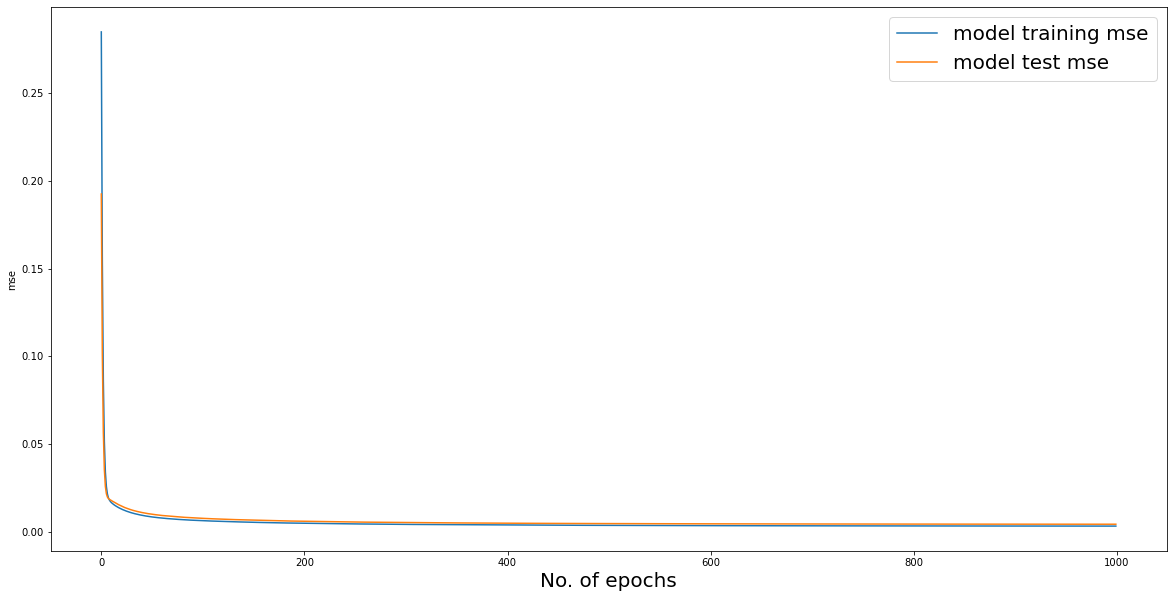

In [43]:
print(min(history_4.history["val_mse"]))
plot_model(history_4)

### Introducing dropout layers to the 4 layer NN

Dropout layers help prevent overfitting in a model. During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer be treated-like it has a different number of nodes and connectivity to the prior layer. This helps prevent co-adapting of neurons. 

However, it must be noted that dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.

In [44]:
EPOCHS=1000

# Loading the data
data = np.genfromtxt('admission_predict.csv', delimiter= ',')
data = data[1:] # Remove nan row
X, y = data[:, :8], data[:,-1]

timingDict4_dropout = {}
historyDict4_dropout = {}
mseDict4_dropout = {}

model4_dropout = Sequential([
    Dense(units=50, activation='relu', kernel_regularizer=l2(L2_REGULARIZATION)),
    Dropout(0.2),
    Dense(units=50, activation='relu', kernel_regularizer=l2(L2_REGULARIZATION)),
    Dropout(0.2),
    Dense(units = 1, kernel_regularizer=l2(L2_REGULARIZATION))
    ])

history_4_dropout, timing_4_dropout = train_model(currentModel = model4_dropout, currentX = X, currenty = y, SEED_VALUE = 15, EPOCHS = EPOCHS)
print(history_4_dropout)
print(timing_4_dropout)

Train on 280 samples, validate on 120 samples
Epoch 1/1000
280/280 - 0s - loss: 0.7512 - mse: 0.6836 - val_loss: 0.3867 - val_mse: 0.3192
Epoch 2/1000
280/280 - 0s - loss: 0.3366 - mse: 0.2691 - val_loss: 0.1769 - val_mse: 0.1094
Epoch 3/1000
280/280 - 0s - loss: 0.2272 - mse: 0.1597 - val_loss: 0.1055 - val_mse: 0.0379
Epoch 4/1000
280/280 - 0s - loss: 0.1522 - mse: 0.0847 - val_loss: 0.0833 - val_mse: 0.0158
Epoch 5/1000
280/280 - 0s - loss: 0.1340 - mse: 0.0664 - val_loss: 0.0782 - val_mse: 0.0107
Epoch 6/1000
280/280 - 0s - loss: 0.1372 - mse: 0.0697 - val_loss: 0.0759 - val_mse: 0.0084
Epoch 7/1000
280/280 - 0s - loss: 0.1195 - mse: 0.0520 - val_loss: 0.0757 - val_mse: 0.0082
Epoch 8/1000
280/280 - 0s - loss: 0.1328 - mse: 0.0654 - val_loss: 0.0754 - val_mse: 0.0080
Epoch 9/1000
280/280 - 0s - loss: 0.1288 - mse: 0.0614 - val_loss: 0.0753 - val_mse: 0.0078
Epoch 10/1000
280/280 - 0s - loss: 0.1250 - mse: 0.0576 - val_loss: 0.0752 - val_mse: 0.0077
Epoch 11/1000
280/280 - 0s - loss

Epoch 89/1000
280/280 - 0s - loss: 0.0851 - mse: 0.0190 - val_loss: 0.0723 - val_mse: 0.0062
Epoch 90/1000
280/280 - 0s - loss: 0.0863 - mse: 0.0202 - val_loss: 0.0723 - val_mse: 0.0062
Epoch 91/1000
280/280 - 0s - loss: 0.0891 - mse: 0.0230 - val_loss: 0.0723 - val_mse: 0.0062
Epoch 92/1000
280/280 - 0s - loss: 0.0871 - mse: 0.0210 - val_loss: 0.0723 - val_mse: 0.0062
Epoch 93/1000
280/280 - 0s - loss: 0.0864 - mse: 0.0203 - val_loss: 0.0724 - val_mse: 0.0063
Epoch 94/1000
280/280 - 0s - loss: 0.0836 - mse: 0.0175 - val_loss: 0.0724 - val_mse: 0.0063
Epoch 95/1000
280/280 - 0s - loss: 0.0873 - mse: 0.0212 - val_loss: 0.0724 - val_mse: 0.0064
Epoch 96/1000
280/280 - 0s - loss: 0.0863 - mse: 0.0202 - val_loss: 0.0723 - val_mse: 0.0063
Epoch 97/1000
280/280 - 0s - loss: 0.0852 - mse: 0.0192 - val_loss: 0.0723 - val_mse: 0.0063
Epoch 98/1000
280/280 - 0s - loss: 0.0867 - mse: 0.0207 - val_loss: 0.0723 - val_mse: 0.0063
Epoch 99/1000
280/280 - 0s - loss: 0.0884 - mse: 0.0224 - val_loss: 0.

Epoch 177/1000
280/280 - 0s - loss: 0.0779 - mse: 0.0128 - val_loss: 0.0724 - val_mse: 0.0073
Epoch 178/1000
280/280 - 0s - loss: 0.0796 - mse: 0.0145 - val_loss: 0.0723 - val_mse: 0.0073
Epoch 179/1000
280/280 - 0s - loss: 0.0825 - mse: 0.0175 - val_loss: 0.0723 - val_mse: 0.0072
Epoch 180/1000
280/280 - 0s - loss: 0.0795 - mse: 0.0145 - val_loss: 0.0723 - val_mse: 0.0072
Epoch 181/1000
280/280 - 0s - loss: 0.0793 - mse: 0.0143 - val_loss: 0.0722 - val_mse: 0.0072
Epoch 182/1000
280/280 - 0s - loss: 0.0806 - mse: 0.0156 - val_loss: 0.0722 - val_mse: 0.0072
Epoch 183/1000
280/280 - 0s - loss: 0.0792 - mse: 0.0142 - val_loss: 0.0723 - val_mse: 0.0073
Epoch 184/1000
280/280 - 0s - loss: 0.0806 - mse: 0.0156 - val_loss: 0.0723 - val_mse: 0.0073
Epoch 185/1000
280/280 - 0s - loss: 0.0797 - mse: 0.0148 - val_loss: 0.0723 - val_mse: 0.0073
Epoch 186/1000
280/280 - 0s - loss: 0.0787 - mse: 0.0137 - val_loss: 0.0722 - val_mse: 0.0073
Epoch 187/1000
280/280 - 0s - loss: 0.0775 - mse: 0.0125 - v

280/280 - 0s - loss: 0.0749 - mse: 0.0107 - val_loss: 0.0721 - val_mse: 0.0079
Epoch 265/1000
280/280 - 0s - loss: 0.0762 - mse: 0.0121 - val_loss: 0.0722 - val_mse: 0.0080
Epoch 266/1000
280/280 - 0s - loss: 0.0763 - mse: 0.0121 - val_loss: 0.0721 - val_mse: 0.0079
Epoch 267/1000
280/280 - 0s - loss: 0.0772 - mse: 0.0131 - val_loss: 0.0721 - val_mse: 0.0080
Epoch 268/1000
280/280 - 0s - loss: 0.0763 - mse: 0.0122 - val_loss: 0.0720 - val_mse: 0.0079
Epoch 269/1000
280/280 - 0s - loss: 0.0737 - mse: 0.0096 - val_loss: 0.0721 - val_mse: 0.0080
Epoch 270/1000
280/280 - 0s - loss: 0.0742 - mse: 0.0101 - val_loss: 0.0721 - val_mse: 0.0081
Epoch 271/1000
280/280 - 0s - loss: 0.0746 - mse: 0.0106 - val_loss: 0.0722 - val_mse: 0.0081
Epoch 272/1000
280/280 - 0s - loss: 0.0747 - mse: 0.0107 - val_loss: 0.0722 - val_mse: 0.0082
Epoch 273/1000
280/280 - 0s - loss: 0.0752 - mse: 0.0111 - val_loss: 0.0722 - val_mse: 0.0081
Epoch 274/1000
280/280 - 0s - loss: 0.0758 - mse: 0.0118 - val_loss: 0.0722

Epoch 352/1000
280/280 - 0s - loss: 0.0726 - mse: 0.0093 - val_loss: 0.0716 - val_mse: 0.0083
Epoch 353/1000
280/280 - 0s - loss: 0.0740 - mse: 0.0107 - val_loss: 0.0716 - val_mse: 0.0084
Epoch 354/1000
280/280 - 0s - loss: 0.0746 - mse: 0.0114 - val_loss: 0.0715 - val_mse: 0.0083
Epoch 355/1000
280/280 - 0s - loss: 0.0737 - mse: 0.0105 - val_loss: 0.0715 - val_mse: 0.0083
Epoch 356/1000
280/280 - 0s - loss: 0.0745 - mse: 0.0113 - val_loss: 0.0714 - val_mse: 0.0082
Epoch 357/1000
280/280 - 0s - loss: 0.0731 - mse: 0.0099 - val_loss: 0.0715 - val_mse: 0.0083
Epoch 358/1000
280/280 - 0s - loss: 0.0728 - mse: 0.0096 - val_loss: 0.0714 - val_mse: 0.0082
Epoch 359/1000
280/280 - 0s - loss: 0.0743 - mse: 0.0111 - val_loss: 0.0714 - val_mse: 0.0082
Epoch 360/1000
280/280 - 0s - loss: 0.0730 - mse: 0.0098 - val_loss: 0.0714 - val_mse: 0.0082
Epoch 361/1000
280/280 - 0s - loss: 0.0732 - mse: 0.0100 - val_loss: 0.0714 - val_mse: 0.0082
Epoch 362/1000
280/280 - 0s - loss: 0.0738 - mse: 0.0107 - v

280/280 - 0s - loss: 0.0723 - mse: 0.0099 - val_loss: 0.0708 - val_mse: 0.0084
Epoch 440/1000
280/280 - 0s - loss: 0.0734 - mse: 0.0110 - val_loss: 0.0707 - val_mse: 0.0083
Epoch 441/1000
280/280 - 0s - loss: 0.0711 - mse: 0.0087 - val_loss: 0.0707 - val_mse: 0.0083
Epoch 442/1000
280/280 - 0s - loss: 0.0714 - mse: 0.0091 - val_loss: 0.0707 - val_mse: 0.0083
Epoch 443/1000
280/280 - 0s - loss: 0.0714 - mse: 0.0090 - val_loss: 0.0707 - val_mse: 0.0083
Epoch 444/1000
280/280 - 0s - loss: 0.0720 - mse: 0.0096 - val_loss: 0.0707 - val_mse: 0.0083
Epoch 445/1000
280/280 - 0s - loss: 0.0717 - mse: 0.0093 - val_loss: 0.0707 - val_mse: 0.0083
Epoch 446/1000
280/280 - 0s - loss: 0.0713 - mse: 0.0090 - val_loss: 0.0707 - val_mse: 0.0083
Epoch 447/1000
280/280 - 0s - loss: 0.0723 - mse: 0.0099 - val_loss: 0.0706 - val_mse: 0.0083
Epoch 448/1000
280/280 - 0s - loss: 0.0734 - mse: 0.0111 - val_loss: 0.0707 - val_mse: 0.0083
Epoch 449/1000
280/280 - 0s - loss: 0.0724 - mse: 0.0101 - val_loss: 0.0706

Epoch 527/1000
280/280 - 0s - loss: 0.0710 - mse: 0.0094 - val_loss: 0.0700 - val_mse: 0.0084
Epoch 528/1000
280/280 - 0s - loss: 0.0700 - mse: 0.0084 - val_loss: 0.0699 - val_mse: 0.0084
Epoch 529/1000
280/280 - 0s - loss: 0.0712 - mse: 0.0096 - val_loss: 0.0699 - val_mse: 0.0083
Epoch 530/1000
280/280 - 0s - loss: 0.0712 - mse: 0.0097 - val_loss: 0.0699 - val_mse: 0.0084
Epoch 531/1000
280/280 - 0s - loss: 0.0706 - mse: 0.0091 - val_loss: 0.0699 - val_mse: 0.0083
Epoch 532/1000
280/280 - 0s - loss: 0.0708 - mse: 0.0092 - val_loss: 0.0698 - val_mse: 0.0083
Epoch 533/1000
280/280 - 0s - loss: 0.0709 - mse: 0.0094 - val_loss: 0.0699 - val_mse: 0.0083
Epoch 534/1000
280/280 - 0s - loss: 0.0706 - mse: 0.0091 - val_loss: 0.0698 - val_mse: 0.0083
Epoch 535/1000
280/280 - 0s - loss: 0.0699 - mse: 0.0083 - val_loss: 0.0698 - val_mse: 0.0083
Epoch 536/1000
280/280 - 0s - loss: 0.0708 - mse: 0.0093 - val_loss: 0.0698 - val_mse: 0.0083
Epoch 537/1000
280/280 - 0s - loss: 0.0695 - mse: 0.0080 - v

280/280 - 0s - loss: 0.0690 - mse: 0.0082 - val_loss: 0.0691 - val_mse: 0.0083
Epoch 615/1000
280/280 - 0s - loss: 0.0697 - mse: 0.0089 - val_loss: 0.0691 - val_mse: 0.0083
Epoch 616/1000
280/280 - 0s - loss: 0.0693 - mse: 0.0085 - val_loss: 0.0690 - val_mse: 0.0083
Epoch 617/1000
280/280 - 0s - loss: 0.0697 - mse: 0.0089 - val_loss: 0.0691 - val_mse: 0.0083
Epoch 618/1000
280/280 - 0s - loss: 0.0698 - mse: 0.0090 - val_loss: 0.0690 - val_mse: 0.0083
Epoch 619/1000
280/280 - 0s - loss: 0.0702 - mse: 0.0094 - val_loss: 0.0690 - val_mse: 0.0082
Epoch 620/1000
280/280 - 0s - loss: 0.0698 - mse: 0.0091 - val_loss: 0.0690 - val_mse: 0.0083
Epoch 621/1000
280/280 - 0s - loss: 0.0688 - mse: 0.0080 - val_loss: 0.0690 - val_mse: 0.0083
Epoch 622/1000
280/280 - 0s - loss: 0.0688 - mse: 0.0081 - val_loss: 0.0690 - val_mse: 0.0083
Epoch 623/1000
280/280 - 0s - loss: 0.0694 - mse: 0.0086 - val_loss: 0.0690 - val_mse: 0.0083
Epoch 624/1000
280/280 - 0s - loss: 0.0677 - mse: 0.0070 - val_loss: 0.0691

Epoch 702/1000
280/280 - 0s - loss: 0.0679 - mse: 0.0079 - val_loss: 0.0682 - val_mse: 0.0082
Epoch 703/1000
280/280 - 0s - loss: 0.0678 - mse: 0.0078 - val_loss: 0.0682 - val_mse: 0.0082
Epoch 704/1000
280/280 - 0s - loss: 0.0677 - mse: 0.0077 - val_loss: 0.0682 - val_mse: 0.0082
Epoch 705/1000
280/280 - 0s - loss: 0.0687 - mse: 0.0087 - val_loss: 0.0682 - val_mse: 0.0082
Epoch 706/1000
280/280 - 0s - loss: 0.0687 - mse: 0.0087 - val_loss: 0.0682 - val_mse: 0.0082
Epoch 707/1000
280/280 - 0s - loss: 0.0683 - mse: 0.0083 - val_loss: 0.0682 - val_mse: 0.0082
Epoch 708/1000
280/280 - 0s - loss: 0.0687 - mse: 0.0087 - val_loss: 0.0682 - val_mse: 0.0082
Epoch 709/1000
280/280 - 0s - loss: 0.0686 - mse: 0.0087 - val_loss: 0.0682 - val_mse: 0.0082
Epoch 710/1000
280/280 - 0s - loss: 0.0676 - mse: 0.0076 - val_loss: 0.0682 - val_mse: 0.0082
Epoch 711/1000
280/280 - 0s - loss: 0.0683 - mse: 0.0084 - val_loss: 0.0682 - val_mse: 0.0082
Epoch 712/1000
280/280 - 0s - loss: 0.0686 - mse: 0.0087 - v

280/280 - 0s - loss: 0.0665 - mse: 0.0072 - val_loss: 0.0673 - val_mse: 0.0081
Epoch 790/1000
280/280 - 0s - loss: 0.0674 - mse: 0.0082 - val_loss: 0.0674 - val_mse: 0.0081
Epoch 791/1000
280/280 - 0s - loss: 0.0668 - mse: 0.0075 - val_loss: 0.0674 - val_mse: 0.0081
Epoch 792/1000
280/280 - 0s - loss: 0.0670 - mse: 0.0078 - val_loss: 0.0673 - val_mse: 0.0081
Epoch 793/1000
280/280 - 0s - loss: 0.0669 - mse: 0.0077 - val_loss: 0.0673 - val_mse: 0.0081
Epoch 794/1000
280/280 - 0s - loss: 0.0671 - mse: 0.0079 - val_loss: 0.0673 - val_mse: 0.0081
Epoch 795/1000
280/280 - 0s - loss: 0.0670 - mse: 0.0078 - val_loss: 0.0673 - val_mse: 0.0081
Epoch 796/1000
280/280 - 0s - loss: 0.0676 - mse: 0.0083 - val_loss: 0.0673 - val_mse: 0.0081
Epoch 797/1000
280/280 - 0s - loss: 0.0668 - mse: 0.0076 - val_loss: 0.0673 - val_mse: 0.0081
Epoch 798/1000
280/280 - 0s - loss: 0.0664 - mse: 0.0072 - val_loss: 0.0673 - val_mse: 0.0081
Epoch 799/1000
280/280 - 0s - loss: 0.0677 - mse: 0.0085 - val_loss: 0.0673

Epoch 877/1000
280/280 - 0s - loss: 0.0658 - mse: 0.0072 - val_loss: 0.0665 - val_mse: 0.0080
Epoch 878/1000
280/280 - 0s - loss: 0.0658 - mse: 0.0072 - val_loss: 0.0665 - val_mse: 0.0080
Epoch 879/1000
280/280 - 0s - loss: 0.0667 - mse: 0.0082 - val_loss: 0.0665 - val_mse: 0.0080
Epoch 880/1000
280/280 - 0s - loss: 0.0651 - mse: 0.0067 - val_loss: 0.0665 - val_mse: 0.0080
Epoch 881/1000
280/280 - 0s - loss: 0.0654 - mse: 0.0069 - val_loss: 0.0664 - val_mse: 0.0080
Epoch 882/1000
280/280 - 0s - loss: 0.0655 - mse: 0.0070 - val_loss: 0.0665 - val_mse: 0.0080
Epoch 883/1000
280/280 - 0s - loss: 0.0666 - mse: 0.0081 - val_loss: 0.0665 - val_mse: 0.0080
Epoch 884/1000
280/280 - 0s - loss: 0.0650 - mse: 0.0066 - val_loss: 0.0665 - val_mse: 0.0080
Epoch 885/1000
280/280 - 0s - loss: 0.0656 - mse: 0.0072 - val_loss: 0.0665 - val_mse: 0.0080
Epoch 886/1000
280/280 - 0s - loss: 0.0659 - mse: 0.0074 - val_loss: 0.0665 - val_mse: 0.0081
Epoch 887/1000
280/280 - 0s - loss: 0.0663 - mse: 0.0079 - v

280/280 - 0s - loss: 0.0658 - mse: 0.0080 - val_loss: 0.0656 - val_mse: 0.0079
Epoch 965/1000
280/280 - 0s - loss: 0.0650 - mse: 0.0073 - val_loss: 0.0657 - val_mse: 0.0079
Epoch 966/1000
280/280 - 0s - loss: 0.0652 - mse: 0.0074 - val_loss: 0.0657 - val_mse: 0.0079
Epoch 967/1000
280/280 - 0s - loss: 0.0648 - mse: 0.0071 - val_loss: 0.0656 - val_mse: 0.0079
Epoch 968/1000
280/280 - 0s - loss: 0.0651 - mse: 0.0073 - val_loss: 0.0657 - val_mse: 0.0079
Epoch 969/1000
280/280 - 0s - loss: 0.0646 - mse: 0.0068 - val_loss: 0.0657 - val_mse: 0.0079
Epoch 970/1000
280/280 - 0s - loss: 0.0646 - mse: 0.0069 - val_loss: 0.0657 - val_mse: 0.0079
Epoch 971/1000
280/280 - 0s - loss: 0.0659 - mse: 0.0082 - val_loss: 0.0656 - val_mse: 0.0079
Epoch 972/1000
280/280 - 0s - loss: 0.0646 - mse: 0.0069 - val_loss: 0.0656 - val_mse: 0.0079
Epoch 973/1000
280/280 - 0s - loss: 0.0658 - mse: 0.0081 - val_loss: 0.0656 - val_mse: 0.0079
Epoch 974/1000
280/280 - 0s - loss: 0.0641 - mse: 0.0064 - val_loss: 0.0656

0.0058734505


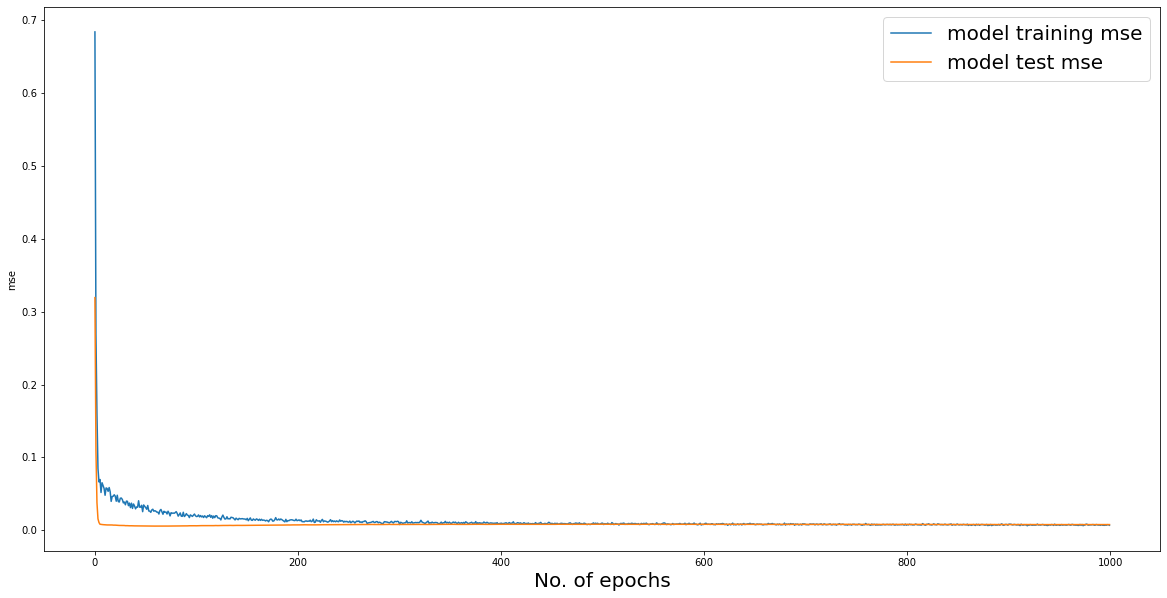

In [45]:
print(min(history_4_dropout.history["val_mse"]))
plot_model(history_4_dropout)

As expected, the training process has been made noisy due to the dropout layers. It can be noted that the train and test MSE values for a 4-layer network are considerably better when there are no dropout layers involved. 

## Training the 5 layer neural network

In [46]:
EPOCHS=1000

# Loading the data
data = np.genfromtxt('admission_predict.csv', delimiter= ',')
data = data[1:] # Remove nan row
X, y = data[:, :8], data[:,-1] #CHANGE

timingDict5 = {}
historyDict5 = {}
mseDict5 = {}

model5 = Sequential([
    Dense(units=50, activation='relu', kernel_regularizer=l2(L2_REGULARIZATION)),
    Dense(units=50, activation='relu', kernel_regularizer=l2(L2_REGULARIZATION)),
    Dense(units=50, activation='relu', kernel_regularizer=l2(L2_REGULARIZATION)),
    Dense(units = 1, kernel_regularizer=l2(L2_REGULARIZATION))
    ])

history_5, timing_5 = train_model(currentModel = model5, currentX = X, currenty = y, SEED_VALUE = 15, EPOCHS = EPOCHS)
print(history_5)
print(timing_5)

Train on 280 samples, validate on 120 samples
Epoch 1/1000
280/280 - 0s - loss: 0.4062 - mse: 0.2887 - val_loss: 0.3152 - val_mse: 0.1978
Epoch 2/1000
280/280 - 0s - loss: 0.2749 - mse: 0.1574 - val_loss: 0.2270 - val_mse: 0.1095
Epoch 3/1000
280/280 - 0s - loss: 0.2036 - mse: 0.0861 - val_loss: 0.1780 - val_mse: 0.0605
Epoch 4/1000
280/280 - 0s - loss: 0.1650 - mse: 0.0474 - val_loss: 0.1519 - val_mse: 0.0343
Epoch 5/1000
280/280 - 0s - loss: 0.1451 - mse: 0.0276 - val_loss: 0.1387 - val_mse: 0.0212
Epoch 6/1000
280/280 - 0s - loss: 0.1356 - mse: 0.0181 - val_loss: 0.1326 - val_mse: 0.0150
Epoch 7/1000
280/280 - 0s - loss: 0.1313 - mse: 0.0137 - val_loss: 0.1296 - val_mse: 0.0120
Epoch 8/1000
280/280 - 0s - loss: 0.1293 - mse: 0.0117 - val_loss: 0.1282 - val_mse: 0.0106
Epoch 9/1000
280/280 - 0s - loss: 0.1283 - mse: 0.0107 - val_loss: 0.1274 - val_mse: 0.0099
Epoch 10/1000
280/280 - 0s - loss: 0.1278 - mse: 0.0102 - val_loss: 0.1270 - val_mse: 0.0095
Epoch 11/1000
280/280 - 0s - loss

Epoch 89/1000
280/280 - 0s - loss: 0.1213 - mse: 0.0051 - val_loss: 0.1219 - val_mse: 0.0056
Epoch 90/1000
280/280 - 0s - loss: 0.1213 - mse: 0.0051 - val_loss: 0.1218 - val_mse: 0.0056
Epoch 91/1000
280/280 - 0s - loss: 0.1213 - mse: 0.0051 - val_loss: 0.1218 - val_mse: 0.0056
Epoch 92/1000
280/280 - 0s - loss: 0.1212 - mse: 0.0050 - val_loss: 0.1218 - val_mse: 0.0056
Epoch 93/1000
280/280 - 0s - loss: 0.1212 - mse: 0.0050 - val_loss: 0.1218 - val_mse: 0.0056
Epoch 94/1000
280/280 - 0s - loss: 0.1212 - mse: 0.0050 - val_loss: 0.1217 - val_mse: 0.0056
Epoch 95/1000
280/280 - 0s - loss: 0.1211 - mse: 0.0050 - val_loss: 0.1217 - val_mse: 0.0056
Epoch 96/1000
280/280 - 0s - loss: 0.1211 - mse: 0.0050 - val_loss: 0.1217 - val_mse: 0.0056
Epoch 97/1000
280/280 - 0s - loss: 0.1211 - mse: 0.0050 - val_loss: 0.1217 - val_mse: 0.0056
Epoch 98/1000
280/280 - 0s - loss: 0.1211 - mse: 0.0050 - val_loss: 0.1216 - val_mse: 0.0055
Epoch 99/1000
280/280 - 0s - loss: 0.1210 - mse: 0.0050 - val_loss: 0.

Epoch 177/1000
280/280 - 0s - loss: 0.1192 - mse: 0.0044 - val_loss: 0.1199 - val_mse: 0.0051
Epoch 178/1000
280/280 - 0s - loss: 0.1192 - mse: 0.0044 - val_loss: 0.1199 - val_mse: 0.0051
Epoch 179/1000
280/280 - 0s - loss: 0.1192 - mse: 0.0044 - val_loss: 0.1198 - val_mse: 0.0051
Epoch 180/1000
280/280 - 0s - loss: 0.1192 - mse: 0.0044 - val_loss: 0.1198 - val_mse: 0.0051
Epoch 181/1000
280/280 - 0s - loss: 0.1191 - mse: 0.0044 - val_loss: 0.1198 - val_mse: 0.0051
Epoch 182/1000
280/280 - 0s - loss: 0.1191 - mse: 0.0044 - val_loss: 0.1198 - val_mse: 0.0051
Epoch 183/1000
280/280 - 0s - loss: 0.1191 - mse: 0.0044 - val_loss: 0.1198 - val_mse: 0.0051
Epoch 184/1000
280/280 - 0s - loss: 0.1191 - mse: 0.0044 - val_loss: 0.1197 - val_mse: 0.0050
Epoch 185/1000
280/280 - 0s - loss: 0.1191 - mse: 0.0044 - val_loss: 0.1197 - val_mse: 0.0050
Epoch 186/1000
280/280 - 0s - loss: 0.1190 - mse: 0.0044 - val_loss: 0.1197 - val_mse: 0.0050
Epoch 187/1000
280/280 - 0s - loss: 0.1190 - mse: 0.0044 - v

280/280 - 0s - loss: 0.1175 - mse: 0.0041 - val_loss: 0.1182 - val_mse: 0.0048
Epoch 265/1000
280/280 - 0s - loss: 0.1175 - mse: 0.0041 - val_loss: 0.1182 - val_mse: 0.0048
Epoch 266/1000
280/280 - 0s - loss: 0.1175 - mse: 0.0041 - val_loss: 0.1182 - val_mse: 0.0048
Epoch 267/1000
280/280 - 0s - loss: 0.1175 - mse: 0.0041 - val_loss: 0.1182 - val_mse: 0.0048
Epoch 268/1000
280/280 - 0s - loss: 0.1175 - mse: 0.0041 - val_loss: 0.1182 - val_mse: 0.0048
Epoch 269/1000
280/280 - 0s - loss: 0.1174 - mse: 0.0041 - val_loss: 0.1181 - val_mse: 0.0048
Epoch 270/1000
280/280 - 0s - loss: 0.1174 - mse: 0.0041 - val_loss: 0.1181 - val_mse: 0.0048
Epoch 271/1000
280/280 - 0s - loss: 0.1174 - mse: 0.0041 - val_loss: 0.1181 - val_mse: 0.0048
Epoch 272/1000
280/280 - 0s - loss: 0.1174 - mse: 0.0041 - val_loss: 0.1181 - val_mse: 0.0048
Epoch 273/1000
280/280 - 0s - loss: 0.1174 - mse: 0.0041 - val_loss: 0.1181 - val_mse: 0.0048
Epoch 274/1000
280/280 - 0s - loss: 0.1174 - mse: 0.0041 - val_loss: 0.1181

Epoch 352/1000
280/280 - 0s - loss: 0.1160 - mse: 0.0039 - val_loss: 0.1167 - val_mse: 0.0047
Epoch 353/1000
280/280 - 0s - loss: 0.1160 - mse: 0.0039 - val_loss: 0.1167 - val_mse: 0.0047
Epoch 354/1000
280/280 - 0s - loss: 0.1159 - mse: 0.0039 - val_loss: 0.1167 - val_mse: 0.0047
Epoch 355/1000
280/280 - 0s - loss: 0.1159 - mse: 0.0039 - val_loss: 0.1167 - val_mse: 0.0047
Epoch 356/1000
280/280 - 0s - loss: 0.1159 - mse: 0.0039 - val_loss: 0.1166 - val_mse: 0.0047
Epoch 357/1000
280/280 - 0s - loss: 0.1159 - mse: 0.0039 - val_loss: 0.1166 - val_mse: 0.0047
Epoch 358/1000
280/280 - 0s - loss: 0.1159 - mse: 0.0039 - val_loss: 0.1166 - val_mse: 0.0047
Epoch 359/1000
280/280 - 0s - loss: 0.1158 - mse: 0.0039 - val_loss: 0.1166 - val_mse: 0.0047
Epoch 360/1000
280/280 - 0s - loss: 0.1158 - mse: 0.0039 - val_loss: 0.1166 - val_mse: 0.0047
Epoch 361/1000
280/280 - 0s - loss: 0.1158 - mse: 0.0039 - val_loss: 0.1166 - val_mse: 0.0047
Epoch 362/1000
280/280 - 0s - loss: 0.1158 - mse: 0.0039 - v

280/280 - 0s - loss: 0.1145 - mse: 0.0038 - val_loss: 0.1153 - val_mse: 0.0046
Epoch 440/1000
280/280 - 0s - loss: 0.1145 - mse: 0.0038 - val_loss: 0.1153 - val_mse: 0.0046
Epoch 441/1000
280/280 - 0s - loss: 0.1145 - mse: 0.0038 - val_loss: 0.1153 - val_mse: 0.0046
Epoch 442/1000
280/280 - 0s - loss: 0.1145 - mse: 0.0038 - val_loss: 0.1153 - val_mse: 0.0046
Epoch 443/1000
280/280 - 0s - loss: 0.1144 - mse: 0.0038 - val_loss: 0.1152 - val_mse: 0.0046
Epoch 444/1000
280/280 - 0s - loss: 0.1144 - mse: 0.0038 - val_loss: 0.1152 - val_mse: 0.0046
Epoch 445/1000
280/280 - 0s - loss: 0.1144 - mse: 0.0038 - val_loss: 0.1152 - val_mse: 0.0046
Epoch 446/1000
280/280 - 0s - loss: 0.1144 - mse: 0.0038 - val_loss: 0.1152 - val_mse: 0.0046
Epoch 447/1000
280/280 - 0s - loss: 0.1144 - mse: 0.0038 - val_loss: 0.1152 - val_mse: 0.0046
Epoch 448/1000
280/280 - 0s - loss: 0.1144 - mse: 0.0038 - val_loss: 0.1152 - val_mse: 0.0046
Epoch 449/1000
280/280 - 0s - loss: 0.1143 - mse: 0.0038 - val_loss: 0.1151

Epoch 527/1000
280/280 - 0s - loss: 0.1131 - mse: 0.0037 - val_loss: 0.1139 - val_mse: 0.0046
Epoch 528/1000
280/280 - 0s - loss: 0.1131 - mse: 0.0037 - val_loss: 0.1139 - val_mse: 0.0046
Epoch 529/1000
280/280 - 0s - loss: 0.1131 - mse: 0.0037 - val_loss: 0.1139 - val_mse: 0.0046
Epoch 530/1000
280/280 - 0s - loss: 0.1130 - mse: 0.0037 - val_loss: 0.1139 - val_mse: 0.0046
Epoch 531/1000
280/280 - 0s - loss: 0.1130 - mse: 0.0037 - val_loss: 0.1139 - val_mse: 0.0046
Epoch 532/1000
280/280 - 0s - loss: 0.1130 - mse: 0.0037 - val_loss: 0.1138 - val_mse: 0.0046
Epoch 533/1000
280/280 - 0s - loss: 0.1130 - mse: 0.0037 - val_loss: 0.1138 - val_mse: 0.0045
Epoch 534/1000
280/280 - 0s - loss: 0.1130 - mse: 0.0037 - val_loss: 0.1138 - val_mse: 0.0045
Epoch 535/1000
280/280 - 0s - loss: 0.1130 - mse: 0.0037 - val_loss: 0.1138 - val_mse: 0.0046
Epoch 536/1000
280/280 - 0s - loss: 0.1129 - mse: 0.0037 - val_loss: 0.1138 - val_mse: 0.0045
Epoch 537/1000
280/280 - 0s - loss: 0.1129 - mse: 0.0037 - v

280/280 - 0s - loss: 0.1117 - mse: 0.0037 - val_loss: 0.1126 - val_mse: 0.0045
Epoch 615/1000
280/280 - 0s - loss: 0.1117 - mse: 0.0037 - val_loss: 0.1126 - val_mse: 0.0045
Epoch 616/1000
280/280 - 0s - loss: 0.1117 - mse: 0.0037 - val_loss: 0.1125 - val_mse: 0.0045
Epoch 617/1000
280/280 - 0s - loss: 0.1117 - mse: 0.0037 - val_loss: 0.1125 - val_mse: 0.0045
Epoch 618/1000
280/280 - 0s - loss: 0.1117 - mse: 0.0037 - val_loss: 0.1125 - val_mse: 0.0045
Epoch 619/1000
280/280 - 0s - loss: 0.1116 - mse: 0.0037 - val_loss: 0.1125 - val_mse: 0.0045
Epoch 620/1000
280/280 - 0s - loss: 0.1116 - mse: 0.0037 - val_loss: 0.1125 - val_mse: 0.0045
Epoch 621/1000
280/280 - 0s - loss: 0.1116 - mse: 0.0037 - val_loss: 0.1125 - val_mse: 0.0045
Epoch 622/1000
280/280 - 0s - loss: 0.1116 - mse: 0.0037 - val_loss: 0.1125 - val_mse: 0.0045
Epoch 623/1000
280/280 - 0s - loss: 0.1116 - mse: 0.0036 - val_loss: 0.1124 - val_mse: 0.0045
Epoch 624/1000
280/280 - 0s - loss: 0.1116 - mse: 0.0036 - val_loss: 0.1124

Epoch 702/1000
280/280 - 0s - loss: 0.1104 - mse: 0.0036 - val_loss: 0.1112 - val_mse: 0.0045
Epoch 703/1000
280/280 - 0s - loss: 0.1103 - mse: 0.0036 - val_loss: 0.1112 - val_mse: 0.0045
Epoch 704/1000
280/280 - 0s - loss: 0.1103 - mse: 0.0036 - val_loss: 0.1112 - val_mse: 0.0045
Epoch 705/1000
280/280 - 0s - loss: 0.1103 - mse: 0.0036 - val_loss: 0.1112 - val_mse: 0.0045
Epoch 706/1000
280/280 - 0s - loss: 0.1103 - mse: 0.0036 - val_loss: 0.1112 - val_mse: 0.0045
Epoch 707/1000
280/280 - 0s - loss: 0.1103 - mse: 0.0036 - val_loss: 0.1112 - val_mse: 0.0045
Epoch 708/1000
280/280 - 0s - loss: 0.1103 - mse: 0.0036 - val_loss: 0.1111 - val_mse: 0.0045
Epoch 709/1000
280/280 - 0s - loss: 0.1102 - mse: 0.0036 - val_loss: 0.1111 - val_mse: 0.0045
Epoch 710/1000
280/280 - 0s - loss: 0.1102 - mse: 0.0036 - val_loss: 0.1111 - val_mse: 0.0045
Epoch 711/1000
280/280 - 0s - loss: 0.1102 - mse: 0.0036 - val_loss: 0.1111 - val_mse: 0.0045
Epoch 712/1000
280/280 - 0s - loss: 0.1102 - mse: 0.0036 - v

280/280 - 0s - loss: 0.1090 - mse: 0.0036 - val_loss: 0.1099 - val_mse: 0.0045
Epoch 790/1000
280/280 - 0s - loss: 0.1090 - mse: 0.0036 - val_loss: 0.1099 - val_mse: 0.0045
Epoch 791/1000
280/280 - 0s - loss: 0.1090 - mse: 0.0036 - val_loss: 0.1099 - val_mse: 0.0045
Epoch 792/1000
280/280 - 0s - loss: 0.1090 - mse: 0.0036 - val_loss: 0.1099 - val_mse: 0.0045
Epoch 793/1000
280/280 - 0s - loss: 0.1090 - mse: 0.0036 - val_loss: 0.1099 - val_mse: 0.0045
Epoch 794/1000
280/280 - 0s - loss: 0.1090 - mse: 0.0036 - val_loss: 0.1099 - val_mse: 0.0045
Epoch 795/1000
280/280 - 0s - loss: 0.1089 - mse: 0.0036 - val_loss: 0.1099 - val_mse: 0.0045
Epoch 796/1000
280/280 - 0s - loss: 0.1089 - mse: 0.0036 - val_loss: 0.1098 - val_mse: 0.0045
Epoch 797/1000
280/280 - 0s - loss: 0.1089 - mse: 0.0036 - val_loss: 0.1098 - val_mse: 0.0045
Epoch 798/1000
280/280 - 0s - loss: 0.1089 - mse: 0.0036 - val_loss: 0.1098 - val_mse: 0.0045
Epoch 799/1000
280/280 - 0s - loss: 0.1089 - mse: 0.0036 - val_loss: 0.1098

Epoch 877/1000
280/280 - 0s - loss: 0.1077 - mse: 0.0035 - val_loss: 0.1087 - val_mse: 0.0045
Epoch 878/1000
280/280 - 0s - loss: 0.1077 - mse: 0.0035 - val_loss: 0.1086 - val_mse: 0.0045
Epoch 879/1000
280/280 - 0s - loss: 0.1077 - mse: 0.0035 - val_loss: 0.1086 - val_mse: 0.0045
Epoch 880/1000
280/280 - 0s - loss: 0.1077 - mse: 0.0035 - val_loss: 0.1086 - val_mse: 0.0045
Epoch 881/1000
280/280 - 0s - loss: 0.1077 - mse: 0.0035 - val_loss: 0.1086 - val_mse: 0.0045
Epoch 882/1000
280/280 - 0s - loss: 0.1077 - mse: 0.0035 - val_loss: 0.1086 - val_mse: 0.0045
Epoch 883/1000
280/280 - 0s - loss: 0.1076 - mse: 0.0035 - val_loss: 0.1086 - val_mse: 0.0045
Epoch 884/1000
280/280 - 0s - loss: 0.1076 - mse: 0.0035 - val_loss: 0.1086 - val_mse: 0.0045
Epoch 885/1000
280/280 - 0s - loss: 0.1076 - mse: 0.0035 - val_loss: 0.1085 - val_mse: 0.0044
Epoch 886/1000
280/280 - 0s - loss: 0.1076 - mse: 0.0035 - val_loss: 0.1085 - val_mse: 0.0045
Epoch 887/1000
280/280 - 0s - loss: 0.1076 - mse: 0.0035 - v

Epoch 965/1000
280/280 - 0s - loss: 0.1064 - mse: 0.0035 - val_loss: 0.1074 - val_mse: 0.0044
Epoch 966/1000
280/280 - 0s - loss: 0.1064 - mse: 0.0035 - val_loss: 0.1074 - val_mse: 0.0044
Epoch 967/1000
280/280 - 0s - loss: 0.1064 - mse: 0.0035 - val_loss: 0.1074 - val_mse: 0.0044
Epoch 968/1000
280/280 - 0s - loss: 0.1064 - mse: 0.0035 - val_loss: 0.1073 - val_mse: 0.0044
Epoch 969/1000
280/280 - 0s - loss: 0.1064 - mse: 0.0035 - val_loss: 0.1073 - val_mse: 0.0044
Epoch 970/1000
280/280 - 0s - loss: 0.1064 - mse: 0.0035 - val_loss: 0.1073 - val_mse: 0.0044
Epoch 971/1000
280/280 - 0s - loss: 0.1064 - mse: 0.0035 - val_loss: 0.1073 - val_mse: 0.0044
Epoch 972/1000
280/280 - 0s - loss: 0.1063 - mse: 0.0035 - val_loss: 0.1073 - val_mse: 0.0044
Epoch 973/1000
280/280 - 0s - loss: 0.1063 - mse: 0.0035 - val_loss: 0.1073 - val_mse: 0.0044
Epoch 974/1000
280/280 - 0s - loss: 0.1063 - mse: 0.0035 - val_loss: 0.1073 - val_mse: 0.0044
Epoch 975/1000
280/280 - 0s - loss: 0.1063 - mse: 0.0035 - v

0.0044370675


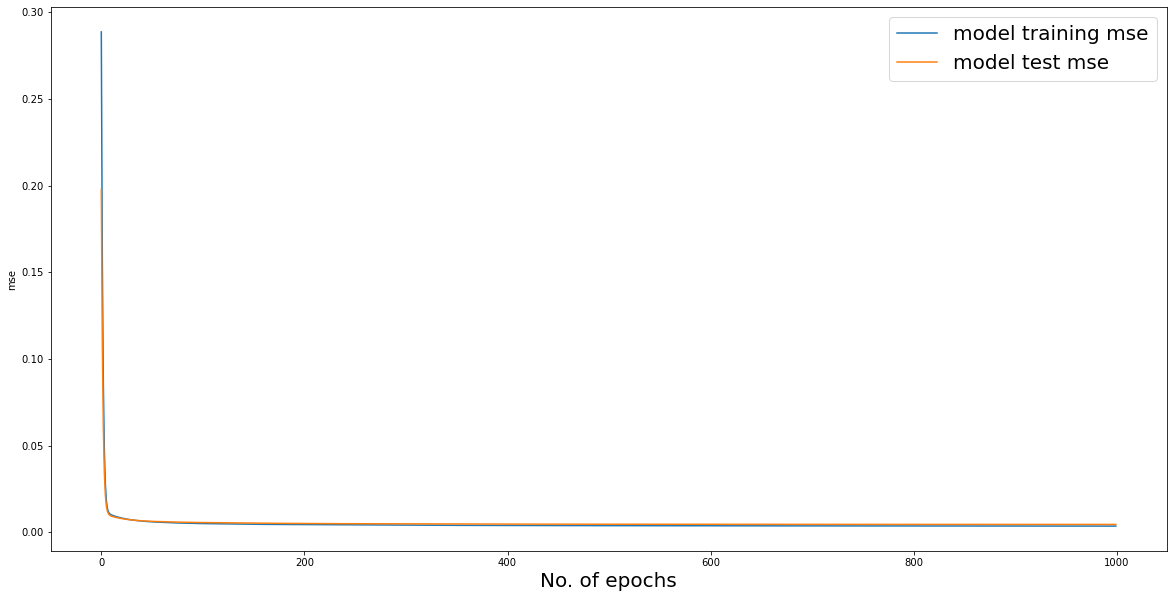

In [47]:
print(min(history_5.history["val_mse"]))
plot_model(history_5)


In [48]:
EPOCHS=1000

# Loading the data
data = np.genfromtxt('admission_predict.csv', delimiter= ',')
data = data[1:] # Remove nan row
X, y = data[:, :8], data[:,-1] 

timingDict5_dropout = {}
historyDict5_dropout = {}
mseDict5_dropout = {}

model5_dropout = Sequential([
    Dense(units=50, activation='relu', kernel_regularizer=l2(L2_REGULARIZATION)),
    Dropout(0.2),
    Dense(units=50, activation='relu', kernel_regularizer=l2(L2_REGULARIZATION)),
    Dropout(0.2),
    Dense(units=50, activation='relu', kernel_regularizer=l2(L2_REGULARIZATION)),
    Dropout(0.2), 
    Dense(units = 1, kernel_regularizer=l2(L2_REGULARIZATION))
    ])

history_5_dropout, timing_5_dropout = train_model(currentModel = model5_dropout, currentX = X, currenty = y, SEED_VALUE = 15, EPOCHS = EPOCHS)
print(history_5_dropout)
print(timing_5_dropout)
print(min(history_5_dropout.history["val_mse"]))

Train on 280 samples, validate on 120 samples
Epoch 1/1000
280/280 - 0s - loss: 0.4635 - mse: 0.3461 - val_loss: 0.3334 - val_mse: 0.2159
Epoch 2/1000
280/280 - 0s - loss: 0.3187 - mse: 0.2013 - val_loss: 0.2429 - val_mse: 0.1255
Epoch 3/1000
280/280 - 0s - loss: 0.2490 - mse: 0.1315 - val_loss: 0.1914 - val_mse: 0.0739
Epoch 4/1000
280/280 - 0s - loss: 0.2088 - mse: 0.0913 - val_loss: 0.1636 - val_mse: 0.0461
Epoch 5/1000
280/280 - 0s - loss: 0.1938 - mse: 0.0763 - val_loss: 0.1476 - val_mse: 0.0301
Epoch 6/1000
280/280 - 0s - loss: 0.1817 - mse: 0.0642 - val_loss: 0.1405 - val_mse: 0.0230
Epoch 7/1000
280/280 - 0s - loss: 0.1777 - mse: 0.0602 - val_loss: 0.1368 - val_mse: 0.0193
Epoch 8/1000
280/280 - 0s - loss: 0.1749 - mse: 0.0575 - val_loss: 0.1359 - val_mse: 0.0185
Epoch 9/1000
280/280 - 0s - loss: 0.1666 - mse: 0.0492 - val_loss: 0.1334 - val_mse: 0.0159
Epoch 10/1000
280/280 - 0s - loss: 0.1609 - mse: 0.0435 - val_loss: 0.1330 - val_mse: 0.0156
Epoch 11/1000
280/280 - 0s - loss

Epoch 89/1000
280/280 - 0s - loss: 0.1375 - mse: 0.0219 - val_loss: 0.1257 - val_mse: 0.0101
Epoch 90/1000
280/280 - 0s - loss: 0.1348 - mse: 0.0192 - val_loss: 0.1257 - val_mse: 0.0101
Epoch 91/1000
280/280 - 0s - loss: 0.1374 - mse: 0.0218 - val_loss: 0.1256 - val_mse: 0.0100
Epoch 92/1000
280/280 - 0s - loss: 0.1364 - mse: 0.0208 - val_loss: 0.1255 - val_mse: 0.0099
Epoch 93/1000
280/280 - 0s - loss: 0.1386 - mse: 0.0230 - val_loss: 0.1256 - val_mse: 0.0100
Epoch 94/1000
280/280 - 0s - loss: 0.1402 - mse: 0.0247 - val_loss: 0.1255 - val_mse: 0.0099
Epoch 95/1000
280/280 - 0s - loss: 0.1360 - mse: 0.0205 - val_loss: 0.1252 - val_mse: 0.0097
Epoch 96/1000
280/280 - 0s - loss: 0.1348 - mse: 0.0193 - val_loss: 0.1253 - val_mse: 0.0098
Epoch 97/1000
280/280 - 0s - loss: 0.1360 - mse: 0.0205 - val_loss: 0.1252 - val_mse: 0.0097
Epoch 98/1000
280/280 - 0s - loss: 0.1342 - mse: 0.0187 - val_loss: 0.1252 - val_mse: 0.0097
Epoch 99/1000
280/280 - 0s - loss: 0.1370 - mse: 0.0216 - val_loss: 0.

Epoch 177/1000
280/280 - 0s - loss: 0.1290 - mse: 0.0150 - val_loss: 0.1241 - val_mse: 0.0101
Epoch 178/1000
280/280 - 0s - loss: 0.1276 - mse: 0.0136 - val_loss: 0.1242 - val_mse: 0.0102
Epoch 179/1000
280/280 - 0s - loss: 0.1295 - mse: 0.0156 - val_loss: 0.1241 - val_mse: 0.0101
Epoch 180/1000
280/280 - 0s - loss: 0.1295 - mse: 0.0156 - val_loss: 0.1242 - val_mse: 0.0102
Epoch 181/1000
280/280 - 0s - loss: 0.1308 - mse: 0.0168 - val_loss: 0.1241 - val_mse: 0.0102
Epoch 182/1000
280/280 - 0s - loss: 0.1299 - mse: 0.0160 - val_loss: 0.1239 - val_mse: 0.0100
Epoch 183/1000
280/280 - 0s - loss: 0.1305 - mse: 0.0166 - val_loss: 0.1240 - val_mse: 0.0101
Epoch 184/1000
280/280 - 0s - loss: 0.1304 - mse: 0.0165 - val_loss: 0.1239 - val_mse: 0.0101
Epoch 185/1000
280/280 - 0s - loss: 0.1304 - mse: 0.0166 - val_loss: 0.1240 - val_mse: 0.0102
Epoch 186/1000
280/280 - 0s - loss: 0.1299 - mse: 0.0160 - val_loss: 0.1239 - val_mse: 0.0101
Epoch 187/1000
280/280 - 0s - loss: 0.1291 - mse: 0.0152 - v

280/280 - 0s - loss: 0.1260 - mse: 0.0135 - val_loss: 0.1224 - val_mse: 0.0100
Epoch 265/1000
280/280 - 0s - loss: 0.1254 - mse: 0.0129 - val_loss: 0.1224 - val_mse: 0.0099
Epoch 266/1000
280/280 - 0s - loss: 0.1253 - mse: 0.0129 - val_loss: 0.1223 - val_mse: 0.0099
Epoch 267/1000
280/280 - 0s - loss: 0.1244 - mse: 0.0120 - val_loss: 0.1222 - val_mse: 0.0098
Epoch 268/1000
280/280 - 0s - loss: 0.1266 - mse: 0.0142 - val_loss: 0.1222 - val_mse: 0.0098
Epoch 269/1000
280/280 - 0s - loss: 0.1245 - mse: 0.0121 - val_loss: 0.1223 - val_mse: 0.0099
Epoch 270/1000
280/280 - 0s - loss: 0.1273 - mse: 0.0149 - val_loss: 0.1223 - val_mse: 0.0100
Epoch 271/1000
280/280 - 0s - loss: 0.1260 - mse: 0.0137 - val_loss: 0.1223 - val_mse: 0.0100
Epoch 272/1000
280/280 - 0s - loss: 0.1269 - mse: 0.0146 - val_loss: 0.1224 - val_mse: 0.0100
Epoch 273/1000
280/280 - 0s - loss: 0.1265 - mse: 0.0142 - val_loss: 0.1223 - val_mse: 0.0100
Epoch 274/1000
280/280 - 0s - loss: 0.1260 - mse: 0.0137 - val_loss: 0.1223

Epoch 352/1000
280/280 - 0s - loss: 0.1229 - mse: 0.0119 - val_loss: 0.1212 - val_mse: 0.0102
Epoch 353/1000
280/280 - 0s - loss: 0.1224 - mse: 0.0114 - val_loss: 0.1212 - val_mse: 0.0102
Epoch 354/1000
280/280 - 0s - loss: 0.1236 - mse: 0.0126 - val_loss: 0.1211 - val_mse: 0.0101
Epoch 355/1000
280/280 - 0s - loss: 0.1247 - mse: 0.0138 - val_loss: 0.1210 - val_mse: 0.0101
Epoch 356/1000
280/280 - 0s - loss: 0.1232 - mse: 0.0123 - val_loss: 0.1209 - val_mse: 0.0100
Epoch 357/1000
280/280 - 0s - loss: 0.1240 - mse: 0.0130 - val_loss: 0.1209 - val_mse: 0.0100
Epoch 358/1000
280/280 - 0s - loss: 0.1222 - mse: 0.0113 - val_loss: 0.1210 - val_mse: 0.0101
Epoch 359/1000
280/280 - 0s - loss: 0.1227 - mse: 0.0118 - val_loss: 0.1210 - val_mse: 0.0101
Epoch 360/1000
280/280 - 0s - loss: 0.1249 - mse: 0.0140 - val_loss: 0.1208 - val_mse: 0.0099
Epoch 361/1000
280/280 - 0s - loss: 0.1238 - mse: 0.0130 - val_loss: 0.1208 - val_mse: 0.0100
Epoch 362/1000
280/280 - 0s - loss: 0.1231 - mse: 0.0123 - v

280/280 - 0s - loss: 0.1221 - mse: 0.0125 - val_loss: 0.1195 - val_mse: 0.0099
Epoch 440/1000
280/280 - 0s - loss: 0.1228 - mse: 0.0133 - val_loss: 0.1195 - val_mse: 0.0100
Epoch 441/1000
280/280 - 0s - loss: 0.1232 - mse: 0.0137 - val_loss: 0.1194 - val_mse: 0.0098
Epoch 442/1000
280/280 - 0s - loss: 0.1225 - mse: 0.0130 - val_loss: 0.1194 - val_mse: 0.0099
Epoch 443/1000
280/280 - 0s - loss: 0.1208 - mse: 0.0113 - val_loss: 0.1193 - val_mse: 0.0098
Epoch 444/1000
280/280 - 0s - loss: 0.1219 - mse: 0.0124 - val_loss: 0.1193 - val_mse: 0.0099
Epoch 445/1000
280/280 - 0s - loss: 0.1212 - mse: 0.0117 - val_loss: 0.1192 - val_mse: 0.0098
Epoch 446/1000
280/280 - 0s - loss: 0.1208 - mse: 0.0113 - val_loss: 0.1192 - val_mse: 0.0097
Epoch 447/1000
280/280 - 0s - loss: 0.1215 - mse: 0.0121 - val_loss: 0.1191 - val_mse: 0.0096
Epoch 448/1000
280/280 - 0s - loss: 0.1218 - mse: 0.0124 - val_loss: 0.1190 - val_mse: 0.0095
Epoch 449/1000
280/280 - 0s - loss: 0.1228 - mse: 0.0134 - val_loss: 0.1190

Epoch 527/1000
280/280 - 0s - loss: 0.1211 - mse: 0.0129 - val_loss: 0.1179 - val_mse: 0.0098
Epoch 528/1000
280/280 - 0s - loss: 0.1196 - mse: 0.0115 - val_loss: 0.1180 - val_mse: 0.0098
Epoch 529/1000
280/280 - 0s - loss: 0.1197 - mse: 0.0116 - val_loss: 0.1179 - val_mse: 0.0098
Epoch 530/1000
280/280 - 0s - loss: 0.1202 - mse: 0.0121 - val_loss: 0.1178 - val_mse: 0.0097
Epoch 531/1000
280/280 - 0s - loss: 0.1191 - mse: 0.0110 - val_loss: 0.1179 - val_mse: 0.0098
Epoch 532/1000
280/280 - 0s - loss: 0.1191 - mse: 0.0110 - val_loss: 0.1180 - val_mse: 0.0099
Epoch 533/1000
280/280 - 0s - loss: 0.1207 - mse: 0.0126 - val_loss: 0.1179 - val_mse: 0.0098
Epoch 534/1000
280/280 - 0s - loss: 0.1193 - mse: 0.0113 - val_loss: 0.1179 - val_mse: 0.0099
Epoch 535/1000
280/280 - 0s - loss: 0.1184 - mse: 0.0104 - val_loss: 0.1179 - val_mse: 0.0099
Epoch 536/1000
280/280 - 0s - loss: 0.1213 - mse: 0.0132 - val_loss: 0.1177 - val_mse: 0.0097
Epoch 537/1000
280/280 - 0s - loss: 0.1190 - mse: 0.0110 - v

280/280 - 0s - loss: 0.1174 - mse: 0.0106 - val_loss: 0.1163 - val_mse: 0.0095
Epoch 615/1000
280/280 - 0s - loss: 0.1179 - mse: 0.0111 - val_loss: 0.1163 - val_mse: 0.0095
Epoch 616/1000
280/280 - 0s - loss: 0.1170 - mse: 0.0102 - val_loss: 0.1164 - val_mse: 0.0096
Epoch 617/1000
280/280 - 0s - loss: 0.1179 - mse: 0.0111 - val_loss: 0.1164 - val_mse: 0.0096
Epoch 618/1000
280/280 - 0s - loss: 0.1171 - mse: 0.0104 - val_loss: 0.1164 - val_mse: 0.0096
Epoch 619/1000
280/280 - 0s - loss: 0.1175 - mse: 0.0108 - val_loss: 0.1165 - val_mse: 0.0098
Epoch 620/1000
280/280 - 0s - loss: 0.1194 - mse: 0.0127 - val_loss: 0.1164 - val_mse: 0.0097
Epoch 621/1000
280/280 - 0s - loss: 0.1171 - mse: 0.0104 - val_loss: 0.1163 - val_mse: 0.0096
Epoch 622/1000
280/280 - 0s - loss: 0.1176 - mse: 0.0109 - val_loss: 0.1163 - val_mse: 0.0096
Epoch 623/1000
280/280 - 0s - loss: 0.1176 - mse: 0.0109 - val_loss: 0.1163 - val_mse: 0.0096
Epoch 624/1000
280/280 - 0s - loss: 0.1176 - mse: 0.0110 - val_loss: 0.1163

Epoch 702/1000
280/280 - 0s - loss: 0.1153 - mse: 0.0099 - val_loss: 0.1151 - val_mse: 0.0097
Epoch 703/1000
280/280 - 0s - loss: 0.1159 - mse: 0.0105 - val_loss: 0.1150 - val_mse: 0.0096
Epoch 704/1000
280/280 - 0s - loss: 0.1163 - mse: 0.0108 - val_loss: 0.1151 - val_mse: 0.0097
Epoch 705/1000
280/280 - 0s - loss: 0.1159 - mse: 0.0105 - val_loss: 0.1151 - val_mse: 0.0097
Epoch 706/1000
280/280 - 0s - loss: 0.1161 - mse: 0.0107 - val_loss: 0.1151 - val_mse: 0.0097
Epoch 707/1000
280/280 - 0s - loss: 0.1153 - mse: 0.0099 - val_loss: 0.1150 - val_mse: 0.0097
Epoch 708/1000
280/280 - 0s - loss: 0.1159 - mse: 0.0106 - val_loss: 0.1150 - val_mse: 0.0097
Epoch 709/1000
280/280 - 0s - loss: 0.1161 - mse: 0.0108 - val_loss: 0.1150 - val_mse: 0.0096
Epoch 710/1000
280/280 - 0s - loss: 0.1170 - mse: 0.0117 - val_loss: 0.1150 - val_mse: 0.0096
Epoch 711/1000
280/280 - 0s - loss: 0.1153 - mse: 0.0100 - val_loss: 0.1151 - val_mse: 0.0098
Epoch 712/1000
280/280 - 0s - loss: 0.1162 - mse: 0.0109 - v

280/280 - 0s - loss: 0.1142 - mse: 0.0101 - val_loss: 0.1140 - val_mse: 0.0098
Epoch 790/1000
280/280 - 0s - loss: 0.1143 - mse: 0.0102 - val_loss: 0.1139 - val_mse: 0.0098
Epoch 791/1000
280/280 - 0s - loss: 0.1150 - mse: 0.0108 - val_loss: 0.1140 - val_mse: 0.0098
Epoch 792/1000
280/280 - 0s - loss: 0.1151 - mse: 0.0110 - val_loss: 0.1139 - val_mse: 0.0098
Epoch 793/1000
280/280 - 0s - loss: 0.1148 - mse: 0.0107 - val_loss: 0.1140 - val_mse: 0.0099
Epoch 794/1000
280/280 - 0s - loss: 0.1142 - mse: 0.0101 - val_loss: 0.1139 - val_mse: 0.0098
Epoch 795/1000
280/280 - 0s - loss: 0.1137 - mse: 0.0096 - val_loss: 0.1138 - val_mse: 0.0098
Epoch 796/1000
280/280 - 0s - loss: 0.1144 - mse: 0.0104 - val_loss: 0.1138 - val_mse: 0.0098
Epoch 797/1000
280/280 - 0s - loss: 0.1139 - mse: 0.0099 - val_loss: 0.1138 - val_mse: 0.0098
Epoch 798/1000
280/280 - 0s - loss: 0.1138 - mse: 0.0098 - val_loss: 0.1138 - val_mse: 0.0098
Epoch 799/1000
280/280 - 0s - loss: 0.1141 - mse: 0.0101 - val_loss: 0.1138

Epoch 877/1000
280/280 - 0s - loss: 0.1132 - mse: 0.0103 - val_loss: 0.1125 - val_mse: 0.0096
Epoch 878/1000
280/280 - 0s - loss: 0.1125 - mse: 0.0097 - val_loss: 0.1125 - val_mse: 0.0097
Epoch 879/1000
280/280 - 0s - loss: 0.1127 - mse: 0.0098 - val_loss: 0.1125 - val_mse: 0.0097
Epoch 880/1000
280/280 - 0s - loss: 0.1117 - mse: 0.0089 - val_loss: 0.1125 - val_mse: 0.0097
Epoch 881/1000
280/280 - 0s - loss: 0.1128 - mse: 0.0100 - val_loss: 0.1124 - val_mse: 0.0096
Epoch 882/1000
280/280 - 0s - loss: 0.1126 - mse: 0.0098 - val_loss: 0.1125 - val_mse: 0.0097
Epoch 883/1000
280/280 - 0s - loss: 0.1127 - mse: 0.0099 - val_loss: 0.1124 - val_mse: 0.0096
Epoch 884/1000
280/280 - 0s - loss: 0.1126 - mse: 0.0098 - val_loss: 0.1124 - val_mse: 0.0096
Epoch 885/1000
280/280 - 0s - loss: 0.1124 - mse: 0.0097 - val_loss: 0.1124 - val_mse: 0.0096
Epoch 886/1000
280/280 - 0s - loss: 0.1118 - mse: 0.0091 - val_loss: 0.1124 - val_mse: 0.0097
Epoch 887/1000
280/280 - 0s - loss: 0.1125 - mse: 0.0098 - v

280/280 - 0s - loss: 0.1108 - mse: 0.0092 - val_loss: 0.1115 - val_mse: 0.0100
Epoch 965/1000
280/280 - 0s - loss: 0.1111 - mse: 0.0095 - val_loss: 0.1116 - val_mse: 0.0100
Epoch 966/1000
280/280 - 0s - loss: 0.1114 - mse: 0.0098 - val_loss: 0.1115 - val_mse: 0.0100
Epoch 967/1000
280/280 - 0s - loss: 0.1115 - mse: 0.0100 - val_loss: 0.1115 - val_mse: 0.0099
Epoch 968/1000
280/280 - 0s - loss: 0.1115 - mse: 0.0099 - val_loss: 0.1114 - val_mse: 0.0099
Epoch 969/1000
280/280 - 0s - loss: 0.1111 - mse: 0.0095 - val_loss: 0.1113 - val_mse: 0.0098
Epoch 970/1000
280/280 - 0s - loss: 0.1106 - mse: 0.0091 - val_loss: 0.1113 - val_mse: 0.0098
Epoch 971/1000
280/280 - 0s - loss: 0.1116 - mse: 0.0102 - val_loss: 0.1112 - val_mse: 0.0097
Epoch 972/1000
280/280 - 0s - loss: 0.1118 - mse: 0.0103 - val_loss: 0.1113 - val_mse: 0.0098
Epoch 973/1000
280/280 - 0s - loss: 0.1105 - mse: 0.0091 - val_loss: 0.1112 - val_mse: 0.0098
Epoch 974/1000
280/280 - 0s - loss: 0.1114 - mse: 0.0100 - val_loss: 0.1112

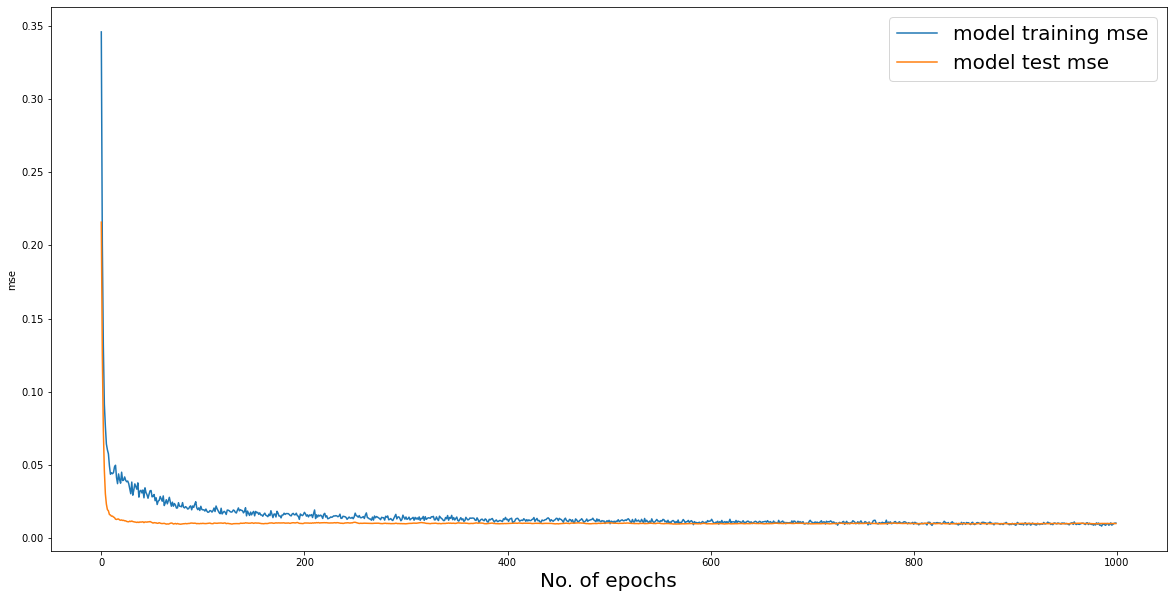

In [49]:
plot_model(history_5_dropout)

As expected, the training process has been made noisy due to the dropout layers here as well. It can be noted that the train and test MSE values for a 5-layer network are considerably better when there are no dropout layers involved. 

### Comparing MSE's for different models

Since in Question 2, we got the best MSE with 3-layers, thus we compare this model with the 4 and 5 layered models with no dropout layers involved.

[0.0047629992, 0.0043558036, 0.0044370675]


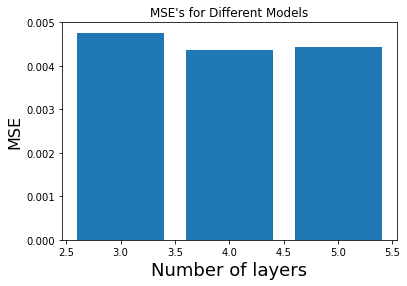

In [52]:
numLayers = [3,4,5]

mse_5_3layer = min(history_7.history["val_mse"])
mse_5_4layer = min(history_4.history["val_mse"])
mse_5_5layer = min(history_5.history["val_mse"])

mse_list = [mse_5_3layer, mse_5_4layer, mse_5_5layer ]
print(mse_list)

# creating the bar plot 
plt.bar(numLayers, mse_list) 
plt.xlabel('Number of layers', fontsize=18)
plt.ylabel('MSE', fontsize=16)
plt.title("MSE's for Different Models") 
plt.show() 

We can see that as number of dense layers increase from 3-4, the model is able to understand more complex (and thus more accurate) relationships, and so the MSE's descrease. However, the test MSE reduces for 5-layered structure. This may be because the increased layers were able to memorise the training set and overfit the data while not being generalizable to the validation set.

Thus, the model with
- Features : None removed
- No dropout layers
- 4 layers

has the lowest test MSE of 0.0044370675
